In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [3]:
'''

class2 = gwls[['D4N0139', 'D4N0140' ,'D4N0141' ,'D4N0126','2526CC00029','2526CC00255']]

  
pima1 = pima['precip_trend']


ax1 = class2.plot(figsize=(20,10), linewidth=1, fontsize = 20, grid=True, marker="o")
ax2 = pima1.plot(secondary_y=True, legend=True, linewidth=1, marker="o", grid=True, color='purple') #precip_trend

ax1.set_ylim(-50,0)
ax2.set_ylim(0,800) #(0, 800) for precip_trend and (0,5) for discharge



ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.12),ncol=12, prop={'size': 16});
ax2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.20),ncol=12, prop={'size': 16});

ax1.set_title('Groundwater levels vs precip_trend',fontsize=20) #'Groundwater levels vs precip_trend'
ax1.set_xlabel('Year',fontsize=20)
ax1.set_ylabel('Groundwater level (m)',fontsize=20)
ax2.set_ylabel('precip_trend (mm)',fontsize=20) #Discharge #precip_trend (mm)
'''


'\n\nclass2 = gwls[[\'D4N0139\', \'D4N0140\' ,\'D4N0141\' ,\'D4N0126\',\'2526CC00029\',\'2526CC00255\']]\n\n  \npima1 = pima[\'precip_trend\']\n\n\nax1 = class2.plot(figsize=(20,10), linewidth=1, fontsize = 20, grid=True, marker="o")\nax2 = pima1.plot(secondary_y=True, legend=True, linewidth=1, marker="o", grid=True, color=\'purple\') #precip_trend\n\nax1.set_ylim(-50,0)\nax2.set_ylim(0,800) #(0, 800) for precip_trend and (0,5) for discharge\n\n\n\nax1.legend(loc=\'upper center\', bbox_to_anchor=(0.5, -0.12),ncol=12, prop={\'size\': 16});\nax2.legend(loc=\'upper center\', bbox_to_anchor=(0.5, -0.20),ncol=12, prop={\'size\': 16});\n\nax1.set_title(\'Groundwater levels vs precip_trend\',fontsize=20) #\'Groundwater levels vs precip_trend\'\nax1.set_xlabel(\'Year\',fontsize=20)\nax1.set_ylabel(\'Groundwater level (m)\',fontsize=20)\nax2.set_ylabel(\'precip_trend (mm)\',fontsize=20) #Discharge #precip_trend (mm)\n'

In [4]:
df = pd.read_excel('/Users/yolanda/Downloads/excel_file1.xlsx')
df.set_index('year_month', inplace=True)

p = pd.read_excel('/Users/yolanda/Documents/Priority compartments/Grootfontein/master spreadsheets for compartment per cluster/cluster_3.xlsx')
p.set_index('year_month', inplace=True)
v = pd.read_excel('/Users/yolanda/Documents/Priority compartments/Grootfontein/master spreadsheets for compartment per cluster/cluster_2.xlsx')
v.set_index('year_month', inplace=True)
w = pd.read_excel('/Users/yolanda/Documents/Priority compartments/Grootfontein/master spreadsheets for compartment per cluster/cluster_4.xlsx')
w.set_index('year_month', inplace=True)
z = pd.read_excel('/Users/yolanda/Documents/Priority compartments/Grootfontein/master spreadsheets for compartment per cluster/cluster_5.xlsx')
z.set_index('year_month', inplace=True)

In [5]:
#df['Abstraction'] = w['Usage']
df['D4N0126'] =  w.iloc[:,3]
df['D4N0141'] = p[' D4N0141']
#df['D4N0126'] = p[' D4N0126']
df['D4N0139'] = p[' D4N0139']
df['2526CC00029'] = p['2526CC00029']
df['2526CC00255'] = p[' 2526CC00255']

In [6]:
df

Temperature  Precipitation  Discharge  Abstraction  \
year_month                                                       
1950-01-01        23.90           95.9        NaN          NaN   
1950-02-01        25.10           52.8        NaN          NaN   
1950-03-01        23.75           71.4        NaN          NaN   
1950-04-01        19.65           58.6        NaN          NaN   
1950-05-01        14.60           27.7        NaN          NaN   
...                 ...            ...        ...          ...   
2019-08-01          NaN            NaN        NaN          NaN   
2019-09-01          NaN            NaN        NaN          NaN   
2019-10-01          NaN            NaN        NaN          NaN   
2019-11-01          NaN            NaN        NaN          NaN   
2019-12-01          NaN            NaN        NaN          NaN   

            scenario_usage  scenario_precip100  scenario_precip200  \
year_month                                                           
1950-01-01             NaN                95.9                95.9   
1950-02-01             NaN                52.8                52.8   
1950-03-01             NaN                71.4                71.4   
1950-04-01             NaN                58.6                58.6   
1950-05-01             NaN                27.7                27.7   
...                    ...                 ...                 ...   
2019-08-01             0.0                 0.0                 0.0   
2019-09-01             0.0                 0.0                 0.0   
2019-10-01             0.0                 0.0                 0.0   
2019-11-01             0.0                 0.0                 0.0   
2019-12-01             0.0                 0.0                 0.0   

            scenario_preciphalf  precip_trend  trend_scenario100  \
year_month                                                         
1950-01-01                47.95           NaN                NaN   
1950-02-01                26.40           NaN                NaN   
1950-03-01                35.70           NaN                NaN   
1950-04-01                29.30           NaN                NaN   
1950-05-01                13.85           NaN                NaN   
...                         ...           ...                ...   
2019-08-01                 0.00           NaN                NaN   
2019-09-01                 0.00           NaN                NaN   
2019-10-01                 0.00           NaN                NaN   
2019-11-01                 0.00           NaN                NaN   
2019-12-01                 0.00           NaN                NaN   

            trend_scenario200  trend_scenariohalf  D4N0126  D4N0141  D4N0139  \
year_month                                                                     
1950-01-01                NaN                 NaN      NaN      NaN      NaN   
1950-02-01                NaN                 NaN      NaN      NaN      NaN   
1950-03-01                NaN                 NaN      NaN      NaN      NaN   
1950-04-01                NaN                 NaN      NaN      NaN      NaN   
1950-05-01                NaN                 NaN      NaN      NaN      NaN   
...                       ...                 ...      ...      ...      ...   
2019-08-01                NaN                 NaN      NaN      NaN      NaN   
2019-09-01                NaN                 NaN      NaN      NaN      NaN   
2019-10-01                NaN                 NaN      NaN      NaN      NaN   
2019-11-01                NaN                 NaN      NaN      NaN      NaN   
2019-12-01                NaN                 NaN      NaN      NaN      NaN   

            2526CC00029  2526CC00255  
year_month                            
1950-01-01          NaN          NaN  
1950-02-01          NaN          NaN  
1950-03-01          NaN          NaN  
1950-04-01          NaN          NaN  
1950-05-01          NaN          NaN  
...                 ...          ...  
2019

In [7]:
df = df[['D4N0141' ,'D4N0126','Temperature' ,'precip_trend' ,'Discharge' ,'Abstraction']]

In [8]:
df

D4N0141  D4N0126  Temperature  precip_trend  Discharge  \
year_month                                                           
1950-01-01      NaN      NaN        23.90           NaN        NaN   
1950-02-01      NaN      NaN        25.10           NaN        NaN   
1950-03-01      NaN      NaN        23.75           NaN        NaN   
1950-04-01      NaN      NaN        19.65           NaN        NaN   
1950-05-01      NaN      NaN        14.60           NaN        NaN   
...             ...      ...          ...           ...        ...   
2019-08-01      NaN      NaN          NaN           NaN        NaN   
2019-09-01      NaN      NaN          NaN           NaN        NaN   
2019-10-01      NaN      NaN          NaN           NaN        NaN   
2019-11-01      NaN      NaN          NaN           NaN        NaN   
2019-12-01      NaN      NaN          NaN           NaN        NaN   

            Abstraction  
year_month               
1950-01-01          NaN  
1950-02-01          NaN  
1950-03-01          NaN  
1950-04-01          NaN  
1950-05-01          NaN  
...                 ...  
2019-08-01          NaN  
2019-09-01          NaN  
2019-10-01          NaN  
2019-11-01          NaN  
2019-12-01          NaN  

[840 rows x 6 columns]

In [9]:
f = lambda x: -x; 
gwls = df[['D4N0126']].apply(f, axis=1)

#### checking when each varibale starts and ends 

In [10]:
result_dict = {}
def check_date(column):
    x = column.notnull()
    print(type(column[x]))
    result_dict[column.name] = [column[x].head(1).index[0], 
    column[x].tail(1).index[0]]
    
gwls.apply(check_date)
dates = pd.DataFrame(result_dict)
dates

<class 'pandas.core.series.Series'>


D4N0126
0 1976-08-01
1 2018-04-01

#### Limiting period based on minimum start of all 6 bh's and maximum finish of all 6 bh's

In [11]:

gwls = gwls[gwls.index > '1976-08-01']  
gwls = gwls[gwls.index < '1998-01-01']  

#### These boreholes are the onles with less that 32% missing data. 

Text(0, 0.5, 'Groundwater levels')

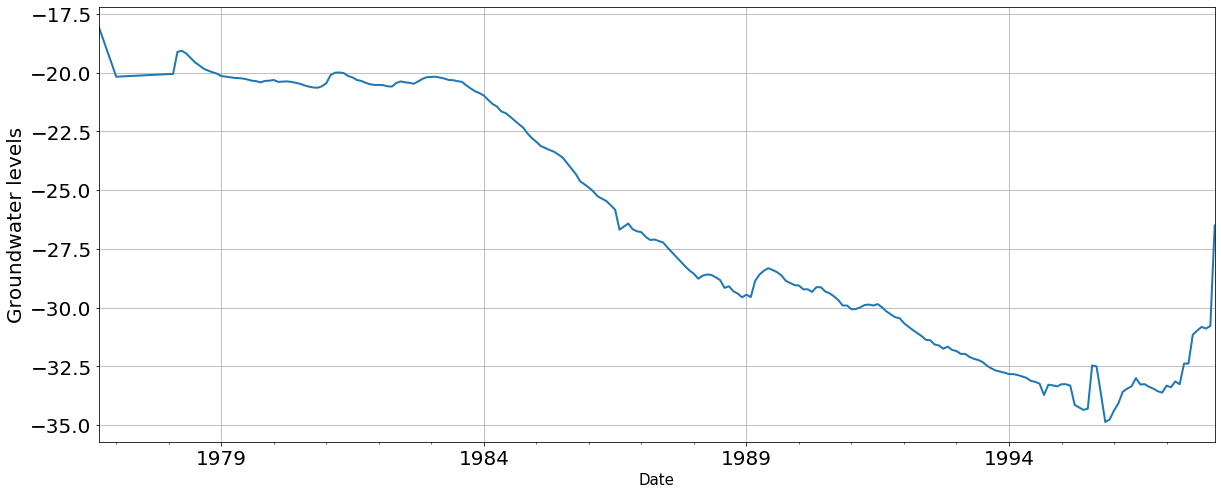

In [12]:
#visual illustration just to show all groundwater levels 

gwls['D4N0126'].plot(figsize=(20,8), linewidth=2, fontsize = 20, grid=True);
plt.xlabel("Date",fontsize=15)
plt.ylabel("Groundwater levels",fontsize=20)


In [13]:
gwls.shape

(256, 1)

In [14]:
gwls['Temperature'] = df['Temperature']
gwls['precip_trend'] = df['precip_trend']
gwls['Discharge'] = df['Discharge']
gwls['Abstraction'] = df['Abstraction']
gwls

D4N0126  Temperature  precip_trend  Discharge  Abstraction
year_month                                                             
1976-09-01 -18.04098        19.15     55.791667      1.531   327153.000
1976-10-01 -18.56451        20.60     51.279167      1.389   327153.000
1976-11-01 -19.10549        21.55     49.341667      1.633   327153.000
1976-12-01 -19.62902        23.75     49.341667      1.308   327153.000
1977-01-01 -20.17000          NaN     49.508333      1.041   436477.250
...              ...          ...           ...        ...          ...
1997-08-01 -30.98000        13.95     41.266667      0.616  1638954.917
1997-09-01 -30.82000        16.75     40.083333      0.583  1638954.917
1997-10-01 -30.89000        18.55     36.125000      0.517  1638954.917
1997-11-01 -30.78000        20.15     33.925000      0.507  1638954.917
1997-12-01 -26.50500        22.70     33.316667      0.503  1638954.917

[256 rows x 5 columns]

### Reframing length of dataset based on bhid D4N0115 start and end dates 

In [15]:
pima = gwls.filter(['D4N0126', 'Temperature', 'precip_trend', 'Discharge', 'Abstraction'])


In [16]:
pima.apply(lambda x: sum(x.isnull()), axis=0)

D4N0126          0
Temperature     11
precip_trend     0
Discharge       65
Abstraction      0
dtype: int64

#### Interpolating independant varibales only 

In [17]:
pima['Discharge']= pima['Discharge'].interpolate(limit_direction='both', method='time').mask(pima.bfill().isna())
pima['precip_trend']= pima['precip_trend'].interpolate(limit_direction='both', method='time').mask(pima.bfill().isna())
pima['Temperature']= pima['Temperature'].interpolate(limit_direction='both', method='time').mask(pima.bfill().isna())

#### Calculating start and end dates for new dataframa

In [18]:
result_dict = {}
def check_date(column):
    x = column.notnull()
    print(type(column[x]))
    result_dict[column.name] = [column[x].head(1).index[0], 
    column[x].tail(1).index[0]]
    
pima.apply(check_date)
dates = pd.DataFrame(result_dict)
dates

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


D4N0126 Temperature precip_trend  Discharge Abstraction
0 1976-09-01  1976-09-01   1976-09-01 1976-09-01  1976-09-01
1 1997-12-01  1997-12-01   1997-12-01 1997-12-01  1997-12-01

### Mutual information stats

In [19]:
from sklearn.feature_selection import mutual_info_regression

In [20]:
X = pima[['Temperature', 'precip_trend', 'Discharge','Abstraction']] # Features
y = pima[['D4N0126']] # 'D4N0834', 'D4N0111' ,'D4N0122' ,'D4N0037','D4N0115','D4N0110' 

In [21]:
mi = mutual_info_regression(X, y)
mi /= np.max(mi)

mi = pd.Series(mi)
mi.index = X.columns
mi.sort_values(ascending=False)
mi

/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Temperature     0.024920
precip_trend    0.376372
Discharge       0.686190
Abstraction     1.000000
dtype: float64

## LAG TESTING 

In [22]:
precip1  = pima.filter(['D4N0126', 'precip_trend'])
discha1 = pima.filter(['D4N0126', 'Discharge'])
temp1   = pima.filter(['D4N0126', 'Temperature'])
abstr1   = pima.filter(['D4N0126', 'Abstraction'])

In [23]:
lags = range(1, 24)  # 2year lag

# precip_trend
precip = precip1.assign(**{ '{} (t-{})'.format([ 'precip_trend'], t): precip1[[ 'precip_trend']].shift(t) for t in lags for col in precip1})
# disharge
discha = discha1.assign(**{ '{} (t-{})'.format([ 'Discharge'], t): discha1[[ 'Discharge']].shift(t) for t in lags for col in discha1})
# temperature
temp = temp1.assign(**{ '{} (t-{})'.format([ 'Temperature'], t): temp1[[ 'Temperature']].shift(t) for t in lags for col in temp1})
# Abstraction
abstr = abstr1.assign(**{ '{} (t-{})'.format([ 'Abstraction'], t): abstr1[[ 'Abstraction']].shift(t) for t in lags for col in abstr1})

## Cross Correlation

- degree of similarity between two time series in different times or space 
- lag is considred since time is under investigation

### Rainfall

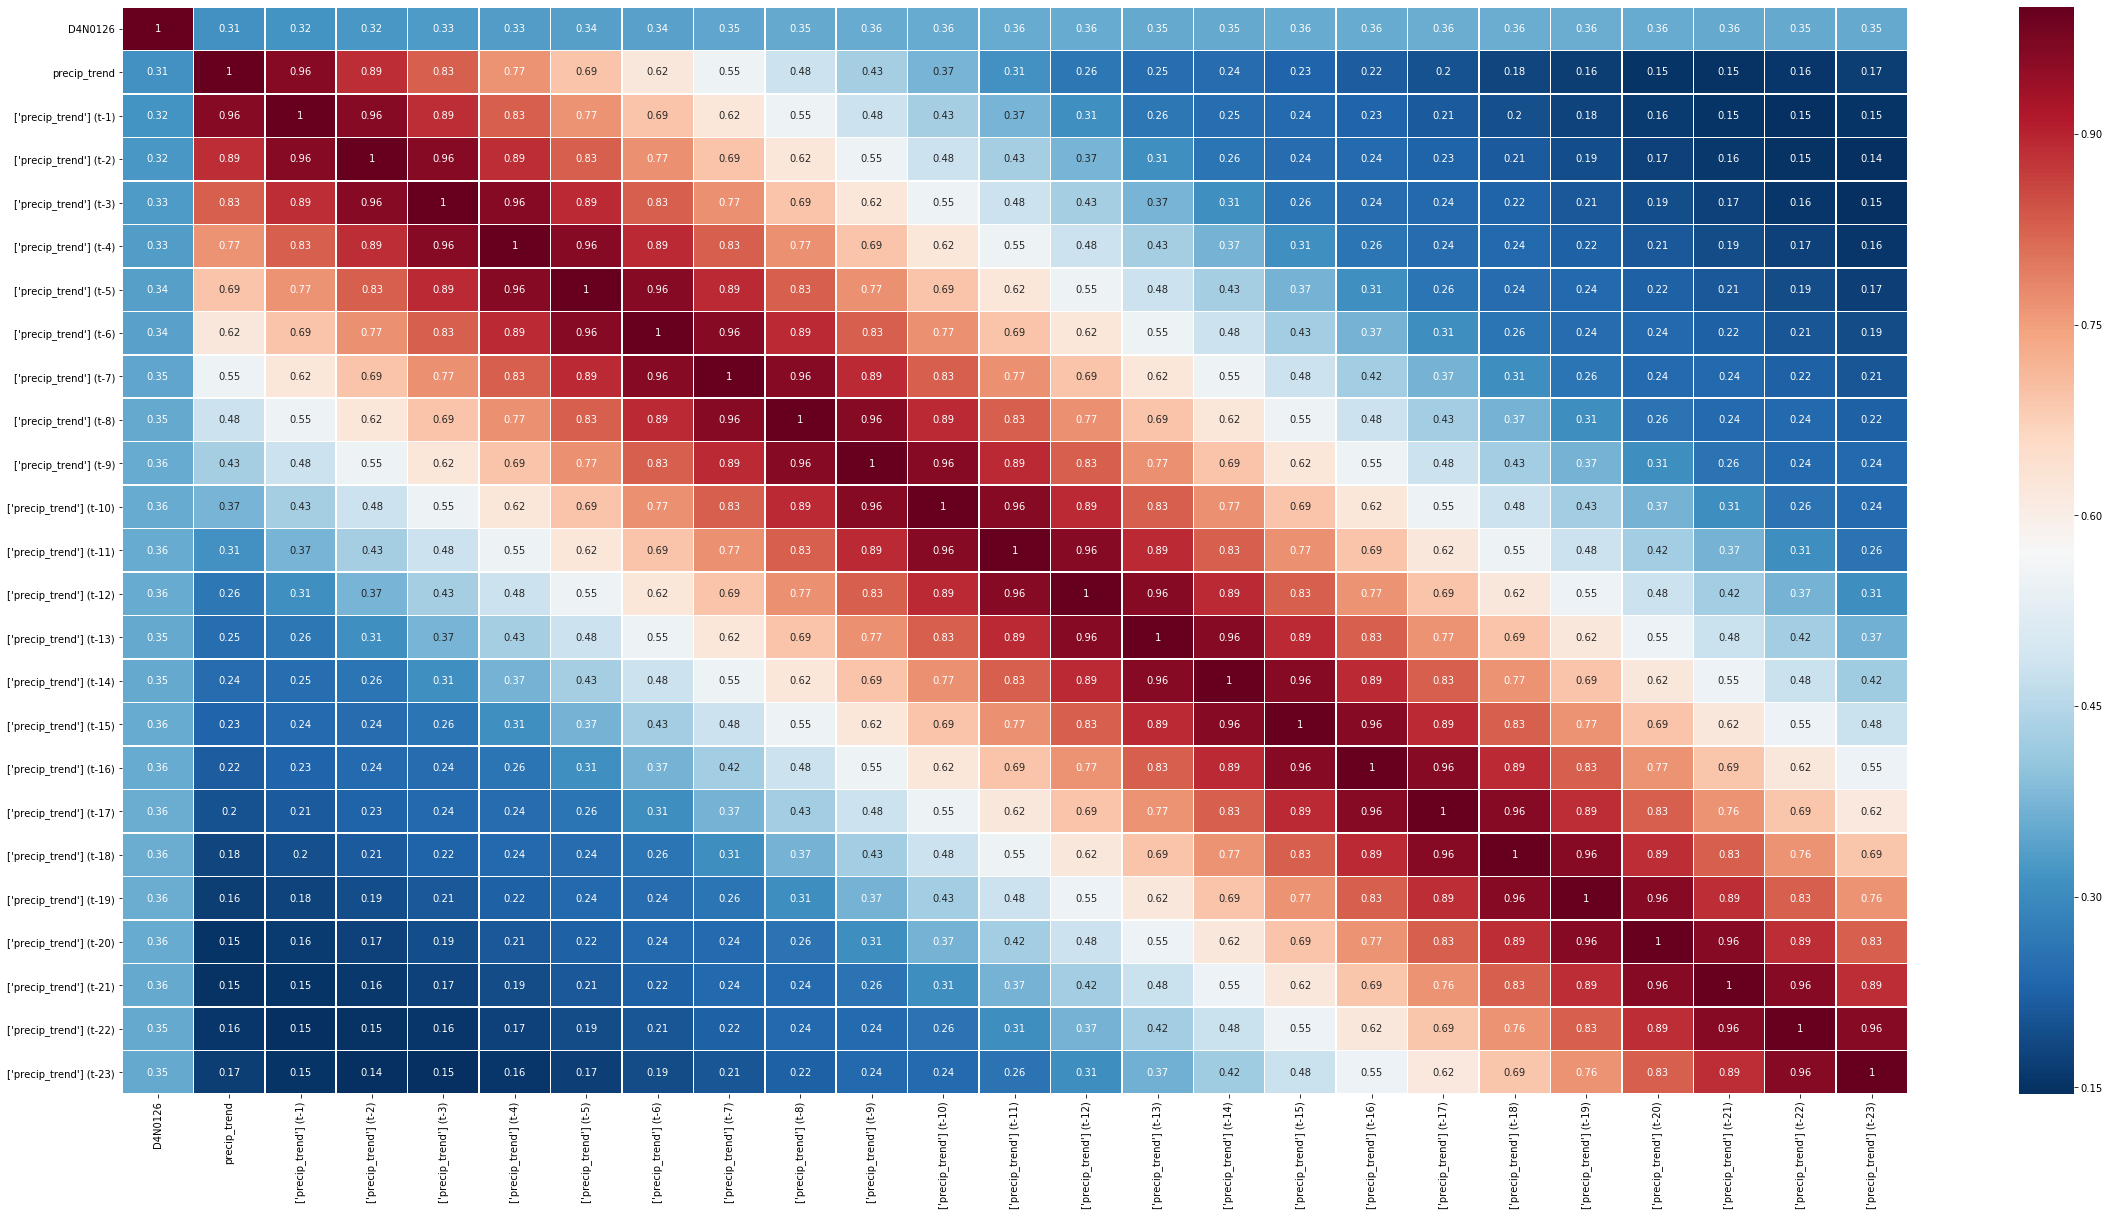

In [24]:
# precip0834 , 0111, 0122 , 0037, 0115, 0110

import seaborn as sns
corrm1 = precip.corr(method = 'spearman')
corrm2 = precip.corr(method = 'pearson')
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(40,20))         # Sample figsize in inches

sns.heatmap(corrm2, 
            xticklabels=corrm2.columns,
            yticklabels=corrm2.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

#A co-efficient close to 1 means that there’s a very strong positive correlation between the two variables.
#In our case, the maroon shows very strong correlations. 
#The diagonal line is the correlation of the variables to themselves — so they’ll obviously be 1.
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

### Temperature

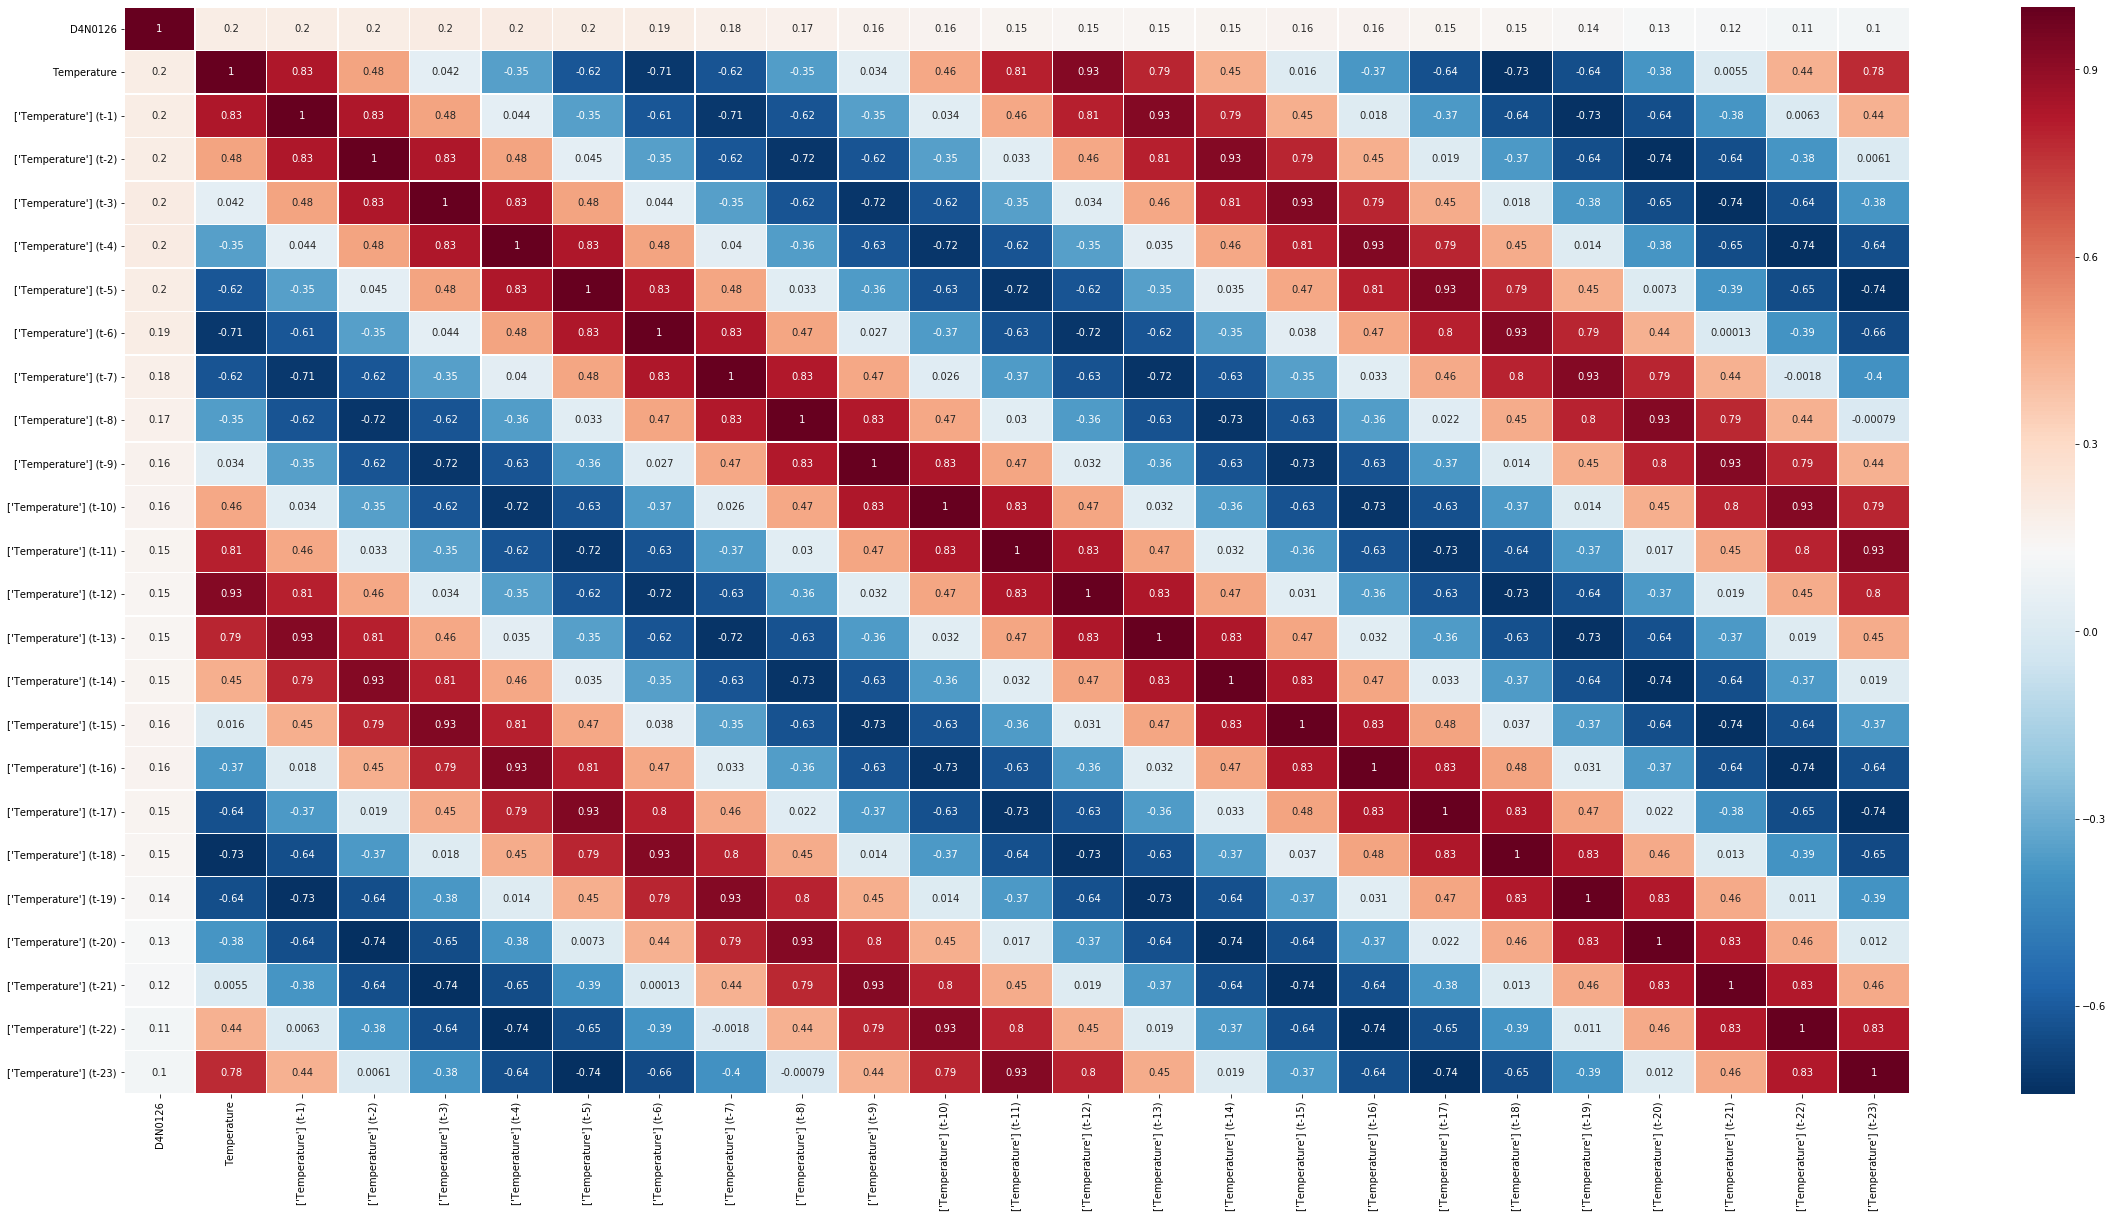

In [25]:
# temp0834 , 0111, 0122 , 0037, 0115, 0110

import seaborn as sns
corrm1 = temp.corr(method = 'spearman')
corrm2 = temp.corr(method = 'pearson')
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(40,20))         # Sample figsize in inches

sns.heatmap(corrm2, 
            xticklabels=corrm2.columns,
            yticklabels=corrm2.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

#A co-efficient close to 1 means that there’s a very strong positive correlation between the two variables.
#In our case, the maroon shows very strong correlations. 
#The diagonal line is the correlation of the variables to themselves — so they’ll obviously be 1.
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

#### Shifting variables based on lag variables 

In [26]:
#pima=pima.drop(['Temperature (t-3)'], axis=1)
#pima=pima.drop(['precip_trend (t-5)'], axis=1)
#pima

In [27]:
pima['Temperature (t-3)'] = pima.Temperature.shift(0)
pima['precip_trend (t-5)'] = pima.precip_trend.shift(3)
#pima = pima['Discharge (t-6)'].drop(axis=1)
pima

D4N0126  Temperature  precip_trend  Discharge  Abstraction  \
year_month                                                                
1976-09-01 -18.04098       19.150     55.791667      1.531   327153.000   
1976-10-01 -18.56451       20.600     51.279167      1.389   327153.000   
1976-11-01 -19.10549       21.550     49.341667      1.633   327153.000   
1976-12-01 -19.62902       23.750     49.341667      1.308   327153.000   
1977-01-01 -20.17000       24.075     49.508333      1.041   436477.250   
...              ...          ...           ...        ...          ...   
1997-08-01 -30.98000       13.950     41.266667      0.616  1638954.917   
1997-09-01 -30.82000       16.750     40.083333      0.583  1638954.917   
1997-10-01 -30.89000       18.550     36.125000      0.517  1638954.917   
1997-11-01 -30.78000       20.150     33.925000      0.507  1638954.917   
1997-12-01 -26.50500       22.700     33.316667      0.503  1638954.917   

            Temperature (t-3)  precip_trend (t-5)  
year_month                                         
1976-09-01             19.150                 NaN  
1976-10-01             20.600                 NaN  
1976-11-01             21.550                 NaN  
1976-12-01             23.750           55.791667  
1977-01-01             24.075           51.279167  
...                       ...                 ...  
1997-08-01             13.950           41.866667  
1997-09-01             16.750           41.408333  
1997-10-01             18.550           40.725000  
1997-11-01             20.150           41.266667  
1997-12-01             22.700           40.083333  

[256 rows x 7 columns]

In [28]:
X = pima[['Temperature (t-3)', 'precip_trend (t-5)', 'Discharge','Abstraction']] # Features
y = pima[['D4N0126']] # 'D4N0834', 'D4N0111' ,'D4N0122' ,'D4N0037','D4N0115','D4N0110' 

In [29]:
X.fillna(0, inplace=True)
y.fillna(0, inplace=True)

/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [30]:
mi = mutual_info_regression(X, y)
mi /= np.max(mi)

mi = pd.Series(mi)
mi.index = X.columns
mi.sort_values(ascending=False)
mi

/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Temperature (t-3)     0.024892
precip_trend (t-5)    0.404016
Discharge             0.686836
Abstraction           1.000000
dtype: float64

### Auto and Cross corr plots combined 

In [31]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [32]:
rainfall = X['precip_trend (t-5)']
temperature = X['Temperature (t-3)']
discharge = X['Discharge']
usage =  X['Abstraction']
bhid =  y['D4N0126']

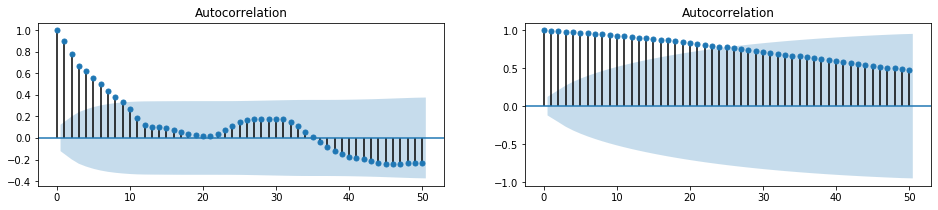

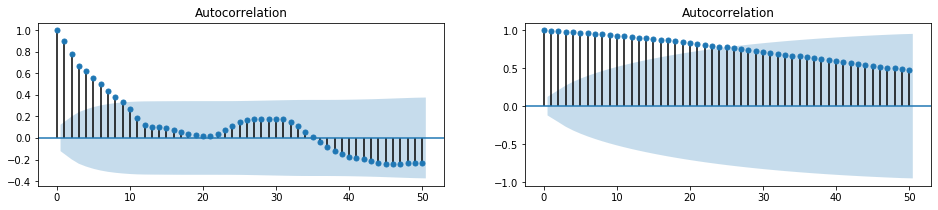

In [33]:
fig, axes = plt.subplots(1,2,figsize=(16,3))
plot_acf(rainfall.tolist(), lags=50, ax=axes[0])
plot_acf(bhid.tolist(), lags=50, ax=axes[1])

Checking if target variable is auto correlated.
Auto-corr (similarity between observations as a function of the lag time)

- plot looks like a sigmoid funtion (hint for seasonality)

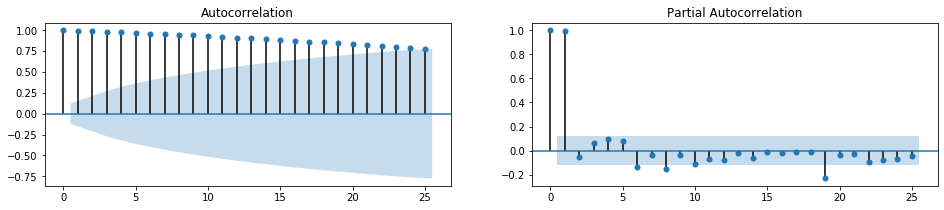

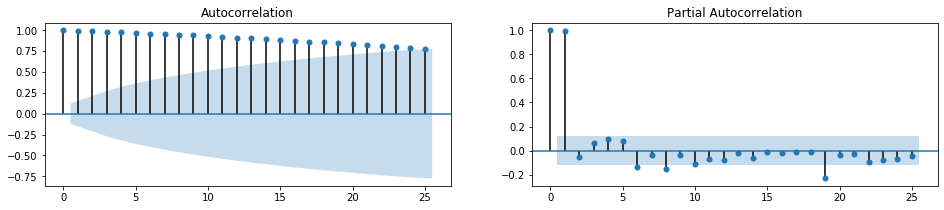

In [34]:
fig, axes = plt.subplots(1,2,figsize=(16,3))
plot_acf(bhid, lags=25, ax=axes[0])
plot_pacf(bhid, lags=25, ax=axes[1])

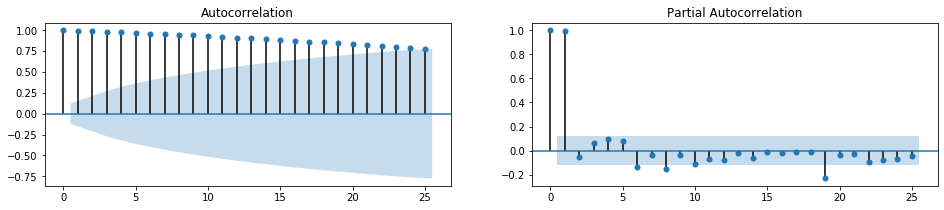

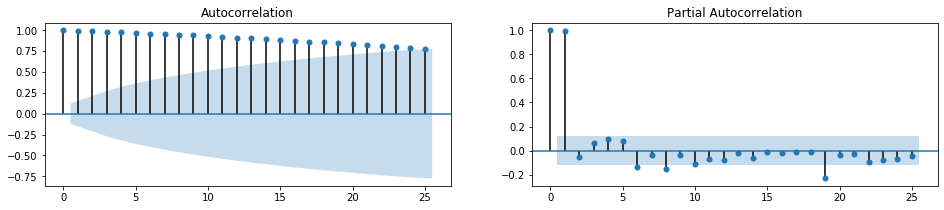

In [35]:
fig, axes = plt.subplots(1,2,figsize=(16,3))
plot_acf(bhid, lags=25, ax=axes[0])
plot_pacf(bhid, lags=25, ax=axes[1])

#### To check whether data is stationary we use Augmented Dickey-Fuller (ADF) Test

For time series modeling, data needs to be stationary — if there is a trend in the data we need to get rid of it. 

#### BHID

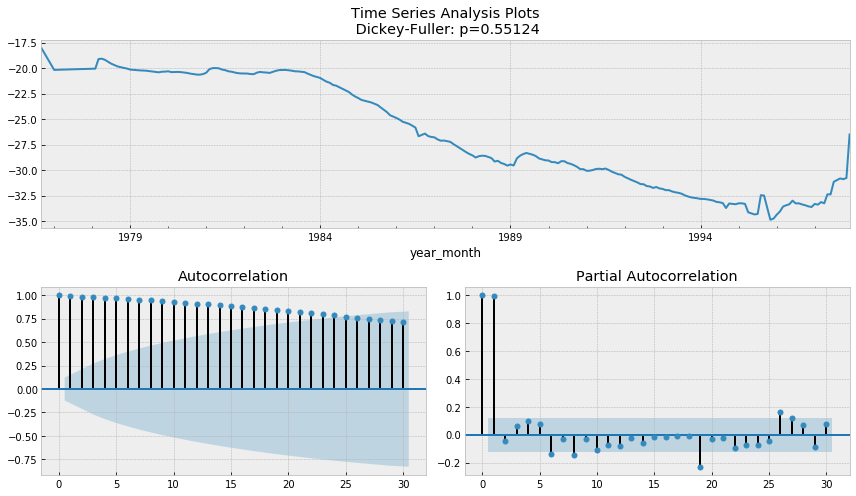

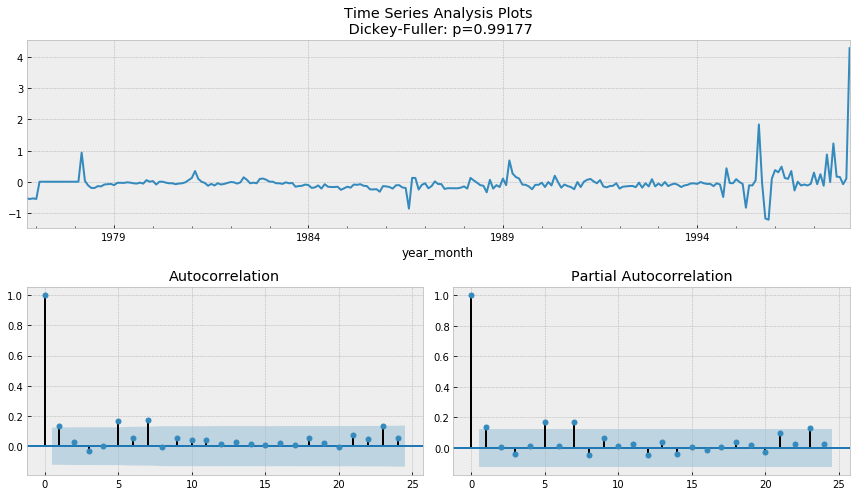

In [36]:
In [2]: import statsmodels.api as sm
import statsmodels.tsa.api as smt

def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
	    
	    if not isinstance(y, pd.Series):
	        y = pd.Series(y)
	        
	    with plt.style.context(style='bmh'):
	        fig = plt.figure(figsize=figsize)
	        layout = (2,2)
	        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
	        acf_ax = plt.subplot2grid(layout, (1,0))
	        pacf_ax = plt.subplot2grid(layout, (1,1))
	        
	        y.plot(ax=ts_ax)
	        p_value = sm.tsa.stattools.adfuller(y)[1]
	        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
	        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
	        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
	        plt.tight_layout()
	        
tsplot(bhid, lags=30)

# Take the first difference to remove to make the process stationary
D4N0111_diff = bhid - bhid.shift(1)

tsplot(D4N0111_diff[1:], lags=24)

#### Rainfall

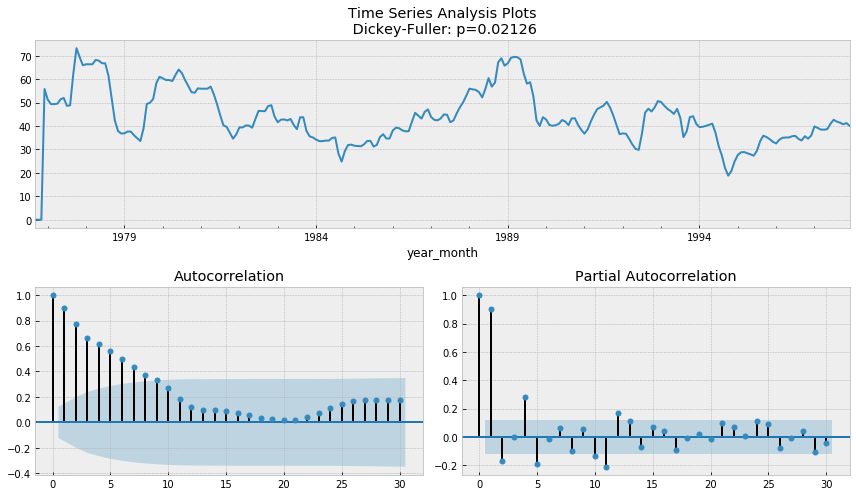

In [37]:
import statsmodels.tsa.api as smt

def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
	    
	    if not isinstance(y, pd.Series):
	        y = pd.Series(y)
	        
	    with plt.style.context(style='bmh'):
	        fig = plt.figure(figsize=figsize)
	        layout = (2,2)
	        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
	        acf_ax = plt.subplot2grid(layout, (1,0))
	        pacf_ax = plt.subplot2grid(layout, (1,1))
	        
	        y.plot(ax=ts_ax)
	        p_value = sm.tsa.stattools.adfuller(y)[1]
	        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
	        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
	        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
	        plt.tight_layout()
	        
tsplot(rainfall, lags=30)

#### Temp

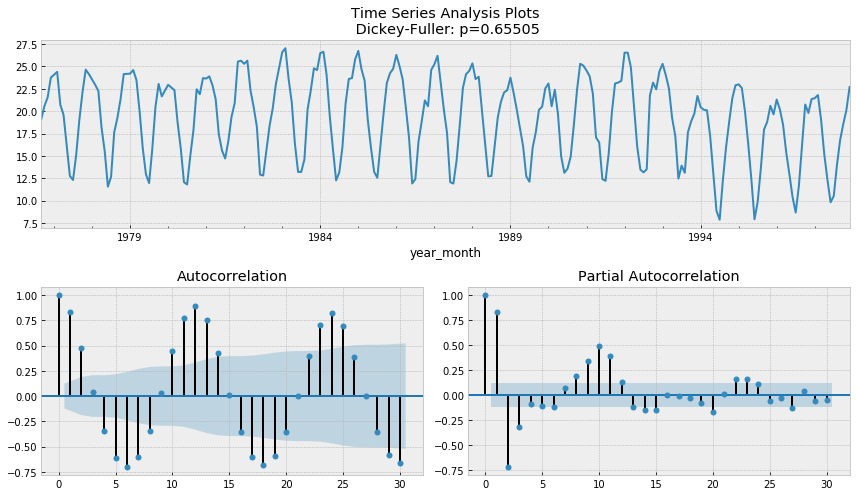

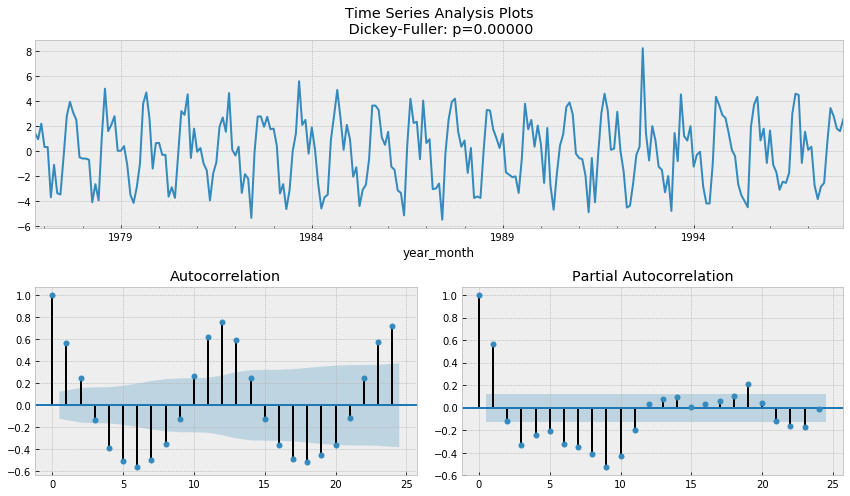

In [38]:
import statsmodels.tsa.api as smt

def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
	    
	    if not isinstance(y, pd.Series):
	        y = pd.Series(y)
	        
	    with plt.style.context(style='bmh'):
	        fig = plt.figure(figsize=figsize)
	        layout = (2,2)
	        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
	        acf_ax = plt.subplot2grid(layout, (1,0))
	        pacf_ax = plt.subplot2grid(layout, (1,1))
	        
	        y.plot(ax=ts_ax)
	        p_value = sm.tsa.stattools.adfuller(y)[1]
	        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
	        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
	        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
	        plt.tight_layout()
	        
tsplot(temperature, lags=30)

# Take the first difference to remove to make the process stationary
temp_diff = temperature - temperature.shift(1)

tsplot(temp_diff[1:], lags=24)


#### Discharge

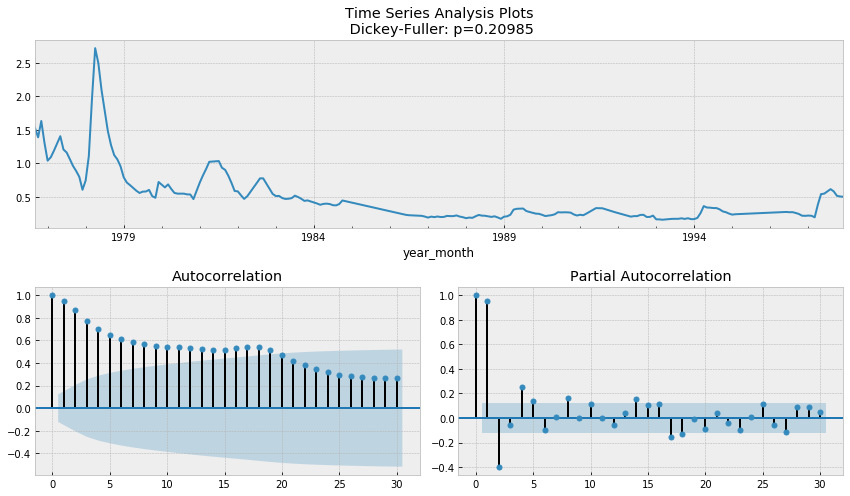

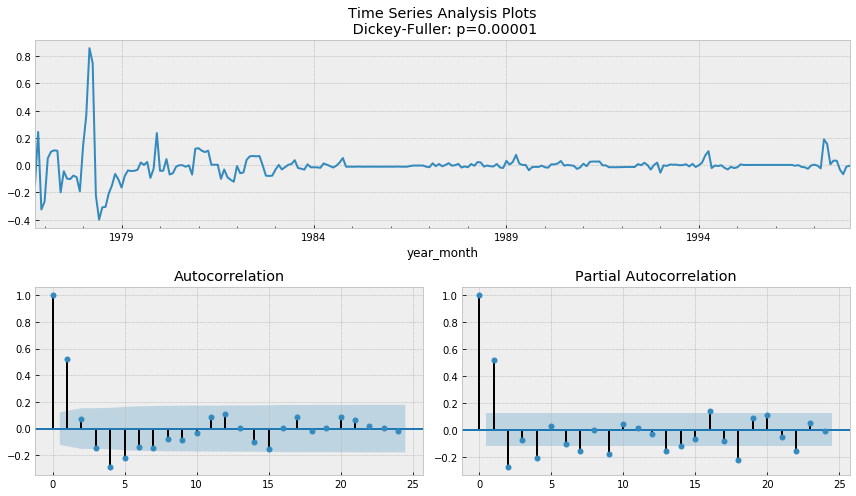

In [39]:
import statsmodels.tsa.api as smt

def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
	    
	    if not isinstance(y, pd.Series):
	        y = pd.Series(y)
	        
	    with plt.style.context(style='bmh'):
	        fig = plt.figure(figsize=figsize)
	        layout = (2,2)
	        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
	        acf_ax = plt.subplot2grid(layout, (1,0))
	        pacf_ax = plt.subplot2grid(layout, (1,1))
	        
	        y.plot(ax=ts_ax)
	        p_value = sm.tsa.stattools.adfuller(y)[1]
	        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
	        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
	        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
	        plt.tight_layout()
	        
tsplot(discharge, lags=30)

# Take the first difference to remove to make the process stationary
dis_diff = discharge - discharge.shift(1)

tsplot(dis_diff[1:], lags=24)

#### Usage

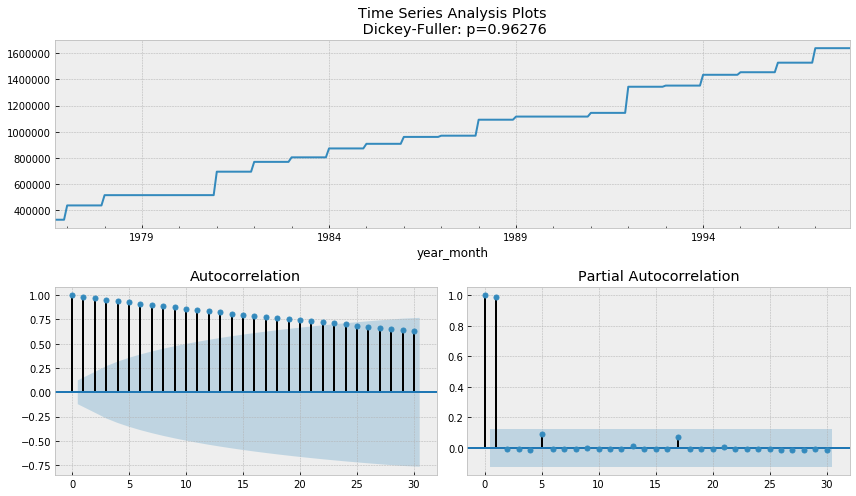

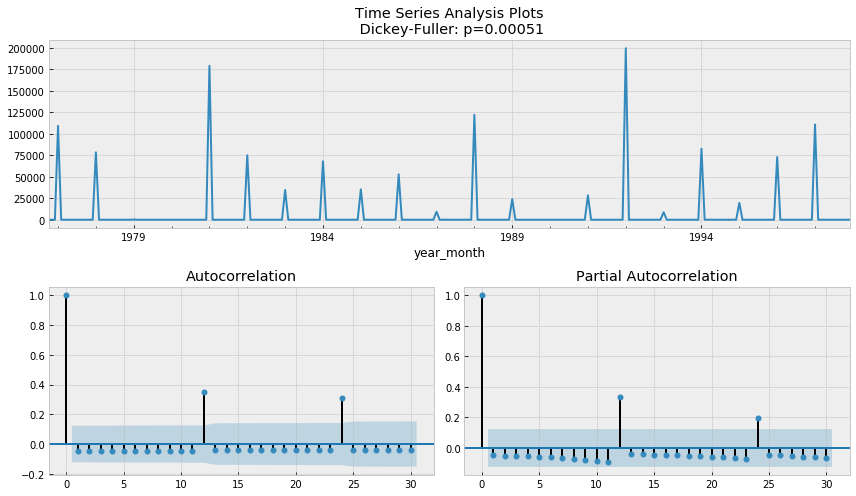

In [40]:
import statsmodels.tsa.api as smt

def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
	    
	    if not isinstance(y, pd.Series):
	        y = pd.Series(y)
	        
	    with plt.style.context(style='bmh'):
	        fig = plt.figure(figsize=figsize)
	        layout = (2,2)
	        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
	        acf_ax = plt.subplot2grid(layout, (1,0))
	        pacf_ax = plt.subplot2grid(layout, (1,1))
	        
	        y.plot(ax=ts_ax)
	        p_value = sm.tsa.stattools.adfuller(y)[1]
	        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
	        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
	        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
	        plt.tight_layout()
	        
tsplot(usage, lags=30)

#Take the first difference to remove to make the process stationary
usage_diff = usage - usage.shift(1)


tsplot(usage_diff[1:], lags=30)



### Differenced dataframe (poor model results)

In [41]:
pima_diff = pd.DataFrame({'D4N0111': D4N0111_diff ,'Temperature': temp_diff,  'Rainfall': rainfall,  'Discharge': dis_diff, 'Abstraction': usage_diff}, columns=['D4N0111','Temperature','precip_trend','Discharge', 'Abstraction'])
pima_diff.apply(lambda x: sum(x.isnull()), axis=0)

D4N0111           1
Temperature       1
precip_trend    256
Discharge         1
Abstraction       1
dtype: int64

In [42]:
#X = pima_diff[['Temperature', 'Discharge','Abstraction']] # Features
#y = pima_diff[['D4N0834']] # 'D4N0834', 'D4N0111' ,'D4N0122' ,'D4N0037','D4N0115','D4N0110' 

### Visual illustration to help select train and test data

Text(0, 0.5, 'Groundwater levels')

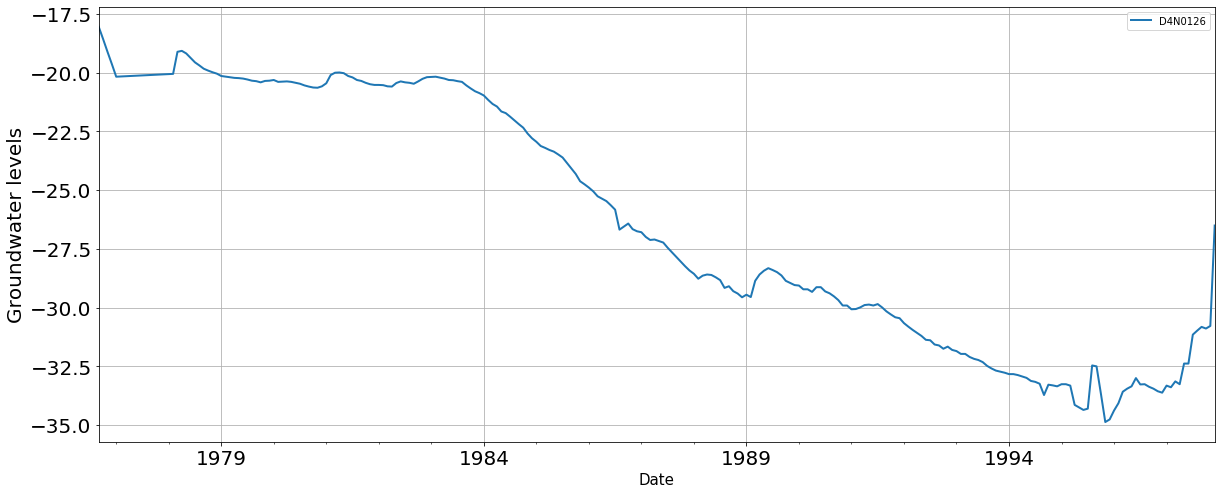

In [43]:
pima[['D4N0126']].plot(figsize=(20,8), linewidth=2, fontsize = 20, grid=True);
plt.xlabel("Date",fontsize=15)
plt.ylabel("Groundwater levels",fontsize=20)


In [44]:
#pima = pima[pima.index < '2004-05-01'] 

### Model Parameters

In [45]:
pima['precip_trend_log'] = 1 +np.log1p(pima['precip_trend (t-5)'])
pima['Temperature_log'] = 1 +np.log1p(pima['Temperature (t-3)'])
pima['Discharge_log'] = 1 + np.log1p(pima['Discharge'])
pima['Abstraction_log'] = 1 + np.log1p(pima['Abstraction'])

In [46]:
pima

D4N0126  Temperature  precip_trend  Discharge  Abstraction  \
year_month                                                                
1976-09-01 -18.04098       19.150     55.791667      1.531   327153.000   
1976-10-01 -18.56451       20.600     51.279167      1.389   327153.000   
1976-11-01 -19.10549       21.550     49.341667      1.633   327153.000   
1976-12-01 -19.62902       23.750     49.341667      1.308   327153.000   
1977-01-01 -20.17000       24.075     49.508333      1.041   436477.250   
...              ...          ...           ...        ...          ...   
1997-08-01 -30.98000       13.950     41.266667      0.616  1638954.917   
1997-09-01 -30.82000       16.750     40.083333      0.583  1638954.917   
1997-10-01 -30.89000       18.550     36.125000      0.517  1638954.917   
1997-11-01 -30.78000       20.150     33.925000      0.507  1638954.917   
1997-12-01 -26.50500       22.700     33.316667      0.503  1638954.917   

            Temperature (t-3)  precip_trend (t-5)  precip_trend_log  \
year_month                                                            
1976-09-01             19.150                 NaN               NaN   
1976-10-01             20.600                 NaN               NaN   
1976-11-01             21.550                 NaN               NaN   
1976-12-01             23.750           55.791667          5.039390   
1977-01-01             24.075           51.279167          4.956598   
...                       ...                 ...               ...   
1997-08-01             13.950           41.866667          4.758095   
1997-09-01             16.750           41.408333          4.747345   
1997-10-01             18.550           40.725000          4.731100   
1997-11-01             20.150           41.266667          4.743999   
1997-12-01             22.700           40.083333          4.715603   

            Temperature_log  Discharge_log  Abstraction_log  
year_month                                                   
1976-09-01         4.003204       1.928614        13.698186  
1976-10-01         4.072693       1.870875        13.698186  
1976-11-01         4.115735       1.968124        13.698186  
1976-12-01         4.208825       1.836381        13.698186  
1977-01-01         4.221871       1.713440        13.986494  
...                     ...            ...              ...  
1997-08-01         3.704711       1.479954        15.309570  
1997-09-01         3.876386       1.459322        15.309570  
1997-10-01         3.972975       1.416735        15.309570  
1997-11-01         4.051640       1.410121        15.309570  
1997-12-01         4.165475       1.407463        15.309570  

[256 rows x 11 columns]

In [47]:
for obs in range(1,5):
    pima["t_" + str(obs)] = pima.D4N0126.shift(obs)
pima.fillna(0, inplace=True)


In [48]:
pima

D4N0126  Temperature  precip_trend  Discharge  Abstraction  \
year_month                                                                
1976-09-01 -18.04098       19.150     55.791667      1.531   327153.000   
1976-10-01 -18.56451       20.600     51.279167      1.389   327153.000   
1976-11-01 -19.10549       21.550     49.341667      1.633   327153.000   
1976-12-01 -19.62902       23.750     49.341667      1.308   327153.000   
1977-01-01 -20.17000       24.075     49.508333      1.041   436477.250   
...              ...          ...           ...        ...          ...   
1997-08-01 -30.98000       13.950     41.266667      0.616  1638954.917   
1997-09-01 -30.82000       16.750     40.083333      0.583  1638954.917   
1997-10-01 -30.89000       18.550     36.125000      0.517  1638954.917   
1997-11-01 -30.78000       20.150     33.925000      0.507  1638954.917   
1997-12-01 -26.50500       22.700     33.316667      0.503  1638954.917   

            Temperature (t-3)  precip_trend (t-5)  precip_trend_log  \
year_month                                                            
1976-09-01             19.150            0.000000          0.000000   
1976-10-01             20.600            0.000000          0.000000   
1976-11-01             21.550            0.000000          0.000000   
1976-12-01             23.750           55.791667          5.039390   
1977-01-01             24.075           51.279167          4.956598   
...                       ...                 ...               ...   
1997-08-01             13.950           41.866667          4.758095   
1997-09-01             16.750           41.408333          4.747345   
1997-10-01             18.550           40.725000          4.731100   
1997-11-01             20.150           41.266667          4.743999   
1997-12-01             22.700           40.083333          4.715603   

            Temperature_log  Discharge_log  Abstraction_log       t_1  \
year_month                                                              
1976-09-01         4.003204       1.928614        13.698186   0.00000   
1976-10-01         4.072693       1.870875        13.698186 -18.04098   
1976-11-01         4.115735       1.968124        13.698186 -18.56451   
1976-12-01         4.208825       1.836381        13.698186 -19.10549   
1977-01-01         4.221871       1.713440        13.986494 -19.62902   
...                     ...            ...              ...       ...   
1997-08-01         3.704711       1.479954        15.309570 -31.15000   
1997-09-01         3.876386       1.459322        15.309570 -30.98000   
1997-10-01         3.972975       1.416735        15.309570 -30.82000   
1997-11-01         4.051640       1.410121        15.309570 -30.89000   
1997-12-01         4.165475       1.407463        15.309570 -30.78000   

                 t_2       t_3       t_4  
year_month                                
1976-09-01   0.00000   0.00000   0.00000  
1976-10-01   0.00000   0.00000   0.00000  
1976-11-01 -18.04098   0.00000   0.00000  
1976-12-01 -18.56451 -18.04098   0.00000  
1977-01-01 -19.10549 -18.56451 -18.04098  
...              ...       ...       ...  
1997-08-01 -32.38100 -32.38100 -33.26000  
1997-09-01 -31.15000 -32.38100 -32.38100  
1997-10-01 -30.98000 -31.15000 -32.38100  
1997-11-01 -30.82000 -30.98000 -31.15000  
1997-12-01 -30.89000 -30.82000 -30.98000  

[256 rows x 15 columns]

In [49]:
pima.shape

(256, 15)

In [50]:
pima1  = pima[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2','D4N0126']]
scaler = StandardScaler()
pima1  = pd.DataFrame(scaler.fit_transform(pima1), columns=pima1.columns, index=pima1.index)

### All variables

In [51]:
X = pima1[['Temperature_log','precip_trend_log' ,'Discharge_log','Abstraction_log' ,'t_1', 't_2']]
y = pima1['D4N0126']

mi = mutual_info_regression(X, y)
mi /= np.max(mi)

mi = pd.Series(mi)
mi.index = X.columns
mi.sort_values(ascending=False)
mi

Temperature_log     0.023665
precip_trend_log    0.290416
Discharge_log       0.446118
Abstraction_log     0.644389
t_1                 1.000000
t_2                 0.864471
dtype: float64

In [52]:
X = pima1[['Discharge_log' ,'precip_trend_log' ,'Discharge_log','Abstraction_log' ,'t_1', 't_2']].values
y = pima1['D4N0126'].values
y = y.reshape(-1,1)

In [53]:
from sklearn.model_selection import TimeSeriesSplit
tss = TimeSeriesSplit(n_splits = 5)
for train_index, test_index in tss.split(X):
    X_train, X_test = X[train_index, :], X[test_index,:]
    y_train, y_test = y[train_index], y[test_index]
    
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(214, 6) (214, 1)
(42, 6) (42, 1)


In [54]:
def forecast(model, test_forecast, gwl, steps_ahead):
    y_pred = []
    current_output = gwl
    for step in range(steps_ahead):
        #print(test_forecast[step])
        input_test = np.concatenate([test_forecast[step][:-1], [current_output]])
        #input_test = [test_forecast[0][0][:-1], gwl]
        #print(input_test)
        pred = model.predict(input_test.reshape(1,1,6))
        y_pred.append(pred[0][0])
        #print(pred)
        current_output = pred[0][0]
    return y_pred

In [55]:
y_test[0]

array([-1.31373896])

### LSTM

In [57]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import GRU, LSTM
from tensorflow.keras.optimizers import Adam

In [58]:
from sklearn.metrics import *
import numpy as np
import csv  

# rounding off
Round = 3      

train_pred = []
test_pred  = []

fields = ['Iteration_No', 'mse_lstm', 'rmse_lstm', 'r2_lstm','mae_lstm'] 
csvfile = open('Summary.csv', 'w') 
csvwriter = csv.writer(csvfile)  
csvwriter.writerow(fields) 

for fold in range(1,11):
    print(f'Running fold {fold}')
    print(X_train.shape)


    check = ModelCheckpoint('model.h5', verbose=1, save_best_only=True)

    early = EarlyStopping(patience=100)

    optimizer = Adam(lr=0.00001)
    model = Sequential()
    model.add(GRU(20, input_shape=(1, 6)))
    model.add(Dropout(0.1))

    model.add(Dense(1))

    model.compile(loss='mse', optimizer='rmsprop', metrics=['mse'])

    X_t_reshaped   = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_val_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

    history = model.fit(X_t_reshaped, 
                    y_train, 
                    validation_data=(X_val_reshaped, y_test),
                    epochs=1000, 
                    batch_size=96, 
                    verbose=1, callbacks=[check, early])
    X_val_reshaped = X_val_reshaped.reshape(42, 6)

    #running function
    gwl = -1.31373896
    test_forecast = X_test
    steps_ahead = 42
    y_pred = forecast(model, test_forecast, gwl, steps_ahead)
    y_pred = np.array(y_pred)
    
    #metrics for test
    y_lstm = y_pred
    test_pred.append(y_lstm)
    mse_lstm = mean_squared_error(y_test, y_lstm)
    rmse_lstm = np.sqrt(mse_lstm)
    r2_lstm = r2_score(y_test, y_lstm)
    mae_lstm = mean_absolute_error(y_test, y_lstm)

    #metrics train 
    train     = model.predict(X_t_reshaped)
    train_pred.append(train)
    msetrain  = mean_squared_error(y_train, train)
    rmsetrain = np.sqrt(msetrain)
    mae_train = mean_absolute_error(y_train, train)
    r2train   = r2_score(y_train, train)
    
    csvwriter.writerow([f'Iteration_{fold}',round(mse_lstm,Round), round(rmse_lstm,Round), round(r2_lstm,Round),round(mae_lstm,Round)]) 

csvfile.close()
summary= pd.read_csv('Summary.csv')
    

Running fold 1
(214, 6)
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 214 samples, validate on 42 samples
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/1000
 96/214 [============>.................] - ETA: 2s - loss: 0.6833 - mean_squared_error: 0.6833
Epoch 00001: val_loss improved from inf to 1.14935, saving model to model.h5
214/214 [==============================] - 2s 11ms/sample - loss: 0.7289 - mean_squared_error: 0.7289 - val_loss: 1.1494 - val_mean_squared_error: 1.1494
Epoch 2/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.5413 - mean_squared_error: 0.5413
Epoch 00002: val_loss improved from 1.14935 to 1.06195, saving model to model.h5
214/214 [==============================] - 0s 335us/sample - loss: 0.6020 - mean_squared_error: 0.6020 - val_loss: 1.0620 - val_mean_squared_error: 1.0620
Epoch 3/1000
 96/214 [============>.

214/214 [==============================] - 0s 157us/sample - loss: 0.0511 - mean_squared_error: 0.0511 - val_loss: 0.2665 - val_mean_squared_error: 0.2665
Epoch 23/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0408 - mean_squared_error: 0.0408
Epoch 00023: val_loss improved from 0.26649 to 0.24073, saving model to model.h5
214/214 [==============================] - 0s 300us/sample - loss: 0.0463 - mean_squared_error: 0.0463 - val_loss: 0.2407 - val_mean_squared_error: 0.2407
Epoch 24/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0369 - mean_squared_error: 0.0369
Epoch 00024: val_loss improved from 0.24073 to 0.22206, saving model to model.h5
214/214 [==============================] - 0s 171us/sample - loss: 0.0368 - mean_squared_error: 0.0368 - val_loss: 0.2221 - val_mean_squared_error: 0.2221
Epoch 25/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0303 - mean_squared_error: 0.0303
Epoch 00025: val_loss improved from 0.22206 to

Epoch 47/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0133 - mean_squared_error: 0.0133
Epoch 00047: val_loss improved from 0.05217 to 0.05047, saving model to model.h5
214/214 [==============================] - 0s 213us/sample - loss: 0.0130 - mean_squared_error: 0.0130 - val_loss: 0.0505 - val_mean_squared_error: 0.0505
Epoch 48/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0142 - mean_squared_error: 0.0142
Epoch 00048: val_loss improved from 0.05047 to 0.05020, saving model to model.h5
214/214 [==============================] - 0s 151us/sample - loss: 0.0122 - mean_squared_error: 0.0122 - val_loss: 0.0502 - val_mean_squared_error: 0.0502
Epoch 49/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0133 - mean_squared_error: 0.0133
Epoch 00049: val_loss improved from 0.05020 to 0.04576, saving model to model.h5
214/214 [==============================] - 0s 157us/sample - loss: 0.0126 - mean_squared_error: 0.0126 - val_loss: 0.045

Epoch 72/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0104 - mean_squared_error: 0.0104
Epoch 00072: val_loss did not improve from 0.02964
214/214 [==============================] - 0s 124us/sample - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.0324 - val_mean_squared_error: 0.0324
Epoch 73/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0155 - mean_squared_error: 0.0155
Epoch 00073: val_loss did not improve from 0.02964
214/214 [==============================] - 0s 110us/sample - loss: 0.0120 - mean_squared_error: 0.0120 - val_loss: 0.0333 - val_mean_squared_error: 0.0333
Epoch 74/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0117 - mean_squared_error: 0.0117
Epoch 00074: val_loss did not improve from 0.02964
214/214 [==============================] - 0s 122us/sample - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.0305 - val_mean_squared_error: 0.0305
Epoch 75/1000
 96/214 [============>.................] 

Epoch 98/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0087 - mean_squared_error: 0.0087
Epoch 00098: val_loss did not improve from 0.02675
214/214 [==============================] - 0s 108us/sample - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.0290 - val_mean_squared_error: 0.0290
Epoch 99/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0102 - mean_squared_error: 0.0102
Epoch 00099: val_loss did not improve from 0.02675
214/214 [==============================] - 0s 94us/sample - loss: 0.0105 - mean_squared_error: 0.0105 - val_loss: 0.0274 - val_mean_squared_error: 0.0274
Epoch 100/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0057 - mean_squared_error: 0.0057
Epoch 00100: val_loss did not improve from 0.02675
214/214 [==============================] - 0s 89us/sample - loss: 0.0074 - mean_squared_error: 0.0074 - val_loss: 0.0274 - val_mean_squared_error: 0.0274
Epoch 101/1000
 96/214 [============>.................] 

Epoch 124/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0063 - mean_squared_error: 0.0063
Epoch 00124: val_loss did not improve from 0.02526
214/214 [==============================] - 0s 143us/sample - loss: 0.0071 - mean_squared_error: 0.0071 - val_loss: 0.0258 - val_mean_squared_error: 0.0258
Epoch 125/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0078 - mean_squared_error: 0.0078
Epoch 00125: val_loss did not improve from 0.02526
214/214 [==============================] - 0s 146us/sample - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.0275 - val_mean_squared_error: 0.0275
Epoch 126/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0078 - mean_squared_error: 0.0078
Epoch 00126: val_loss did not improve from 0.02526
214/214 [==============================] - 0s 129us/sample - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.0258 - val_mean_squared_error: 0.0258
Epoch 127/1000
 96/214 [============>...............

Epoch 150/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0073 - mean_squared_error: 0.0073
Epoch 00150: val_loss did not improve from 0.02526
214/214 [==============================] - 0s 133us/sample - loss: 0.0071 - mean_squared_error: 0.0071 - val_loss: 0.0261 - val_mean_squared_error: 0.0261
Epoch 151/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0079 - mean_squared_error: 0.0079
Epoch 00151: val_loss did not improve from 0.02526
214/214 [==============================] - 0s 119us/sample - loss: 0.0072 - mean_squared_error: 0.0072 - val_loss: 0.0274 - val_mean_squared_error: 0.0274
Epoch 152/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0089 - mean_squared_error: 0.0089
Epoch 00152: val_loss did not improve from 0.02526
214/214 [==============================] - 0s 101us/sample - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.0262 - val_mean_squared_error: 0.0262
Epoch 153/1000
 96/214 [============>...............

Epoch 176/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0070 - mean_squared_error: 0.0070
Epoch 00176: val_loss did not improve from 0.02521
214/214 [==============================] - 0s 133us/sample - loss: 0.0075 - mean_squared_error: 0.0075 - val_loss: 0.0254 - val_mean_squared_error: 0.0254
Epoch 177/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0061 - mean_squared_error: 0.0061
Epoch 00177: val_loss did not improve from 0.02521
214/214 [==============================] - 0s 130us/sample - loss: 0.0074 - mean_squared_error: 0.0074 - val_loss: 0.0257 - val_mean_squared_error: 0.0257
Epoch 178/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0068 - mean_squared_error: 0.0068
Epoch 00178: val_loss did not improve from 0.02521
214/214 [==============================] - 0s 163us/sample - loss: 0.0056 - mean_squared_error: 0.0056 - val_loss: 0.0275 - val_mean_squared_error: 0.0275
Epoch 179/1000
 96/214 [============>...............

Epoch 202/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0064 - mean_squared_error: 0.0064
Epoch 00202: val_loss did not improve from 0.02521
214/214 [==============================] - 0s 148us/sample - loss: 0.0068 - mean_squared_error: 0.0068 - val_loss: 0.0257 - val_mean_squared_error: 0.0257
Epoch 203/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0077 - mean_squared_error: 0.0077
Epoch 00203: val_loss did not improve from 0.02521
214/214 [==============================] - 0s 126us/sample - loss: 0.0066 - mean_squared_error: 0.0066 - val_loss: 0.0264 - val_mean_squared_error: 0.0264
Epoch 204/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0059 - mean_squared_error: 0.0059
Epoch 00204: val_loss did not improve from 0.02521
214/214 [==============================] - 0s 172us/sample - loss: 0.0066 - mean_squared_error: 0.0066 - val_loss: 0.0258 - val_mean_squared_error: 0.0258
Epoch 205/1000
 96/214 [============>...............

Epoch 228/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0090 - mean_squared_error: 0.0090
Epoch 00228: val_loss did not improve from 0.02521
214/214 [==============================] - 0s 104us/sample - loss: 0.0075 - mean_squared_error: 0.0075 - val_loss: 0.0262 - val_mean_squared_error: 0.0262
Epoch 229/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0088 - mean_squared_error: 0.0088
Epoch 00229: val_loss did not improve from 0.02521
214/214 [==============================] - 0s 106us/sample - loss: 0.0070 - mean_squared_error: 0.0070 - val_loss: 0.0260 - val_mean_squared_error: 0.0260
Epoch 230/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0057 - mean_squared_error: 0.0057
Epoch 00230: val_loss did not improve from 0.02521
214/214 [==============================] - 0s 99us/sample - loss: 0.0061 - mean_squared_error: 0.0061 - val_loss: 0.0257 - val_mean_squared_error: 0.0257
Epoch 231/1000
 96/214 [============>................

Epoch 254/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0064 - mean_squared_error: 0.0064
Epoch 00254: val_loss did not improve from 0.02521
214/214 [==============================] - 0s 125us/sample - loss: 0.0065 - mean_squared_error: 0.0065 - val_loss: 0.0271 - val_mean_squared_error: 0.0271
Epoch 255/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0054 - mean_squared_error: 0.0054
Epoch 00255: val_loss did not improve from 0.02521
214/214 [==============================] - 0s 143us/sample - loss: 0.0065 - mean_squared_error: 0.0065 - val_loss: 0.0268 - val_mean_squared_error: 0.0268
Epoch 256/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0080 - mean_squared_error: 0.0080
Epoch 00256: val_loss did not improve from 0.02521
214/214 [==============================] - 0s 220us/sample - loss: 0.0071 - mean_squared_error: 0.0071 - val_loss: 0.0274 - val_mean_squared_error: 0.0274
Epoch 257/1000
192/214 [=========================>..

Epoch 5/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.6490 - mean_squared_error: 0.6490
Epoch 00005: val_loss improved from 1.48871 to 1.41933, saving model to model.h5
214/214 [==============================] - 0s 189us/sample - loss: 0.5839 - mean_squared_error: 0.5839 - val_loss: 1.4193 - val_mean_squared_error: 1.4193
Epoch 6/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.5348 - mean_squared_error: 0.5348
Epoch 00006: val_loss improved from 1.41933 to 1.35544, saving model to model.h5
214/214 [==============================] - 0s 192us/sample - loss: 0.5286 - mean_squared_error: 0.5286 - val_loss: 1.3554 - val_mean_squared_error: 1.3554
Epoch 7/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.4902 - mean_squared_error: 0.4902
Epoch 00007: val_loss improved from 1.35544 to 1.29349, saving model to model.h5
214/214 [==============================] - 0s 186us/sample - loss: 0.4856 - mean_squared_error: 0.4856 - val_loss: 1.2935 -

Epoch 29/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0813 - mean_squared_error: 0.0813
Epoch 00029: val_loss improved from 0.39216 to 0.36907, saving model to model.h5
214/214 [==============================] - 0s 263us/sample - loss: 0.0825 - mean_squared_error: 0.0825 - val_loss: 0.3691 - val_mean_squared_error: 0.3691
Epoch 30/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0803 - mean_squared_error: 0.0803
Epoch 00030: val_loss improved from 0.36907 to 0.34008, saving model to model.h5
214/214 [==============================] - 0s 173us/sample - loss: 0.0720 - mean_squared_error: 0.0720 - val_loss: 0.3401 - val_mean_squared_error: 0.3401
Epoch 31/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0804 - mean_squared_error: 0.0804
Epoch 00031: val_loss improved from 0.34008 to 0.30847, saving model to model.h5
214/214 [==============================] - 0s 195us/sample - loss: 0.0690 - mean_squared_error: 0.0690 - val_loss: 0.308

Epoch 53/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0256 - mean_squared_error: 0.0256
Epoch 00053: val_loss improved from 0.07753 to 0.07480, saving model to model.h5
214/214 [==============================] - 0s 194us/sample - loss: 0.0218 - mean_squared_error: 0.0218 - val_loss: 0.0748 - val_mean_squared_error: 0.0748
Epoch 54/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0212 - mean_squared_error: 0.0212
Epoch 00054: val_loss improved from 0.07480 to 0.07207, saving model to model.h5
214/214 [==============================] - 0s 175us/sample - loss: 0.0218 - mean_squared_error: 0.0218 - val_loss: 0.0721 - val_mean_squared_error: 0.0721
Epoch 55/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0247 - mean_squared_error: 0.0247
Epoch 00055: val_loss improved from 0.07207 to 0.07175, saving model to model.h5
214/214 [==============================] - 0s 173us/sample - loss: 0.0192 - mean_squared_error: 0.0192 - val_loss: 0.071

214/214 [==============================] - 0s 170us/sample - loss: 0.0135 - mean_squared_error: 0.0135 - val_loss: 0.0306 - val_mean_squared_error: 0.0306
Epoch 78/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0122 - mean_squared_error: 0.0122
Epoch 00078: val_loss improved from 0.03057 to 0.02912, saving model to model.h5
214/214 [==============================] - 0s 169us/sample - loss: 0.0130 - mean_squared_error: 0.0130 - val_loss: 0.0291 - val_mean_squared_error: 0.0291
Epoch 79/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0145 - mean_squared_error: 0.0145
Epoch 00079: val_loss did not improve from 0.02912
214/214 [==============================] - 0s 96us/sample - loss: 0.0131 - mean_squared_error: 0.0131 - val_loss: 0.0332 - val_mean_squared_error: 0.0332
Epoch 80/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0150 - mean_squared_error: 0.0150
Epoch 00080: val_loss did not improve from 0.02912
214/214 [=================

Epoch 103/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0092 - mean_squared_error: 0.0092
Epoch 00103: val_loss did not improve from 0.02460
214/214 [==============================] - 0s 102us/sample - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.0254 - val_mean_squared_error: 0.0254
Epoch 104/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0097 - mean_squared_error: 0.0097
Epoch 00104: val_loss improved from 0.02460 to 0.02450, saving model to model.h5
214/214 [==============================] - 0s 173us/sample - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.0245 - val_mean_squared_error: 0.0245
Epoch 105/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0097 - mean_squared_error: 0.0097
Epoch 00105: val_loss improved from 0.02450 to 0.02440, saving model to model.h5
214/214 [==============================] - 0s 149us/sample - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.0244 - val_mean_squared_error:

Epoch 129/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0084 - mean_squared_error: 0.0084
Epoch 00129: val_loss did not improve from 0.02392
214/214 [==============================] - 0s 117us/sample - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.0242 - val_mean_squared_error: 0.0242
Epoch 130/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0096 - mean_squared_error: 0.0096
Epoch 00130: val_loss did not improve from 0.02392
214/214 [==============================] - 0s 142us/sample - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.0241 - val_mean_squared_error: 0.0241
Epoch 131/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0092 - mean_squared_error: 0.0092
Epoch 00131: val_loss did not improve from 0.02392
214/214 [==============================] - 0s 201us/sample - loss: 0.0111 - mean_squared_error: 0.0111 - val_loss: 0.0242 - val_mean_squared_error: 0.0242
Epoch 132/1000
 96/214 [============>...............

Epoch 155/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0075 - mean_squared_error: 0.0075
Epoch 00155: val_loss did not improve from 0.02364
214/214 [==============================] - 0s 94us/sample - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.0241 - val_mean_squared_error: 0.0241
Epoch 156/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0086 - mean_squared_error: 0.0086
Epoch 00156: val_loss did not improve from 0.02364
214/214 [==============================] - 0s 101us/sample - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.0238 - val_mean_squared_error: 0.0238
Epoch 157/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0081 - mean_squared_error: 0.0081
Epoch 00157: val_loss did not improve from 0.02364
214/214 [==============================] - 0s 97us/sample - loss: 0.0075 - mean_squared_error: 0.0075 - val_loss: 0.0238 - val_mean_squared_error: 0.0238
Epoch 158/1000
 96/214 [============>.................

Epoch 181/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0090 - mean_squared_error: 0.0090
Epoch 00181: val_loss did not improve from 0.02364
214/214 [==============================] - 0s 103us/sample - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.0239 - val_mean_squared_error: 0.0239
Epoch 182/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0068 - mean_squared_error: 0.0068
Epoch 00182: val_loss did not improve from 0.02364
214/214 [==============================] - 0s 96us/sample - loss: 0.0070 - mean_squared_error: 0.0070 - val_loss: 0.0249 - val_mean_squared_error: 0.0249
Epoch 183/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0076 - mean_squared_error: 0.0076
Epoch 00183: val_loss did not improve from 0.02364
214/214 [==============================] - 0s 91us/sample - loss: 0.0068 - mean_squared_error: 0.0068 - val_loss: 0.0252 - val_mean_squared_error: 0.0252
Epoch 184/1000
 96/214 [============>.................

Epoch 207/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0095 - mean_squared_error: 0.0095
Epoch 00207: val_loss did not improve from 0.02364
214/214 [==============================] - 0s 100us/sample - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.0241 - val_mean_squared_error: 0.0241
Epoch 208/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0070 - mean_squared_error: 0.0070
Epoch 00208: val_loss did not improve from 0.02364
214/214 [==============================] - 0s 96us/sample - loss: 0.0075 - mean_squared_error: 0.0075 - val_loss: 0.0243 - val_mean_squared_error: 0.0243
Epoch 209/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0074 - mean_squared_error: 0.0074
Epoch 00209: val_loss did not improve from 0.02364
214/214 [==============================] - 0s 96us/sample - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.0245 - val_mean_squared_error: 0.0245
Epoch 210/1000
 96/214 [============>.................

Epoch 233/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0064 - mean_squared_error: 0.0064
Epoch 00233: val_loss did not improve from 0.02364
214/214 [==============================] - 0s 144us/sample - loss: 0.0066 - mean_squared_error: 0.0066 - val_loss: 0.0253 - val_mean_squared_error: 0.0253
Epoch 234/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0110 - mean_squared_error: 0.0110
Epoch 00234: val_loss did not improve from 0.02364
214/214 [==============================] - 0s 348us/sample - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.0241 - val_mean_squared_error: 0.0241
Epoch 235/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0085 - mean_squared_error: 0.0085
Epoch 00235: val_loss did not improve from 0.02364
214/214 [==============================] - 0s 179us/sample - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.0265 - val_mean_squared_error: 0.0265
Epoch 236/1000
 96/214 [============>...............

Epoch 11/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.1952 - mean_squared_error: 0.1952
Epoch 00011: val_loss improved from 0.86362 to 0.81311, saving model to model.h5
214/214 [==============================] - 0s 329us/sample - loss: 0.1806 - mean_squared_error: 0.1806 - val_loss: 0.8131 - val_mean_squared_error: 0.8131
Epoch 12/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.1620 - mean_squared_error: 0.1620
Epoch 00012: val_loss improved from 0.81311 to 0.75662, saving model to model.h5
214/214 [==============================] - 0s 250us/sample - loss: 0.1620 - mean_squared_error: 0.1620 - val_loss: 0.7566 - val_mean_squared_error: 0.7566
Epoch 13/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.1630 - mean_squared_error: 0.1630
Epoch 00013: val_loss improved from 0.75662 to 0.71645, saving model to model.h5
214/214 [==============================] - 0s 180us/sample - loss: 0.1545 - mean_squared_error: 0.1545 - val_loss: 0.716

Epoch 35/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0217 - mean_squared_error: 0.0217
Epoch 00035: val_loss did not improve from 0.13157
214/214 [==============================] - 0s 129us/sample - loss: 0.0227 - mean_squared_error: 0.0227 - val_loss: 0.1355 - val_mean_squared_error: 0.1355
Epoch 36/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0309 - mean_squared_error: 0.0309
Epoch 00036: val_loss improved from 0.13157 to 0.10145, saving model to model.h5
214/214 [==============================] - 0s 203us/sample - loss: 0.0257 - mean_squared_error: 0.0257 - val_loss: 0.1015 - val_mean_squared_error: 0.1015
Epoch 37/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0185 - mean_squared_error: 0.0185
Epoch 00037: val_loss improved from 0.10145 to 0.09804, saving model to model.h5
214/214 [==============================] - 0s 239us/sample - loss: 0.0207 - mean_squared_error: 0.0207 - val_loss: 0.0980 - val_mean_squared_error: 0.

Epoch 60/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0128 - mean_squared_error: 0.0128
Epoch 00060: val_loss did not improve from 0.03609
214/214 [==============================] - 0s 116us/sample - loss: 0.0116 - mean_squared_error: 0.0116 - val_loss: 0.0383 - val_mean_squared_error: 0.0383
Epoch 61/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0120 - mean_squared_error: 0.0120
Epoch 00061: val_loss did not improve from 0.03609
214/214 [==============================] - 0s 108us/sample - loss: 0.0114 - mean_squared_error: 0.0114 - val_loss: 0.0370 - val_mean_squared_error: 0.0370
Epoch 62/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0132 - mean_squared_error: 0.0132
Epoch 00062: val_loss improved from 0.03609 to 0.03162, saving model to model.h5
214/214 [==============================] - 0s 200us/sample - loss: 0.0109 - mean_squared_error: 0.0109 - val_loss: 0.0316 - val_mean_squared_error: 0.0316
Epoch 63/1000
 96/214 [==

Epoch 86/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0088 - mean_squared_error: 0.0088
Epoch 00086: val_loss improved from 0.02548 to 0.02458, saving model to model.h5
214/214 [==============================] - 0s 174us/sample - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.0246 - val_mean_squared_error: 0.0246
Epoch 87/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0085 - mean_squared_error: 0.0085
Epoch 00087: val_loss did not improve from 0.02458
214/214 [==============================] - 0s 104us/sample - loss: 0.0110 - mean_squared_error: 0.0110 - val_loss: 0.0246 - val_mean_squared_error: 0.0246
Epoch 88/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0117 - mean_squared_error: 0.0117
Epoch 00088: val_loss did not improve from 0.02458
214/214 [==============================] - 0s 195us/sample - loss: 0.0118 - mean_squared_error: 0.0118 - val_loss: 0.0289 - val_mean_squared_error: 0.0289
Epoch 89/1000
 96/214 [==

Epoch 112/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0093 - mean_squared_error: 0.0093
Epoch 00112: val_loss did not improve from 0.02458
214/214 [==============================] - 0s 146us/sample - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.0259 - val_mean_squared_error: 0.0259
Epoch 113/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0069 - mean_squared_error: 0.0069
Epoch 00113: val_loss did not improve from 0.02458
214/214 [==============================] - 0s 126us/sample - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.0255 - val_mean_squared_error: 0.0255
Epoch 114/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0093 - mean_squared_error: 0.0093
Epoch 00114: val_loss did not improve from 0.02458
214/214 [==============================] - 0s 97us/sample - loss: 0.0113 - mean_squared_error: 0.0113 - val_loss: 0.0293 - val_mean_squared_error: 0.0293
Epoch 115/1000
 96/214 [============>................

Epoch 138/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0090 - mean_squared_error: 0.0090
Epoch 00138: val_loss did not improve from 0.02458
214/214 [==============================] - 0s 123us/sample - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.0255 - val_mean_squared_error: 0.0255
Epoch 139/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0081 - mean_squared_error: 0.0081
Epoch 00139: val_loss did not improve from 0.02458
214/214 [==============================] - 0s 93us/sample - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.0280 - val_mean_squared_error: 0.0280
Epoch 140/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0084 - mean_squared_error: 0.0084
Epoch 00140: val_loss did not improve from 0.02458
214/214 [==============================] - 0s 105us/sample - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.0248 - val_mean_squared_error: 0.0248
Epoch 141/1000
 96/214 [============>................

Epoch 164/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0078 - mean_squared_error: 0.0078
Epoch 00164: val_loss did not improve from 0.02458
214/214 [==============================] - 0s 121us/sample - loss: 0.0072 - mean_squared_error: 0.0072 - val_loss: 0.0252 - val_mean_squared_error: 0.0252
Epoch 165/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0064 - mean_squared_error: 0.0064
Epoch 00165: val_loss did not improve from 0.02458
214/214 [==============================] - 0s 95us/sample - loss: 0.0066 - mean_squared_error: 0.0066 - val_loss: 0.0251 - val_mean_squared_error: 0.0251
Epoch 166/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0093 - mean_squared_error: 0.0093
Epoch 00166: val_loss did not improve from 0.02458
214/214 [==============================] - 0s 105us/sample - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.0254 - val_mean_squared_error: 0.0254
Epoch 167/1000
 96/214 [============>................

Epoch 4/1000
 96/214 [============>.................] - ETA: 0s - loss: 1.0369 - mean_squared_error: 1.0369
Epoch 00004: val_loss improved from 1.95402 to 1.83592, saving model to model.h5
214/214 [==============================] - 0s 203us/sample - loss: 1.0016 - mean_squared_error: 1.0016 - val_loss: 1.8359 - val_mean_squared_error: 1.8359
Epoch 5/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.9786 - mean_squared_error: 0.9786
Epoch 00005: val_loss improved from 1.83592 to 1.72935, saving model to model.h5
214/214 [==============================] - 0s 161us/sample - loss: 0.9244 - mean_squared_error: 0.9244 - val_loss: 1.7293 - val_mean_squared_error: 1.7293
Epoch 6/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.7844 - mean_squared_error: 0.7844
Epoch 00006: val_loss improved from 1.72935 to 1.62203, saving model to model.h5
214/214 [==============================] - 0s 162us/sample - loss: 0.8580 - mean_squared_error: 0.8580 - val_loss: 1.6220 -

Epoch 28/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0994 - mean_squared_error: 0.0994
Epoch 00028: val_loss improved from 0.36782 to 0.33471, saving model to model.h5
214/214 [==============================] - 0s 176us/sample - loss: 0.1011 - mean_squared_error: 0.1011 - val_loss: 0.3347 - val_mean_squared_error: 0.3347
Epoch 29/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0768 - mean_squared_error: 0.0768
Epoch 00029: val_loss improved from 0.33471 to 0.31179, saving model to model.h5
214/214 [==============================] - 0s 177us/sample - loss: 0.0802 - mean_squared_error: 0.0802 - val_loss: 0.3118 - val_mean_squared_error: 0.3118
Epoch 30/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0830 - mean_squared_error: 0.0830
Epoch 00030: val_loss improved from 0.31179 to 0.27666, saving model to model.h5
214/214 [==============================] - 0s 222us/sample - loss: 0.0759 - mean_squared_error: 0.0759 - val_loss: 0.276

Epoch 52/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0184 - mean_squared_error: 0.0184
Epoch 00052: val_loss improved from 0.04079 to 0.04006, saving model to model.h5
214/214 [==============================] - 0s 216us/sample - loss: 0.0168 - mean_squared_error: 0.0168 - val_loss: 0.0401 - val_mean_squared_error: 0.0401
Epoch 53/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0132 - mean_squared_error: 0.0132
Epoch 00053: val_loss did not improve from 0.04006
214/214 [==============================] - 0s 99us/sample - loss: 0.0189 - mean_squared_error: 0.0189 - val_loss: 0.0418 - val_mean_squared_error: 0.0418
Epoch 54/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0208 - mean_squared_error: 0.0208
Epoch 00054: val_loss improved from 0.04006 to 0.03790, saving model to model.h5
214/214 [==============================] - 0s 186us/sample - loss: 0.0168 - mean_squared_error: 0.0168 - val_loss: 0.0379 - val_mean_squared_error: 0.0

Epoch 77/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0137 - mean_squared_error: 0.0137
Epoch 00077: val_loss did not improve from 0.02576
214/214 [==============================] - 0s 105us/sample - loss: 0.0124 - mean_squared_error: 0.0124 - val_loss: 0.0258 - val_mean_squared_error: 0.0258
Epoch 78/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0117 - mean_squared_error: 0.0117
Epoch 00078: val_loss improved from 0.02576 to 0.02559, saving model to model.h5
214/214 [==============================] - 0s 173us/sample - loss: 0.0112 - mean_squared_error: 0.0112 - val_loss: 0.0256 - val_mean_squared_error: 0.0256
Epoch 79/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0121 - mean_squared_error: 0.0121
Epoch 00079: val_loss improved from 0.02559 to 0.02554, saving model to model.h5
214/214 [==============================] - 0s 170us/sample - loss: 0.0120 - mean_squared_error: 0.0120 - val_loss: 0.0255 - val_mean_squared_error: 0.

 96/214 [============>.................] - ETA: 0s - loss: 0.0072 - mean_squared_error: 0.0072
Epoch 00102: val_loss did not improve from 0.02444
214/214 [==============================] - 0s 124us/sample - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.0252 - val_mean_squared_error: 0.0252
Epoch 103/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0100 - mean_squared_error: 0.0100
Epoch 00103: val_loss did not improve from 0.02444
214/214 [==============================] - 0s 116us/sample - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.0249 - val_mean_squared_error: 0.0249
Epoch 104/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0107 - mean_squared_error: 0.0107
Epoch 00104: val_loss did not improve from 0.02444
214/214 [==============================] - 0s 144us/sample - loss: 0.0123 - mean_squared_error: 0.0123 - val_loss: 0.0265 - val_mean_squared_error: 0.0265
Epoch 105/1000
 96/214 [============>.................] - ETA: 0s -

Epoch 128/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0088 - mean_squared_error: 0.0088
Epoch 00128: val_loss did not improve from 0.02411
214/214 [==============================] - 0s 126us/sample - loss: 0.0114 - mean_squared_error: 0.0114 - val_loss: 0.0247 - val_mean_squared_error: 0.0247
Epoch 129/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0121 - mean_squared_error: 0.0121
Epoch 00129: val_loss improved from 0.02411 to 0.02402, saving model to model.h5
214/214 [==============================] - 0s 193us/sample - loss: 0.0115 - mean_squared_error: 0.0115 - val_loss: 0.0240 - val_mean_squared_error: 0.0240
Epoch 130/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0104 - mean_squared_error: 0.0104
Epoch 00130: val_loss did not improve from 0.02402
214/214 [==============================] - 0s 90us/sample - loss: 0.0105 - mean_squared_error: 0.0105 - val_loss: 0.0241 - val_mean_squared_error: 0.0241
Epoch 131/1000
 96/214 

Epoch 154/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0090 - mean_squared_error: 0.0090
Epoch 00154: val_loss did not improve from 0.02379
214/214 [==============================] - 0s 109us/sample - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.0245 - val_mean_squared_error: 0.0245
Epoch 155/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0094 - mean_squared_error: 0.0094
Epoch 00155: val_loss did not improve from 0.02379
214/214 [==============================] - 0s 106us/sample - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.0239 - val_mean_squared_error: 0.0239
Epoch 156/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0077 - mean_squared_error: 0.0077
Epoch 00156: val_loss did not improve from 0.02379
214/214 [==============================] - 0s 101us/sample - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.0240 - val_mean_squared_error: 0.0240
Epoch 157/1000
 96/214 [============>...............

Epoch 180/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0100 - mean_squared_error: 0.0100
Epoch 00180: val_loss did not improve from 0.02368
214/214 [==============================] - 0s 113us/sample - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.0241 - val_mean_squared_error: 0.0241
Epoch 181/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0104 - mean_squared_error: 0.0104
Epoch 00181: val_loss did not improve from 0.02368
214/214 [==============================] - 0s 127us/sample - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.0241 - val_mean_squared_error: 0.0241
Epoch 182/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0078 - mean_squared_error: 0.0078
Epoch 00182: val_loss did not improve from 0.02368
214/214 [==============================] - 0s 112us/sample - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.0243 - val_mean_squared_error: 0.0243
Epoch 183/1000
 96/214 [============>...............

Epoch 206/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0070 - mean_squared_error: 0.0070
Epoch 00206: val_loss did not improve from 0.02368
214/214 [==============================] - 0s 102us/sample - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.0259 - val_mean_squared_error: 0.0259
Epoch 207/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0076 - mean_squared_error: 0.0076
Epoch 00207: val_loss did not improve from 0.02368
214/214 [==============================] - 0s 92us/sample - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.0258 - val_mean_squared_error: 0.0258
Epoch 208/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0075 - mean_squared_error: 0.0075
Epoch 00208: val_loss did not improve from 0.02368
214/214 [==============================] - 0s 124us/sample - loss: 0.0075 - mean_squared_error: 0.0075 - val_loss: 0.0241 - val_mean_squared_error: 0.0241
Epoch 209/1000
 96/214 [============>................

Epoch 232/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0065 - mean_squared_error: 0.0065
Epoch 00232: val_loss did not improve from 0.02368
214/214 [==============================] - 0s 116us/sample - loss: 0.0073 - mean_squared_error: 0.0073 - val_loss: 0.0238 - val_mean_squared_error: 0.0238
Epoch 233/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0094 - mean_squared_error: 0.0094
Epoch 00233: val_loss did not improve from 0.02368
214/214 [==============================] - 0s 118us/sample - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.0237 - val_mean_squared_error: 0.0237
Epoch 234/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0078 - mean_squared_error: 0.0078
Epoch 00234: val_loss did not improve from 0.02368
214/214 [==============================] - 0s 100us/sample - loss: 0.0075 - mean_squared_error: 0.0075 - val_loss: 0.0243 - val_mean_squared_error: 0.0243
Epoch 235/1000
 96/214 [============>...............

Epoch 258/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0055 - mean_squared_error: 0.0055
Epoch 00258: val_loss did not improve from 0.02368
214/214 [==============================] - 0s 112us/sample - loss: 0.0068 - mean_squared_error: 0.0068 - val_loss: 0.0241 - val_mean_squared_error: 0.0241
Running fold 5
(214, 6)
Train on 214 samples, validate on 42 samples
Epoch 1/1000
 96/214 [============>.................] - ETA: 2s - loss: 0.8374 - mean_squared_error: 0.8374
Epoch 00001: val_loss improved from inf to 1.03633, saving model to model.h5
214/214 [==============================] - 4s 19ms/sample - loss: 0.7092 - mean_squared_error: 0.7092 - val_loss: 1.0363 - val_mean_squared_error: 1.0363
Epoch 2/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.5234 - mean_squared_error: 0.5234
Epoch 00002: val_loss improved from 1.03633 to 0.95093, saving model to model.h5
214/214 [==============================] - 0s 195us/sample - loss: 0.5825 - mean_square

Epoch 24/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0592 - mean_squared_error: 0.0592
Epoch 00024: val_loss improved from 0.19933 to 0.17857, saving model to model.h5
214/214 [==============================] - 0s 394us/sample - loss: 0.0578 - mean_squared_error: 0.0578 - val_loss: 0.1786 - val_mean_squared_error: 0.1786
Epoch 25/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0691 - mean_squared_error: 0.0691
Epoch 00025: val_loss improved from 0.17857 to 0.16083, saving model to model.h5
214/214 [==============================] - 0s 309us/sample - loss: 0.0628 - mean_squared_error: 0.0628 - val_loss: 0.1608 - val_mean_squared_error: 0.1608
Epoch 26/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0351 - mean_squared_error: 0.0351
Epoch 00026: val_loss improved from 0.16083 to 0.14755, saving model to model.h5
214/214 [==============================] - 0s 332us/sample - loss: 0.0514 - mean_squared_error: 0.0514 - val_loss: 0.147

Epoch 48/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0147 - mean_squared_error: 0.0147
Epoch 00048: val_loss did not improve from 0.03801
214/214 [==============================] - 0s 117us/sample - loss: 0.0141 - mean_squared_error: 0.0141 - val_loss: 0.0404 - val_mean_squared_error: 0.0404
Epoch 49/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 00049: val_loss did not improve from 0.03801
214/214 [==============================] - 0s 95us/sample - loss: 0.0123 - mean_squared_error: 0.0123 - val_loss: 0.0428 - val_mean_squared_error: 0.0428
Epoch 50/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0183 - mean_squared_error: 0.0183
Epoch 00050: val_loss improved from 0.03801 to 0.03777, saving model to model.h5
214/214 [==============================] - 0s 187us/sample - loss: 0.0197 - mean_squared_error: 0.0197 - val_loss: 0.0378 - val_mean_squared_error: 0.0378
Epoch 51/1000
 96/214 [===

 96/214 [============>.................] - ETA: 0s - loss: 0.0175 - mean_squared_error: 0.0175
Epoch 00073: val_loss did not improve from 0.02560
214/214 [==============================] - 0s 107us/sample - loss: 0.0138 - mean_squared_error: 0.0138 - val_loss: 0.0258 - val_mean_squared_error: 0.0258
Epoch 74/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0134 - mean_squared_error: 0.0134
Epoch 00074: val_loss improved from 0.02560 to 0.02535, saving model to model.h5
214/214 [==============================] - 0s 221us/sample - loss: 0.0148 - mean_squared_error: 0.0148 - val_loss: 0.0253 - val_mean_squared_error: 0.0253
Epoch 75/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0096 - mean_squared_error: 0.0096
Epoch 00075: val_loss did not improve from 0.02535
214/214 [==============================] - 0s 114us/sample - loss: 0.0129 - mean_squared_error: 0.0129 - val_loss: 0.0259 - val_mean_squared_error: 0.0259
Epoch 76/1000
 96/214 [============>...

 96/214 [============>.................] - ETA: 0s - loss: 0.0081 - mean_squared_error: 0.0081
Epoch 00098: val_loss did not improve from 0.02472
214/214 [==============================] - 0s 171us/sample - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.0248 - val_mean_squared_error: 0.0248
Epoch 99/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0100 - mean_squared_error: 0.0100
Epoch 00099: val_loss did not improve from 0.02472
214/214 [==============================] - 0s 182us/sample - loss: 0.0110 - mean_squared_error: 0.0110 - val_loss: 0.0249 - val_mean_squared_error: 0.0249
Epoch 100/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0099 - mean_squared_error: 0.0099
Epoch 00100: val_loss did not improve from 0.02472
214/214 [==============================] - 0s 167us/sample - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.0249 - val_mean_squared_error: 0.0249
Epoch 101/1000
 96/214 [============>.................] - ETA: 0s - 

Epoch 124/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0105 - mean_squared_error: 0.0105
Epoch 00124: val_loss did not improve from 0.02416
214/214 [==============================] - 0s 150us/sample - loss: 0.0136 - mean_squared_error: 0.0136 - val_loss: 0.0252 - val_mean_squared_error: 0.0252
Epoch 125/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0094 - mean_squared_error: 0.0094
Epoch 00125: val_loss did not improve from 0.02416
214/214 [==============================] - 0s 134us/sample - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.0245 - val_mean_squared_error: 0.0245
Epoch 126/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0091 - mean_squared_error: 0.0091
Epoch 00126: val_loss improved from 0.02416 to 0.02401, saving model to model.h5
214/214 [==============================] - 0s 220us/sample - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.0240 - val_mean_squared_error: 0.0240
Epoch 127/1000
 96/214

Epoch 150/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0071 - mean_squared_error: 0.0071
Epoch 00150: val_loss did not improve from 0.02375
214/214 [==============================] - 0s 133us/sample - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.0239 - val_mean_squared_error: 0.0239
Epoch 151/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0067 - mean_squared_error: 0.0067
Epoch 00151: val_loss did not improve from 0.02375
214/214 [==============================] - 0s 142us/sample - loss: 0.0075 - mean_squared_error: 0.0075 - val_loss: 0.0239 - val_mean_squared_error: 0.0239
Epoch 152/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0130 - mean_squared_error: 0.0130
Epoch 00152: val_loss did not improve from 0.02375
214/214 [==============================] - 0s 139us/sample - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.0244 - val_mean_squared_error: 0.0244
Epoch 153/1000
 96/214 [============>...............

Epoch 176/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0077 - mean_squared_error: 0.0077
Epoch 00176: val_loss did not improve from 0.02359
214/214 [==============================] - 0s 111us/sample - loss: 0.0073 - mean_squared_error: 0.0073 - val_loss: 0.0237 - val_mean_squared_error: 0.0237
Epoch 177/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0053 - mean_squared_error: 0.0053
Epoch 00177: val_loss did not improve from 0.02359
214/214 [==============================] - 0s 107us/sample - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.0241 - val_mean_squared_error: 0.0241
Epoch 178/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0066 - mean_squared_error: 0.0066
Epoch 00178: val_loss improved from 0.02359 to 0.02353, saving model to model.h5
214/214 [==============================] - 0s 218us/sample - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.0235 - val_mean_squared_error: 0.0235
Epoch 179/1000
 96/214

Epoch 202/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0067 - mean_squared_error: 0.0067
Epoch 00202: val_loss did not improve from 0.02337
214/214 [==============================] - 0s 151us/sample - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.0236 - val_mean_squared_error: 0.0236
Epoch 203/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0061 - mean_squared_error: 0.0061
Epoch 00203: val_loss did not improve from 0.02337
214/214 [==============================] - 0s 133us/sample - loss: 0.0061 - mean_squared_error: 0.0061 - val_loss: 0.0234 - val_mean_squared_error: 0.0234
Epoch 204/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0074 - mean_squared_error: 0.0074
Epoch 00204: val_loss did not improve from 0.02337
214/214 [==============================] - 0s 149us/sample - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.0234 - val_mean_squared_error: 0.0234
Epoch 205/1000
 96/214 [============>...............

Epoch 228/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0056 - mean_squared_error: 0.0056
Epoch 00228: val_loss did not improve from 0.02325
214/214 [==============================] - 0s 198us/sample - loss: 0.0062 - mean_squared_error: 0.0062 - val_loss: 0.0236 - val_mean_squared_error: 0.0236
Epoch 229/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0052 - mean_squared_error: 0.0052
Epoch 00229: val_loss did not improve from 0.02325
214/214 [==============================] - 0s 166us/sample - loss: 0.0066 - mean_squared_error: 0.0066 - val_loss: 0.0234 - val_mean_squared_error: 0.0234
Epoch 230/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0063 - mean_squared_error: 0.0063
Epoch 00230: val_loss did not improve from 0.02325
214/214 [==============================] - 0s 162us/sample - loss: 0.0055 - mean_squared_error: 0.0055 - val_loss: 0.0234 - val_mean_squared_error: 0.0234
Epoch 231/1000
 96/214 [============>...............

Epoch 254/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0107 - mean_squared_error: 0.0107
Epoch 00254: val_loss did not improve from 0.02325
214/214 [==============================] - 0s 114us/sample - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.0239 - val_mean_squared_error: 0.0239
Epoch 255/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0084 - mean_squared_error: 0.0084
Epoch 00255: val_loss did not improve from 0.02325
214/214 [==============================] - 0s 113us/sample - loss: 0.0075 - mean_squared_error: 0.0075 - val_loss: 0.0234 - val_mean_squared_error: 0.0234
Epoch 256/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0070 - mean_squared_error: 0.0070
Epoch 00256: val_loss did not improve from 0.02325
214/214 [==============================] - 0s 99us/sample - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0239 - val_mean_squared_error: 0.0239
Epoch 257/1000
 96/214 [============>................

Epoch 280/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0057 - mean_squared_error: 0.0057
Epoch 00280: val_loss did not improve from 0.02325
214/214 [==============================] - 0s 116us/sample - loss: 0.0067 - mean_squared_error: 0.0067 - val_loss: 0.0235 - val_mean_squared_error: 0.0235
Epoch 281/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0077 - mean_squared_error: 0.0077
Epoch 00281: val_loss did not improve from 0.02325
214/214 [==============================] - 0s 108us/sample - loss: 0.0072 - mean_squared_error: 0.0072 - val_loss: 0.0240 - val_mean_squared_error: 0.0240
Epoch 282/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0107 - mean_squared_error: 0.0107
Epoch 00282: val_loss did not improve from 0.02325
214/214 [==============================] - 0s 120us/sample - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.0240 - val_mean_squared_error: 0.0240
Epoch 283/1000
 96/214 [============>...............

Epoch 306/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0055 - mean_squared_error: 0.0055
Epoch 00306: val_loss did not improve from 0.02325
214/214 [==============================] - 0s 138us/sample - loss: 0.0063 - mean_squared_error: 0.0063 - val_loss: 0.0242 - val_mean_squared_error: 0.0242
Epoch 307/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0059 - mean_squared_error: 0.0059
Epoch 00307: val_loss did not improve from 0.02325
214/214 [==============================] - 0s 106us/sample - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.0238 - val_mean_squared_error: 0.0238
Epoch 308/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0065 - mean_squared_error: 0.0065
Epoch 00308: val_loss did not improve from 0.02325
214/214 [==============================] - 0s 161us/sample - loss: 0.0064 - mean_squared_error: 0.0064 - val_loss: 0.0238 - val_mean_squared_error: 0.0238
Epoch 309/1000
 96/214 [============>...............

 96/214 [============>.................] - ETA: 0s - loss: 0.3414 - mean_squared_error: 0.3414
Epoch 00006: val_loss improved from 1.05232 to 0.98861, saving model to model.h5
214/214 [==============================] - 0s 522us/sample - loss: 0.3596 - mean_squared_error: 0.3596 - val_loss: 0.9886 - val_mean_squared_error: 0.9886
Epoch 7/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.3271 - mean_squared_error: 0.3271
Epoch 00007: val_loss improved from 0.98861 to 0.94016, saving model to model.h5
214/214 [==============================] - 0s 199us/sample - loss: 0.3295 - mean_squared_error: 0.3295 - val_loss: 0.9402 - val_mean_squared_error: 0.9402
Epoch 8/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.3216 - mean_squared_error: 0.3216
Epoch 00008: val_loss improved from 0.94016 to 0.89078, saving model to model.h5
214/214 [==============================] - 0s 196us/sample - loss: 0.2877 - mean_squared_error: 0.2877 - val_loss: 0.8908 - val_mean_squ

Epoch 30/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0305 - mean_squared_error: 0.0305
Epoch 00030: val_loss improved from 0.15525 to 0.14766, saving model to model.h5
214/214 [==============================] - 0s 245us/sample - loss: 0.0366 - mean_squared_error: 0.0366 - val_loss: 0.1477 - val_mean_squared_error: 0.1477
Epoch 31/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0277 - mean_squared_error: 0.0277
Epoch 00031: val_loss improved from 0.14766 to 0.13965, saving model to model.h5
214/214 [==============================] - 0s 195us/sample - loss: 0.0273 - mean_squared_error: 0.0273 - val_loss: 0.1397 - val_mean_squared_error: 0.1397
Epoch 32/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0296 - mean_squared_error: 0.0296
Epoch 00032: val_loss improved from 0.13965 to 0.13403, saving model to model.h5
214/214 [==============================] - 0s 246us/sample - loss: 0.0262 - mean_squared_error: 0.0262 - val_loss: 0.134

 96/214 [============>.................] - ETA: 0s - loss: 0.0203 - mean_squared_error: 0.0203
Epoch 00054: val_loss improved from 0.03998 to 0.03586, saving model to model.h5
214/214 [==============================] - 0s 200us/sample - loss: 0.0205 - mean_squared_error: 0.0205 - val_loss: 0.0359 - val_mean_squared_error: 0.0359
Epoch 55/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 00055: val_loss did not improve from 0.03586
214/214 [==============================] - 0s 106us/sample - loss: 0.0142 - mean_squared_error: 0.0142 - val_loss: 0.0397 - val_mean_squared_error: 0.0397
Epoch 56/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0112 - mean_squared_error: 0.0112
Epoch 00056: val_loss improved from 0.03586 to 0.03453, saving model to model.h5
214/214 [==============================] - 0s 190us/sample - loss: 0.0125 - mean_squared_error: 0.0125 - val_loss: 0.0345 - val_mean_squared_error: 0.0345
Epoch 57/

 96/214 [============>.................] - ETA: 0s - loss: 0.0138 - mean_squared_error: 0.0138
Epoch 00079: val_loss improved from 0.02800 to 0.02789, saving model to model.h5
214/214 [==============================] - 0s 183us/sample - loss: 0.0130 - mean_squared_error: 0.0130 - val_loss: 0.0279 - val_mean_squared_error: 0.0279
Epoch 80/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0117 - mean_squared_error: 0.0117
Epoch 00080: val_loss did not improve from 0.02789
214/214 [==============================] - 0s 97us/sample - loss: 0.0109 - mean_squared_error: 0.0109 - val_loss: 0.0279 - val_mean_squared_error: 0.0279
Epoch 81/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0077 - mean_squared_error: 0.0077
Epoch 00081: val_loss did not improve from 0.02789
214/214 [==============================] - 0s 119us/sample - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.0306 - val_mean_squared_error: 0.0306
Epoch 82/1000
 96/214 [============>....

 96/214 [============>.................] - ETA: 0s - loss: 0.0063 - mean_squared_error: 0.0063
Epoch 00104: val_loss did not improve from 0.02642
214/214 [==============================] - 0s 115us/sample - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.0267 - val_mean_squared_error: 0.0267
Epoch 105/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0111 - mean_squared_error: 0.0111
Epoch 00105: val_loss did not improve from 0.02642
214/214 [==============================] - 0s 178us/sample - loss: 0.0108 - mean_squared_error: 0.0108 - val_loss: 0.0265 - val_mean_squared_error: 0.0265
Epoch 106/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0075 - mean_squared_error: 0.0075
Epoch 00106: val_loss did not improve from 0.02642
214/214 [==============================] - 0s 101us/sample - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.0265 - val_mean_squared_error: 0.0265
Epoch 107/1000
 96/214 [============>.................] - ETA: 0s -

Epoch 130/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0088 - mean_squared_error: 0.0088
Epoch 00130: val_loss did not improve from 0.02592
214/214 [==============================] - 0s 166us/sample - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.0262 - val_mean_squared_error: 0.0262
Epoch 131/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0062 - mean_squared_error: 0.0062
Epoch 00131: val_loss did not improve from 0.02592
214/214 [==============================] - 0s 114us/sample - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.0262 - val_mean_squared_error: 0.0262
Epoch 132/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0073 - mean_squared_error: 0.0073
Epoch 00132: val_loss did not improve from 0.02592
214/214 [==============================] - 0s 106us/sample - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.0265 - val_mean_squared_error: 0.0265
Epoch 133/1000
 96/214 [============>...............

Epoch 156/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0064 - mean_squared_error: 0.0064
Epoch 00156: val_loss did not improve from 0.02528
214/214 [==============================] - 0s 125us/sample - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.0257 - val_mean_squared_error: 0.0257
Epoch 157/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0078 - mean_squared_error: 0.0078
Epoch 00157: val_loss did not improve from 0.02528
214/214 [==============================] - 0s 104us/sample - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.0262 - val_mean_squared_error: 0.0262
Epoch 158/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0082 - mean_squared_error: 0.0082
Epoch 00158: val_loss did not improve from 0.02528
214/214 [==============================] - 0s 152us/sample - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.0260 - val_mean_squared_error: 0.0260
Epoch 159/1000
 96/214 [============>...............

Epoch 182/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0059 - mean_squared_error: 0.0059
Epoch 00182: val_loss did not improve from 0.02509
214/214 [==============================] - 0s 105us/sample - loss: 0.0063 - mean_squared_error: 0.0063 - val_loss: 0.0258 - val_mean_squared_error: 0.0258
Epoch 183/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0078 - mean_squared_error: 0.0078
Epoch 00183: val_loss did not improve from 0.02509
214/214 [==============================] - 0s 94us/sample - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0263 - val_mean_squared_error: 0.0263
Epoch 184/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0052 - mean_squared_error: 0.0052
Epoch 00184: val_loss did not improve from 0.02509
214/214 [==============================] - 0s 136us/sample - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.0261 - val_mean_squared_error: 0.0261
Epoch 185/1000
 96/214 [============>................

Epoch 208/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0065 - mean_squared_error: 0.0065
Epoch 00208: val_loss did not improve from 0.02509
214/214 [==============================] - 0s 103us/sample - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0259 - val_mean_squared_error: 0.0259
Epoch 209/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0113 - mean_squared_error: 0.0113
Epoch 00209: val_loss did not improve from 0.02509
214/214 [==============================] - 0s 102us/sample - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.0259 - val_mean_squared_error: 0.0259
Epoch 210/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0064 - mean_squared_error: 0.0064
Epoch 00210: val_loss did not improve from 0.02509
214/214 [==============================] - 0s 103us/sample - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.0258 - val_mean_squared_error: 0.0258
Epoch 211/1000
 96/214 [============>...............

Epoch 234/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0068 - mean_squared_error: 0.0068
Epoch 00234: val_loss did not improve from 0.02506
214/214 [==============================] - 0s 109us/sample - loss: 0.0064 - mean_squared_error: 0.0064 - val_loss: 0.0258 - val_mean_squared_error: 0.0258
Epoch 235/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0076 - mean_squared_error: 0.0076
Epoch 00235: val_loss did not improve from 0.02506
214/214 [==============================] - 0s 195us/sample - loss: 0.0068 - mean_squared_error: 0.0068 - val_loss: 0.0266 - val_mean_squared_error: 0.0266
Epoch 236/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0071 - mean_squared_error: 0.0071
Epoch 00236: val_loss did not improve from 0.02506
214/214 [==============================] - 0s 196us/sample - loss: 0.0072 - mean_squared_error: 0.0072 - val_loss: 0.0253 - val_mean_squared_error: 0.0253
Epoch 237/1000
 96/214 [============>...............

Epoch 260/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0069 - mean_squared_error: 0.0069
Epoch 00260: val_loss did not improve from 0.02506
214/214 [==============================] - 0s 155us/sample - loss: 0.0063 - mean_squared_error: 0.0063 - val_loss: 0.0262 - val_mean_squared_error: 0.0262
Epoch 261/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0066 - mean_squared_error: 0.0066
Epoch 00261: val_loss did not improve from 0.02506
214/214 [==============================] - 0s 104us/sample - loss: 0.0056 - mean_squared_error: 0.0056 - val_loss: 0.0267 - val_mean_squared_error: 0.0267
Epoch 262/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0071 - mean_squared_error: 0.0071
Epoch 00262: val_loss did not improve from 0.02506
214/214 [==============================] - 0s 168us/sample - loss: 0.0066 - mean_squared_error: 0.0066 - val_loss: 0.0253 - val_mean_squared_error: 0.0253
Epoch 263/1000
 96/214 [============>...............

Epoch 286/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0047 - mean_squared_error: 0.0047
Epoch 00286: val_loss did not improve from 0.02506
214/214 [==============================] - 0s 149us/sample - loss: 0.0057 - mean_squared_error: 0.0057 - val_loss: 0.0259 - val_mean_squared_error: 0.0259
Epoch 287/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0052 - mean_squared_error: 0.0052
Epoch 00287: val_loss did not improve from 0.02506
214/214 [==============================] - 0s 137us/sample - loss: 0.0057 - mean_squared_error: 0.0057 - val_loss: 0.0256 - val_mean_squared_error: 0.0256
Epoch 288/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0060 - mean_squared_error: 0.0060
Epoch 00288: val_loss did not improve from 0.02506
214/214 [==============================] - 0s 169us/sample - loss: 0.0073 - mean_squared_error: 0.0073 - val_loss: 0.0255 - val_mean_squared_error: 0.0255
Epoch 289/1000
 96/214 [============>...............

Epoch 312/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0059 - mean_squared_error: 0.0059
Epoch 00312: val_loss did not improve from 0.02506
214/214 [==============================] - 0s 115us/sample - loss: 0.0066 - mean_squared_error: 0.0066 - val_loss: 0.0258 - val_mean_squared_error: 0.0258
Epoch 313/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0071 - mean_squared_error: 0.0071
Epoch 00313: val_loss did not improve from 0.02506
214/214 [==============================] - 0s 107us/sample - loss: 0.0073 - mean_squared_error: 0.0073 - val_loss: 0.0268 - val_mean_squared_error: 0.0268
Epoch 314/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0075 - mean_squared_error: 0.0075
Epoch 00314: val_loss did not improve from 0.02506
214/214 [==============================] - 0s 120us/sample - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.0261 - val_mean_squared_error: 0.0261
Epoch 315/1000
 96/214 [============>...............

Epoch 5/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.9961 - mean_squared_error: 0.9961
Epoch 00005: val_loss improved from 2.58298 to 2.48999, saving model to model.h5
214/214 [==============================] - 0s 192us/sample - loss: 0.9957 - mean_squared_error: 0.9957 - val_loss: 2.4900 - val_mean_squared_error: 2.4900
Epoch 6/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.9524 - mean_squared_error: 0.9524
Epoch 00006: val_loss improved from 2.48999 to 2.40201, saving model to model.h5
214/214 [==============================] - 0s 183us/sample - loss: 0.9389 - mean_squared_error: 0.9389 - val_loss: 2.4020 - val_mean_squared_error: 2.4020
Epoch 7/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.8636 - mean_squared_error: 0.8636
Epoch 00007: val_loss improved from 2.40201 to 2.32273, saving model to model.h5
214/214 [==============================] - 0s 164us/sample - loss: 0.8650 - mean_squared_error: 0.8650 - val_loss: 2.3227 -

Epoch 29/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.1603 - mean_squared_error: 0.1603
Epoch 00029: val_loss improved from 0.88931 to 0.84358, saving model to model.h5
214/214 [==============================] - 0s 278us/sample - loss: 0.1527 - mean_squared_error: 0.1527 - val_loss: 0.8436 - val_mean_squared_error: 0.8436
Epoch 30/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.1449 - mean_squared_error: 0.1449
Epoch 00030: val_loss improved from 0.84358 to 0.79093, saving model to model.h5
214/214 [==============================] - 0s 212us/sample - loss: 0.1476 - mean_squared_error: 0.1476 - val_loss: 0.7909 - val_mean_squared_error: 0.7909
Epoch 31/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.1337 - mean_squared_error: 0.1337
Epoch 00031: val_loss improved from 0.79093 to 0.73776, saving model to model.h5
214/214 [==============================] - 0s 199us/sample - loss: 0.1365 - mean_squared_error: 0.1365 - val_loss: 0.737

Epoch 53/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0297 - mean_squared_error: 0.0297
Epoch 00053: val_loss improved from 0.13551 to 0.13515, saving model to model.h5
214/214 [==============================] - 0s 218us/sample - loss: 0.0277 - mean_squared_error: 0.0277 - val_loss: 0.1352 - val_mean_squared_error: 0.1352
Epoch 54/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0249 - mean_squared_error: 0.0249
Epoch 00054: val_loss improved from 0.13515 to 0.11352, saving model to model.h5
214/214 [==============================] - 0s 202us/sample - loss: 0.0213 - mean_squared_error: 0.0213 - val_loss: 0.1135 - val_mean_squared_error: 0.1135
Epoch 55/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0244 - mean_squared_error: 0.0244
Epoch 00055: val_loss improved from 0.11352 to 0.10548, saving model to model.h5
214/214 [==============================] - 0s 219us/sample - loss: 0.0229 - mean_squared_error: 0.0229 - val_loss: 0.105

Epoch 78/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0195 - mean_squared_error: 0.0195
Epoch 00078: val_loss did not improve from 0.03414
214/214 [==============================] - 0s 187us/sample - loss: 0.0173 - mean_squared_error: 0.0173 - val_loss: 0.0383 - val_mean_squared_error: 0.0383
Epoch 79/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0143 - mean_squared_error: 0.0143
Epoch 00079: val_loss did not improve from 0.03414
214/214 [==============================] - 0s 135us/sample - loss: 0.0133 - mean_squared_error: 0.0133 - val_loss: 0.0348 - val_mean_squared_error: 0.0348
Epoch 80/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0091 - mean_squared_error: 0.0091
Epoch 00080: val_loss improved from 0.03414 to 0.03394, saving model to model.h5
214/214 [==============================] - 0s 240us/sample - loss: 0.0123 - mean_squared_error: 0.0123 - val_loss: 0.0339 - val_mean_squared_error: 0.0339
Epoch 81/1000
 96/214 [==

 96/214 [============>.................] - ETA: 0s - loss: 0.0112 - mean_squared_error: 0.0112
Epoch 00103: val_loss did not improve from 0.02818
214/214 [==============================] - 0s 160us/sample - loss: 0.0119 - mean_squared_error: 0.0119 - val_loss: 0.0301 - val_mean_squared_error: 0.0301
Epoch 104/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0153 - mean_squared_error: 0.0153
Epoch 00104: val_loss did not improve from 0.02818
214/214 [==============================] - 0s 111us/sample - loss: 0.0143 - mean_squared_error: 0.0143 - val_loss: 0.0296 - val_mean_squared_error: 0.0296
Epoch 105/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0106 - mean_squared_error: 0.0106
Epoch 00105: val_loss improved from 0.02818 to 0.02817, saving model to model.h5
214/214 [==============================] - 0s 203us/sample - loss: 0.0109 - mean_squared_error: 0.0109 - val_loss: 0.0282 - val_mean_squared_error: 0.0282
Epoch 106/1000
 96/214 [============>

Epoch 129/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0094 - mean_squared_error: 0.0094
Epoch 00129: val_loss improved from 0.02680 to 0.02677, saving model to model.h5
214/214 [==============================] - 0s 555us/sample - loss: 0.0105 - mean_squared_error: 0.0105 - val_loss: 0.0268 - val_mean_squared_error: 0.0268
Epoch 130/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0089 - mean_squared_error: 0.0089
Epoch 00130: val_loss did not improve from 0.02677
214/214 [==============================] - 0s 307us/sample - loss: 0.0105 - mean_squared_error: 0.0105 - val_loss: 0.0268 - val_mean_squared_error: 0.0268
Epoch 131/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0075 - mean_squared_error: 0.0075
Epoch 00131: val_loss did not improve from 0.02677
214/214 [==============================] - 0s 281us/sample - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.0274 - val_mean_squared_error: 0.0274
Epoch 132/1000
 96/214

Epoch 155/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0077 - mean_squared_error: 0.0077
Epoch 00155: val_loss improved from 0.02674 to 0.02674, saving model to model.h5
214/214 [==============================] - 0s 2ms/sample - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.0267 - val_mean_squared_error: 0.0267
Epoch 156/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0072 - mean_squared_error: 0.0072
Epoch 00156: val_loss improved from 0.02674 to 0.02667, saving model to model.h5
214/214 [==============================] - 0s 359us/sample - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.0267 - val_mean_squared_error: 0.0267
Epoch 157/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0073 - mean_squared_error: 0.0073
Epoch 00157: val_loss improved from 0.02667 to 0.02667, saving model to model.h5
214/214 [==============================] - 0s 316us/sample - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.02

Epoch 181/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0058 - mean_squared_error: 0.0058
Epoch 00181: val_loss did not improve from 0.02667
214/214 [==============================] - 0s 133us/sample - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.0272 - val_mean_squared_error: 0.0272
Epoch 182/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0089 - mean_squared_error: 0.0089
Epoch 00182: val_loss did not improve from 0.02667
214/214 [==============================] - 0s 184us/sample - loss: 0.0071 - mean_squared_error: 0.0071 - val_loss: 0.0273 - val_mean_squared_error: 0.0273
Epoch 183/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0059 - mean_squared_error: 0.0059
Epoch 00183: val_loss did not improve from 0.02667
214/214 [==============================] - 0s 133us/sample - loss: 0.0059 - mean_squared_error: 0.0059 - val_loss: 0.0272 - val_mean_squared_error: 0.0272
Epoch 184/1000
 96/214 [============>...............

Epoch 207/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0089 - mean_squared_error: 0.0089
Epoch 00207: val_loss did not improve from 0.02667
214/214 [==============================] - 0s 138us/sample - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.0277 - val_mean_squared_error: 0.0277
Epoch 208/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0062 - mean_squared_error: 0.0062
Epoch 00208: val_loss did not improve from 0.02667
214/214 [==============================] - 0s 111us/sample - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.0277 - val_mean_squared_error: 0.0277
Epoch 209/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0098 - mean_squared_error: 0.0098
Epoch 00209: val_loss did not improve from 0.02667
214/214 [==============================] - 0s 115us/sample - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.0276 - val_mean_squared_error: 0.0276
Epoch 210/1000
 96/214 [============>...............

Epoch 233/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0080 - mean_squared_error: 0.0080
Epoch 00233: val_loss did not improve from 0.02667
214/214 [==============================] - 0s 172us/sample - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.0281 - val_mean_squared_error: 0.0281
Epoch 234/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0062 - mean_squared_error: 0.0062
Epoch 00234: val_loss did not improve from 0.02667
214/214 [==============================] - 0s 119us/sample - loss: 0.0068 - mean_squared_error: 0.0068 - val_loss: 0.0282 - val_mean_squared_error: 0.0282
Epoch 235/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0090 - mean_squared_error: 0.0090
Epoch 00235: val_loss did not improve from 0.02667
214/214 [==============================] - 0s 154us/sample - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.0282 - val_mean_squared_error: 0.0282
Epoch 236/1000
 96/214 [============>...............

Epoch 2/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.3433 - mean_squared_error: 0.3433
Epoch 00002: val_loss improved from 0.48813 to 0.42577, saving model to model.h5
214/214 [==============================] - 0s 254us/sample - loss: 0.3205 - mean_squared_error: 0.3205 - val_loss: 0.4258 - val_mean_squared_error: 0.4258
Epoch 3/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.2692 - mean_squared_error: 0.2692
Epoch 00003: val_loss improved from 0.42577 to 0.36390, saving model to model.h5
214/214 [==============================] - 0s 176us/sample - loss: 0.2428 - mean_squared_error: 0.2428 - val_loss: 0.3639 - val_mean_squared_error: 0.3639
Epoch 4/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.2177 - mean_squared_error: 0.2177
Epoch 00004: val_loss improved from 0.36390 to 0.32058, saving model to model.h5
214/214 [==============================] - 0s 171us/sample - loss: 0.2008 - mean_squared_error: 0.2008 - val_loss: 0.3206 -

Epoch 26/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0201 - mean_squared_error: 0.0201
Epoch 00026: val_loss improved from 0.04397 to 0.04173, saving model to model.h5
214/214 [==============================] - 0s 347us/sample - loss: 0.0206 - mean_squared_error: 0.0206 - val_loss: 0.0417 - val_mean_squared_error: 0.0417
Epoch 27/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0150 - mean_squared_error: 0.0150
Epoch 00027: val_loss improved from 0.04173 to 0.04066, saving model to model.h5
214/214 [==============================] - 0s 237us/sample - loss: 0.0174 - mean_squared_error: 0.0174 - val_loss: 0.0407 - val_mean_squared_error: 0.0407
Epoch 28/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0263 - mean_squared_error: 0.0263
Epoch 00028: val_loss improved from 0.04066 to 0.03865, saving model to model.h5
214/214 [==============================] - 0s 219us/sample - loss: 0.0237 - mean_squared_error: 0.0237 - val_loss: 0.038

Epoch 51/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0163 - mean_squared_error: 0.0163
Epoch 00051: val_loss did not improve from 0.02880
214/214 [==============================] - 0s 117us/sample - loss: 0.0152 - mean_squared_error: 0.0152 - val_loss: 0.0305 - val_mean_squared_error: 0.0305
Epoch 52/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0106 - mean_squared_error: 0.0106
Epoch 00052: val_loss did not improve from 0.02880
214/214 [==============================] - 0s 114us/sample - loss: 0.0110 - mean_squared_error: 0.0110 - val_loss: 0.0303 - val_mean_squared_error: 0.0303
Epoch 53/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0154 - mean_squared_error: 0.0154
Epoch 00053: val_loss did not improve from 0.02880
214/214 [==============================] - 0s 105us/sample - loss: 0.0144 - mean_squared_error: 0.0144 - val_loss: 0.0293 - val_mean_squared_error: 0.0293
Epoch 54/1000
 96/214 [============>.................] 

Epoch 77/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0089 - mean_squared_error: 0.0089
Epoch 00077: val_loss did not improve from 0.02878
214/214 [==============================] - 0s 137us/sample - loss: 0.0109 - mean_squared_error: 0.0109 - val_loss: 0.0291 - val_mean_squared_error: 0.0291
Epoch 78/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0167 - mean_squared_error: 0.0167
Epoch 00078: val_loss did not improve from 0.02878
214/214 [==============================] - 0s 150us/sample - loss: 0.0135 - mean_squared_error: 0.0135 - val_loss: 0.0290 - val_mean_squared_error: 0.0290
Epoch 79/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0120 - mean_squared_error: 0.0120
Epoch 00079: val_loss did not improve from 0.02878
214/214 [==============================] - 0s 113us/sample - loss: 0.0118 - mean_squared_error: 0.0118 - val_loss: 0.0292 - val_mean_squared_error: 0.0292
Epoch 80/1000
 96/214 [============>.................] 

Epoch 103/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0081 - mean_squared_error: 0.0081
Epoch 00103: val_loss did not improve from 0.02768
214/214 [==============================] - 0s 191us/sample - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.0286 - val_mean_squared_error: 0.0286
Epoch 104/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0067 - mean_squared_error: 0.0067
Epoch 00104: val_loss did not improve from 0.02768
214/214 [==============================] - 0s 161us/sample - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.0288 - val_mean_squared_error: 0.0288
Epoch 105/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0085 - mean_squared_error: 0.0085
Epoch 00105: val_loss did not improve from 0.02768
214/214 [==============================] - 0s 172us/sample - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.0286 - val_mean_squared_error: 0.0286
Epoch 106/1000
 96/214 [============>...............

Epoch 129/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0128 - mean_squared_error: 0.0128
Epoch 00129: val_loss did not improve from 0.02768
214/214 [==============================] - 0s 172us/sample - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.0288 - val_mean_squared_error: 0.0288
Epoch 130/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0087 - mean_squared_error: 0.0087
Epoch 00130: val_loss did not improve from 0.02768
214/214 [==============================] - 0s 157us/sample - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.0299 - val_mean_squared_error: 0.0299
Epoch 131/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0117 - mean_squared_error: 0.0117
Epoch 00131: val_loss did not improve from 0.02768
214/214 [==============================] - 0s 140us/sample - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.0277 - val_mean_squared_error: 0.0277
Epoch 132/1000
 96/214 [============>...............

Epoch 155/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0051 - mean_squared_error: 0.0051
Epoch 00155: val_loss did not improve from 0.02705
214/214 [==============================] - 0s 120us/sample - loss: 0.0072 - mean_squared_error: 0.0072 - val_loss: 0.0273 - val_mean_squared_error: 0.0273
Epoch 156/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0081 - mean_squared_error: 0.0081
Epoch 00156: val_loss did not improve from 0.02705
214/214 [==============================] - 0s 134us/sample - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.0277 - val_mean_squared_error: 0.0277
Epoch 157/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0081 - mean_squared_error: 0.0081
Epoch 00157: val_loss did not improve from 0.02705
214/214 [==============================] - 0s 117us/sample - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.0279 - val_mean_squared_error: 0.0279
Epoch 158/1000
 96/214 [============>...............

Epoch 181/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0089 - mean_squared_error: 0.0089
Epoch 00181: val_loss did not improve from 0.02705
214/214 [==============================] - 0s 127us/sample - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.0279 - val_mean_squared_error: 0.0279
Epoch 182/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0073 - mean_squared_error: 0.0073
Epoch 00182: val_loss did not improve from 0.02705
214/214 [==============================] - 0s 118us/sample - loss: 0.0072 - mean_squared_error: 0.0072 - val_loss: 0.0285 - val_mean_squared_error: 0.0285
Epoch 183/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0082 - mean_squared_error: 0.0082
Epoch 00183: val_loss did not improve from 0.02705
214/214 [==============================] - 0s 122us/sample - loss: 0.0063 - mean_squared_error: 0.0063 - val_loss: 0.0287 - val_mean_squared_error: 0.0287
Epoch 184/1000
 96/214 [============>...............

Epoch 207/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0090 - mean_squared_error: 0.0090
Epoch 00207: val_loss did not improve from 0.02705
214/214 [==============================] - 0s 141us/sample - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.0280 - val_mean_squared_error: 0.0280
Epoch 208/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0085 - mean_squared_error: 0.0085
Epoch 00208: val_loss did not improve from 0.02705
214/214 [==============================] - 0s 109us/sample - loss: 0.0074 - mean_squared_error: 0.0074 - val_loss: 0.0278 - val_mean_squared_error: 0.0278
Epoch 209/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0081 - mean_squared_error: 0.0081
Epoch 00209: val_loss did not improve from 0.02705
214/214 [==============================] - 0s 107us/sample - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.0276 - val_mean_squared_error: 0.0276
Epoch 210/1000
 96/214 [============>...............

Epoch 233/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0067 - mean_squared_error: 0.0067
Epoch 00233: val_loss did not improve from 0.02705
214/214 [==============================] - 0s 166us/sample - loss: 0.0058 - mean_squared_error: 0.0058 - val_loss: 0.0278 - val_mean_squared_error: 0.0278
Epoch 234/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0055 - mean_squared_error: 0.0055
Epoch 00234: val_loss did not improve from 0.02705
214/214 [==============================] - 0s 106us/sample - loss: 0.0066 - mean_squared_error: 0.0066 - val_loss: 0.0296 - val_mean_squared_error: 0.0296
Epoch 235/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0067 - mean_squared_error: 0.0067
Epoch 00235: val_loss did not improve from 0.02705
214/214 [==============================] - 0s 115us/sample - loss: 0.0063 - mean_squared_error: 0.0063 - val_loss: 0.0284 - val_mean_squared_error: 0.0284
Epoch 236/1000
 96/214 [============>...............

 96/214 [============>.................] - ETA: 0s - loss: 0.5515 - mean_squared_error: 0.5515
Epoch 00009: val_loss improved from 1.52929 to 1.47074, saving model to model.h5
214/214 [==============================] - 0s 317us/sample - loss: 0.4939 - mean_squared_error: 0.4939 - val_loss: 1.4707 - val_mean_squared_error: 1.4707
Epoch 10/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.4653 - mean_squared_error: 0.4653
Epoch 00010: val_loss improved from 1.47074 to 1.39854, saving model to model.h5
214/214 [==============================] - 0s 433us/sample - loss: 0.4554 - mean_squared_error: 0.4554 - val_loss: 1.3985 - val_mean_squared_error: 1.3985
Epoch 11/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.3901 - mean_squared_error: 0.3901
Epoch 00011: val_loss improved from 1.39854 to 1.33619, saving model to model.h5
214/214 [==============================] - 0s 337us/sample - loss: 0.4141 - mean_squared_error: 0.4141 - val_loss: 1.3362 - val_mean_s

Epoch 33/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0542 - mean_squared_error: 0.0542
Epoch 00033: val_loss improved from 0.31626 to 0.29476, saving model to model.h5
214/214 [==============================] - 0s 167us/sample - loss: 0.0547 - mean_squared_error: 0.0547 - val_loss: 0.2948 - val_mean_squared_error: 0.2948
Epoch 34/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0521 - mean_squared_error: 0.0521
Epoch 00034: val_loss improved from 0.29476 to 0.27019, saving model to model.h5
214/214 [==============================] - 0s 206us/sample - loss: 0.0444 - mean_squared_error: 0.0444 - val_loss: 0.2702 - val_mean_squared_error: 0.2702
Epoch 35/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0460 - mean_squared_error: 0.0460
Epoch 00035: val_loss improved from 0.27019 to 0.25407, saving model to model.h5
214/214 [==============================] - 0s 248us/sample - loss: 0.0431 - mean_squared_error: 0.0431 - val_loss: 0.254

 96/214 [============>.................] - ETA: 0s - loss: 0.0112 - mean_squared_error: 0.0112
Epoch 00057: val_loss improved from 0.06166 to 0.06072, saving model to model.h5
214/214 [==============================] - 0s 215us/sample - loss: 0.0136 - mean_squared_error: 0.0136 - val_loss: 0.0607 - val_mean_squared_error: 0.0607
Epoch 58/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0146 - mean_squared_error: 0.0146
Epoch 00058: val_loss did not improve from 0.06072
214/214 [==============================] - 0s 155us/sample - loss: 0.0167 - mean_squared_error: 0.0167 - val_loss: 0.0652 - val_mean_squared_error: 0.0652
Epoch 59/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0220 - mean_squared_error: 0.0220
Epoch 00059: val_loss improved from 0.06072 to 0.05749, saving model to model.h5
214/214 [==============================] - 0s 336us/sample - loss: 0.0195 - mean_squared_error: 0.0195 - val_loss: 0.0575 - val_mean_squared_error: 0.0575
Epoch 60/

Epoch 82/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0112 - mean_squared_error: 0.0112
Epoch 00082: val_loss improved from 0.03499 to 0.03161, saving model to model.h5
214/214 [==============================] - 0s 205us/sample - loss: 0.0110 - mean_squared_error: 0.0110 - val_loss: 0.0316 - val_mean_squared_error: 0.0316
Epoch 83/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0107 - mean_squared_error: 0.0107
Epoch 00083: val_loss did not improve from 0.03161
214/214 [==============================] - 0s 106us/sample - loss: 0.0105 - mean_squared_error: 0.0105 - val_loss: 0.0346 - val_mean_squared_error: 0.0346
Epoch 84/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0085 - mean_squared_error: 0.0085
Epoch 00084: val_loss improved from 0.03161 to 0.03127, saving model to model.h5
214/214 [==============================] - 0s 177us/sample - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.0313 - val_mean_squared_error: 0.

 96/214 [============>.................] - ETA: 0s - loss: 0.0137 - mean_squared_error: 0.0137
Epoch 00107: val_loss did not improve from 0.02707
214/214 [==============================] - 0s 135us/sample - loss: 0.0132 - mean_squared_error: 0.0132 - val_loss: 0.0305 - val_mean_squared_error: 0.0305
Epoch 108/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0111 - mean_squared_error: 0.0111
Epoch 00108: val_loss did not improve from 0.02707
214/214 [==============================] - 0s 122us/sample - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.0320 - val_mean_squared_error: 0.0320
Epoch 109/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0077 - mean_squared_error: 0.0077
Epoch 00109: val_loss did not improve from 0.02707
214/214 [==============================] - 0s 116us/sample - loss: 0.0108 - mean_squared_error: 0.0108 - val_loss: 0.0313 - val_mean_squared_error: 0.0313
Epoch 110/1000
 96/214 [============>.................] - ETA: 0s -

Epoch 133/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0087 - mean_squared_error: 0.0087
Epoch 00133: val_loss did not improve from 0.02707
214/214 [==============================] - 0s 129us/sample - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.0277 - val_mean_squared_error: 0.0277
Epoch 134/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0253 - mean_squared_error: 0.0253
Epoch 00134: val_loss improved from 0.02707 to 0.02703, saving model to model.h5
214/214 [==============================] - 0s 181us/sample - loss: 0.0169 - mean_squared_error: 0.0169 - val_loss: 0.0270 - val_mean_squared_error: 0.0270
Epoch 135/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0095 - mean_squared_error: 0.0095
Epoch 00135: val_loss did not improve from 0.02703
214/214 [==============================] - 0s 119us/sample - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.0273 - val_mean_squared_error: 0.0273
Epoch 136/1000
 96/214

Epoch 159/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0071 - mean_squared_error: 0.0071
Epoch 00159: val_loss did not improve from 0.02524
214/214 [==============================] - 0s 130us/sample - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.0257 - val_mean_squared_error: 0.0257
Epoch 160/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0076 - mean_squared_error: 0.0076
Epoch 00160: val_loss did not improve from 0.02524
214/214 [==============================] - 0s 161us/sample - loss: 0.0070 - mean_squared_error: 0.0070 - val_loss: 0.0262 - val_mean_squared_error: 0.0262
Epoch 161/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0062 - mean_squared_error: 0.0062
Epoch 00161: val_loss did not improve from 0.02524
214/214 [==============================] - 0s 173us/sample - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.0275 - val_mean_squared_error: 0.0275
Epoch 162/1000
 96/214 [============>...............

Epoch 185/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0160 - mean_squared_error: 0.0160
Epoch 00185: val_loss did not improve from 0.02464
214/214 [==============================] - 0s 116us/sample - loss: 0.0122 - mean_squared_error: 0.0122 - val_loss: 0.0247 - val_mean_squared_error: 0.0247
Epoch 186/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0067 - mean_squared_error: 0.0067
Epoch 00186: val_loss did not improve from 0.02464
214/214 [==============================] - 0s 115us/sample - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.0276 - val_mean_squared_error: 0.0276
Epoch 187/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0108 - mean_squared_error: 0.0108
Epoch 00187: val_loss did not improve from 0.02464
214/214 [==============================] - 0s 113us/sample - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.0251 - val_mean_squared_error: 0.0251
Epoch 188/1000
 96/214 [============>...............

Epoch 211/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0086 - mean_squared_error: 0.0086
Epoch 00211: val_loss did not improve from 0.02464
214/214 [==============================] - 0s 118us/sample - loss: 0.0071 - mean_squared_error: 0.0071 - val_loss: 0.0259 - val_mean_squared_error: 0.0259
Epoch 212/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0097 - mean_squared_error: 0.0097
Epoch 00212: val_loss did not improve from 0.02464
214/214 [==============================] - 0s 152us/sample - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.0272 - val_mean_squared_error: 0.0272
Epoch 213/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0063 - mean_squared_error: 0.0063
Epoch 00213: val_loss did not improve from 0.02464
214/214 [==============================] - 0s 150us/sample - loss: 0.0066 - mean_squared_error: 0.0066 - val_loss: 0.0260 - val_mean_squared_error: 0.0260
Epoch 214/1000
 96/214 [============>...............

Epoch 237/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0079 - mean_squared_error: 0.0079
Epoch 00237: val_loss did not improve from 0.02464
214/214 [==============================] - 0s 134us/sample - loss: 0.0072 - mean_squared_error: 0.0072 - val_loss: 0.0254 - val_mean_squared_error: 0.0254
Epoch 238/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0083 - mean_squared_error: 0.0083
Epoch 00238: val_loss did not improve from 0.02464
214/214 [==============================] - 0s 169us/sample - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.0258 - val_mean_squared_error: 0.0258
Epoch 239/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0061 - mean_squared_error: 0.0061
Epoch 00239: val_loss did not improve from 0.02464
214/214 [==============================] - 0s 126us/sample - loss: 0.0065 - mean_squared_error: 0.0065 - val_loss: 0.0251 - val_mean_squared_error: 0.0251
Epoch 240/1000
 96/214 [============>...............

Epoch 263/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0054 - mean_squared_error: 0.0054
Epoch 00263: val_loss did not improve from 0.02464
214/214 [==============================] - 0s 179us/sample - loss: 0.0074 - mean_squared_error: 0.0074 - val_loss: 0.0253 - val_mean_squared_error: 0.0253
Epoch 264/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0079 - mean_squared_error: 0.0079
Epoch 00264: val_loss did not improve from 0.02464
214/214 [==============================] - 0s 122us/sample - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0253 - val_mean_squared_error: 0.0253
Epoch 265/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0075 - mean_squared_error: 0.0075
Epoch 00265: val_loss did not improve from 0.02464
214/214 [==============================] - 0s 110us/sample - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.0254 - val_mean_squared_error: 0.0254
Epoch 266/1000
 96/214 [============>...............

 96/214 [============>.................] - ETA: 0s - loss: 0.6018 - mean_squared_error: 0.6018
Epoch 00007: val_loss improved from 1.50119 to 1.41563, saving model to model.h5
214/214 [==============================] - 0s 190us/sample - loss: 0.6616 - mean_squared_error: 0.6616 - val_loss: 1.4156 - val_mean_squared_error: 1.4156
Epoch 8/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.6034 - mean_squared_error: 0.6034
Epoch 00008: val_loss improved from 1.41563 to 1.33141, saving model to model.h5
214/214 [==============================] - 0s 216us/sample - loss: 0.5665 - mean_squared_error: 0.5665 - val_loss: 1.3314 - val_mean_squared_error: 1.3314
Epoch 9/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.5150 - mean_squared_error: 0.5150
Epoch 00009: val_loss improved from 1.33141 to 1.24611, saving model to model.h5
214/214 [==============================] - 0s 293us/sample - loss: 0.5219 - mean_squared_error: 0.5219 - val_loss: 1.2461 - val_mean_squ

Epoch 31/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0290 - mean_squared_error: 0.0290
Epoch 00031: val_loss improved from 0.21000 to 0.19187, saving model to model.h5
214/214 [==============================] - 0s 212us/sample - loss: 0.0263 - mean_squared_error: 0.0263 - val_loss: 0.1919 - val_mean_squared_error: 0.1919
Epoch 32/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0275 - mean_squared_error: 0.0275
Epoch 00032: val_loss improved from 0.19187 to 0.17916, saving model to model.h5
214/214 [==============================] - 0s 209us/sample - loss: 0.0215 - mean_squared_error: 0.0215 - val_loss: 0.1792 - val_mean_squared_error: 0.1792
Epoch 33/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0192 - mean_squared_error: 0.0192
Epoch 00033: val_loss improved from 0.17916 to 0.16190, saving model to model.h5
214/214 [==============================] - 0s 256us/sample - loss: 0.0259 - mean_squared_error: 0.0259 - val_loss: 0.161

 96/214 [============>.................] - ETA: 0s - loss: 0.0088 - mean_squared_error: 0.0088
Epoch 00055: val_loss did not improve from 0.05141
214/214 [==============================] - 0s 192us/sample - loss: 0.0121 - mean_squared_error: 0.0121 - val_loss: 0.0554 - val_mean_squared_error: 0.0554
Epoch 56/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0268 - mean_squared_error: 0.0268
Epoch 00056: val_loss did not improve from 0.05141
214/214 [==============================] - 0s 97us/sample - loss: 0.0197 - mean_squared_error: 0.0197 - val_loss: 0.0548 - val_mean_squared_error: 0.0548
Epoch 57/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0161 - mean_squared_error: 0.0161
Epoch 00057: val_loss improved from 0.05141 to 0.04887, saving model to model.h5
214/214 [==============================] - 0s 190us/sample - loss: 0.0125 - mean_squared_error: 0.0125 - val_loss: 0.0489 - val_mean_squared_error: 0.0489
Epoch 58/1000
 96/214 [============>....

Epoch 81/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0083 - mean_squared_error: 0.0083
Epoch 00081: val_loss improved from 0.03072 to 0.02987, saving model to model.h5
214/214 [==============================] - 0s 286us/sample - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.0299 - val_mean_squared_error: 0.0299
Epoch 82/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0142 - mean_squared_error: 0.0142
Epoch 00082: val_loss did not improve from 0.02987
214/214 [==============================] - 0s 118us/sample - loss: 0.0142 - mean_squared_error: 0.0142 - val_loss: 0.0330 - val_mean_squared_error: 0.0330
Epoch 83/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0178 - mean_squared_error: 0.0178
Epoch 00083: val_loss did not improve from 0.02987
214/214 [==============================] - 0s 104us/sample - loss: 0.0131 - mean_squared_error: 0.0131 - val_loss: 0.0322 - val_mean_squared_error: 0.0322
Epoch 84/1000
 96/214 [==

Epoch 107/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0062 - mean_squared_error: 0.0062
Epoch 00107: val_loss did not improve from 0.02669
214/214 [==============================] - 0s 150us/sample - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.0284 - val_mean_squared_error: 0.0284
Epoch 108/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0081 - mean_squared_error: 0.0081
Epoch 00108: val_loss improved from 0.02669 to 0.02650, saving model to model.h5
214/214 [==============================] - 0s 225us/sample - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.0265 - val_mean_squared_error: 0.0265
Epoch 109/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0066 - mean_squared_error: 0.0066
Epoch 00109: val_loss did not improve from 0.02650
214/214 [==============================] - 0s 147us/sample - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.0286 - val_mean_squared_error: 0.0286
Epoch 110/1000
 96/214

214/214 [==============================] - 0s 179us/sample - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.0237 - val_mean_squared_error: 0.0237
Epoch 133/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0082 - mean_squared_error: 0.0082
Epoch 00133: val_loss did not improve from 0.02369
214/214 [==============================] - 0s 91us/sample - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.0252 - val_mean_squared_error: 0.0252
Epoch 134/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0062 - mean_squared_error: 0.0062
Epoch 00134: val_loss did not improve from 0.02369
214/214 [==============================] - 0s 98us/sample - loss: 0.0070 - mean_squared_error: 0.0070 - val_loss: 0.0250 - val_mean_squared_error: 0.0250
Epoch 135/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0083 - mean_squared_error: 0.0083
Epoch 00135: val_loss did not improve from 0.02369
214/214 [==============================] - 0s 112us/sa

Epoch 159/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0063 - mean_squared_error: 0.0063
Epoch 00159: val_loss did not improve from 0.02369
214/214 [==============================] - 0s 88us/sample - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.0291 - val_mean_squared_error: 0.0291
Epoch 160/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0114 - mean_squared_error: 0.0114
Epoch 00160: val_loss did not improve from 0.02369
214/214 [==============================] - 0s 107us/sample - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.0282 - val_mean_squared_error: 0.0282
Epoch 161/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0051 - mean_squared_error: 0.0051
Epoch 00161: val_loss did not improve from 0.02369
214/214 [==============================] - 0s 118us/sample - loss: 0.0064 - mean_squared_error: 0.0064 - val_loss: 0.0276 - val_mean_squared_error: 0.0276
Epoch 162/1000
 96/214 [============>................

Epoch 185/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0060 - mean_squared_error: 0.0060
Epoch 00185: val_loss did not improve from 0.02369
214/214 [==============================] - 0s 128us/sample - loss: 0.0067 - mean_squared_error: 0.0067 - val_loss: 0.0265 - val_mean_squared_error: 0.0265
Epoch 186/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0069 - mean_squared_error: 0.0069
Epoch 00186: val_loss did not improve from 0.02369
214/214 [==============================] - 0s 104us/sample - loss: 0.0071 - mean_squared_error: 0.0071 - val_loss: 0.0256 - val_mean_squared_error: 0.0256
Epoch 187/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0095 - mean_squared_error: 0.0095
Epoch 00187: val_loss did not improve from 0.02369
214/214 [==============================] - 0s 107us/sample - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.0282 - val_mean_squared_error: 0.0282
Epoch 188/1000
 96/214 [============>...............

Epoch 211/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0071 - mean_squared_error: 0.0071
Epoch 00211: val_loss did not improve from 0.02369
214/214 [==============================] - 0s 120us/sample - loss: 0.0068 - mean_squared_error: 0.0068 - val_loss: 0.0284 - val_mean_squared_error: 0.0284
Epoch 212/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0079 - mean_squared_error: 0.0079
Epoch 00212: val_loss did not improve from 0.02369
214/214 [==============================] - 0s 178us/sample - loss: 0.0071 - mean_squared_error: 0.0071 - val_loss: 0.0288 - val_mean_squared_error: 0.0288
Epoch 213/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0071 - mean_squared_error: 0.0071
Epoch 00213: val_loss did not improve from 0.02369
214/214 [==============================] - 0s 114us/sample - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.0250 - val_mean_squared_error: 0.0250
Epoch 214/1000
 96/214 [============>...............

Epoch 237/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0065 - mean_squared_error: 0.0065
Epoch 00237: val_loss did not improve from 0.02343
214/214 [==============================] - 0s 121us/sample - loss: 0.0059 - mean_squared_error: 0.0059 - val_loss: 0.0283 - val_mean_squared_error: 0.0283
Epoch 238/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0076 - mean_squared_error: 0.0076
Epoch 00238: val_loss did not improve from 0.02343
214/214 [==============================] - 0s 144us/sample - loss: 0.0072 - mean_squared_error: 0.0072 - val_loss: 0.0275 - val_mean_squared_error: 0.0275
Epoch 239/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0071 - mean_squared_error: 0.0071
Epoch 00239: val_loss did not improve from 0.02343
214/214 [==============================] - 0s 361us/sample - loss: 0.0067 - mean_squared_error: 0.0067 - val_loss: 0.0293 - val_mean_squared_error: 0.0293
Epoch 240/1000
 96/214 [============>...............

Epoch 263/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0063 - mean_squared_error: 0.0063
Epoch 00263: val_loss did not improve from 0.02343
214/214 [==============================] - 0s 131us/sample - loss: 0.0066 - mean_squared_error: 0.0066 - val_loss: 0.0269 - val_mean_squared_error: 0.0269
Epoch 264/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0066 - mean_squared_error: 0.0066
Epoch 00264: val_loss did not improve from 0.02343
214/214 [==============================] - 0s 136us/sample - loss: 0.0062 - mean_squared_error: 0.0062 - val_loss: 0.0244 - val_mean_squared_error: 0.0244
Epoch 265/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0057 - mean_squared_error: 0.0057
Epoch 00265: val_loss did not improve from 0.02343
214/214 [==============================] - 0s 109us/sample - loss: 0.0063 - mean_squared_error: 0.0063 - val_loss: 0.0239 - val_mean_squared_error: 0.0239
Epoch 266/1000
 96/214 [============>...............

Epoch 289/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0050 - mean_squared_error: 0.0050
Epoch 00289: val_loss did not improve from 0.02343
214/214 [==============================] - 0s 219us/sample - loss: 0.0053 - mean_squared_error: 0.0053 - val_loss: 0.0262 - val_mean_squared_error: 0.0262
Epoch 290/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0075 - mean_squared_error: 0.0075
Epoch 00290: val_loss did not improve from 0.02343
214/214 [==============================] - 0s 146us/sample - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.0248 - val_mean_squared_error: 0.0248
Epoch 291/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0063 - mean_squared_error: 0.0063
Epoch 00291: val_loss did not improve from 0.02343
214/214 [==============================] - 0s 144us/sample - loss: 0.0068 - mean_squared_error: 0.0068 - val_loss: 0.0240 - val_mean_squared_error: 0.0240
Epoch 292/1000
 96/214 [============>...............

Epoch 315/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0073 - mean_squared_error: 0.0073
Epoch 00315: val_loss did not improve from 0.02343
214/214 [==============================] - 0s 137us/sample - loss: 0.0058 - mean_squared_error: 0.0058 - val_loss: 0.0251 - val_mean_squared_error: 0.0251
Epoch 316/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0083 - mean_squared_error: 0.0083
Epoch 00316: val_loss did not improve from 0.02343
214/214 [==============================] - 0s 123us/sample - loss: 0.0067 - mean_squared_error: 0.0067 - val_loss: 0.0239 - val_mean_squared_error: 0.0239
Epoch 317/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0077 - mean_squared_error: 0.0077
Epoch 00317: val_loss did not improve from 0.02343
214/214 [==============================] - 0s 131us/sample - loss: 0.0066 - mean_squared_error: 0.0066 - val_loss: 0.0256 - val_mean_squared_error: 0.0256
Epoch 318/1000
 96/214 [============>...............

In [59]:
summary

Iteration_No  mse_lstm  rmse_lstm  r2_lstm  mae_lstm
0   Iteration_1     0.027      0.164    0.628     0.098
1   Iteration_2     0.023      0.151    0.687     0.096
2   Iteration_3     0.023      0.152    0.684     0.094
3   Iteration_4     0.025      0.159    0.651     0.102
4   Iteration_5     0.022      0.148    0.700     0.085
5   Iteration_6     0.027      0.163    0.635     0.091
6   Iteration_7     0.027      0.165    0.625     0.090
7   Iteration_8     0.027      0.164    0.631     0.094
8   Iteration_9     0.027      0.164    0.630     0.103
9  Iteration_10     0.023      0.151    0.689     0.088

In [60]:
it_1 = train_pred[:][0]
it_2 = train_pred[:][1]
it_3 = train_pred[:][2]
it_4 = train_pred[:][3]
it_5 = train_pred[:][4]
it_6 = train_pred[:][5]
it_7 = train_pred[:][6]
it_8 = train_pred[:][8]
it_9 = train_pred[:][9]

train_iterations = pd.DataFrame(data = it_1, columns= ["Iteration1"])
train_iterations['Iteration2'] = it_2
train_iterations['Iteration3'] = it_3
train_iterations['Iteration4'] = it_4
train_iterations['Iteration5'] = it_5
train_iterations['Iteration6'] = it_6
train_iterations['Iteration7'] = it_7
train_iterations['Iteration8'] = it_8
train_iterations['Iteration9'] = it_9
train_iterations['Mean'] =  train_iterations.mean(axis=1)
train_iterations['Stdv'] =  train_iterations.std(axis=1)
train_iterations['Max']  =  train_iterations['Mean'] + train_iterations['Stdv']
train_iterations['Min']  =  train_iterations['Mean'] - train_iterations['Stdv']
train_iterations['actual'] = pima1.iloc[0:214, 6].values

In [61]:
it_1t = test_pred[:][0]
it_2t = test_pred[:][1]
it_3t = test_pred[:][2]
it_4t = test_pred[:][3]
it_5t = test_pred[:][4]
it_6t = test_pred[:][5]
it_7t = test_pred[:][6]
it_8t = test_pred[:][8]
it_9t = test_pred[:][9]

test_iterations = pd.DataFrame(data = it_1t, columns= ["Iteration1"])
test_iterations['Iteration2'] = it_2t
test_iterations['Iteration3'] = it_3t
test_iterations['Iteration4'] = it_4t
test_iterations['Iteration5'] = it_5t
test_iterations['Iteration6'] = it_6t
test_iterations['Iteration7'] = it_7t
test_iterations['Iteration8'] = it_8t
test_iterations['Iteration9'] = it_9t
#test_iterations['Iteration10']= it_10t
test_iterations['Mean'] =  test_iterations.mean(axis=1)
test_iterations['Stdv'] =  test_iterations.std(axis=1)
test_iterations['Max']  =  test_iterations['Mean'] + test_iterations['Stdv']
test_iterations['Min']  =  test_iterations['Mean'] - test_iterations['Stdv']
test_iterations['actual'] = pima1.iloc[214:256, 6].values

In [62]:
#transform train
a = pima1[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2']]
a = a.iloc[:214]

a ['simulated training'] = train_iterations['Mean'].values
train_inverse_trans = pd.DataFrame(scaler.inverse_transform(a))

#transform test
b = pima1[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2']]
b = b.iloc[214:256]
b ['simulated test'] = test_iterations['Mean'].values
test_inverse_trans = pd.DataFrame(scaler.inverse_transform(b))

# neab
test_mean = pd.DataFrame(test_iterations['Mean'])
train_mean = pd.DataFrame(train_iterations['Mean'])
mean =  train_mean.append(test_mean, sort=True)

# standared deviation
test_stdv  = pd.DataFrame(test_iterations['Stdv'])
train_stdv = pd.DataFrame(train_iterations['Stdv'])
stdv =  train_stdv.append(test_stdv, sort=True)

# Min test+train
test_min = pd.DataFrame(test_iterations['Min'])
train_min= pd.DataFrame(train_iterations['Min'])
Min =  train_min.append(test_min, sort=True)

# Max train + test
test_max = pd.DataFrame(test_iterations['Max'])
train_max = pd.DataFrame(train_iterations['Max'])
Max =  train_max.append(test_max, sort=True)

The model performance for the train set
-------------------------------------------
Mean squared error is: 0.001
Root mean squared error is: 0.032
Mean absolute error is: 0.024
R^2 score is:  0.999

The model performance for the test set
--------------------------------------
R^2 score is:  0.656
Mean squared error is: 0.025
Root mean squared error is: 0.158
Mean absolute error is: 0.094
Stdv    0.016
dtype: float32


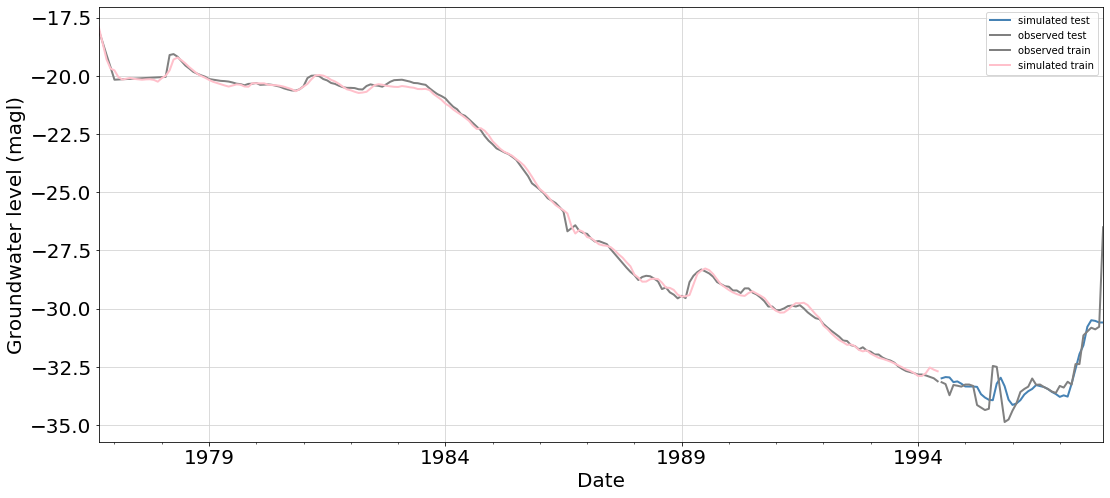

In [63]:
mse_lstm  = summary['mse_lstm'].mean(axis=0)
rmse_lstm = summary['rmse_lstm'].mean(axis=0)
mae_lstm  = summary['mae_lstm'].mean(axis=0)
r2_lstm   = summary['r2_lstm'].mean(axis=0)
stdv_lstm = stdv.mean(axis=0)


print("The model performance for the train set")
print("-------------------------------------------")
print("Mean squared error is:",msetrain.round(3))
print("Root mean squared error is:",rmsetrain.round(3))
print("Mean absolute error is:",mae_train.round(3))
print("R^2 score is: ", r2train.round(3))
print("")

print("The model performance for the test set")
print("--------------------------------------")
print("R^2 score is: ",round(r2_lstm, 3))
print("Mean squared error is:",round(mse_lstm,3))
print("Root mean squared error is:",round(rmse_lstm, 3))
print("Mean absolute error is:",round(mae_lstm,3))
print(round(stdv_lstm,3))


df1 = pd.DataFrame(test_inverse_trans[6].values, columns  = ['simulated test'],index  =pima1.iloc[214:256].index)
df1['observed test']      = pima['D4N0126'].iloc[214:256].values

df2 = pd.DataFrame(train_inverse_trans[6].values, columns = ['simulated train'],index =pima1.iloc[0:214].index)
df2['observed train'] = pima['D4N0126'].iloc[0:214].values

out_df = df2.append(df1, sort=True)




#plot
out_df['simulated test'].plot(color='steelblue', linewidth=2)
out_df['observed test'].plot(fontsize=20, color='grey', linewidth=2)
out_df['observed train'].plot(color='grey', linewidth=2)
out_df['simulated train'].plot(color='pink', linewidth=2)
plt.grid(axis='both', color='lightgrey')
plt.rcParams['axes.facecolor'] = 'w'
plt.xlabel("Date",fontsize=20)
plt.ylabel("Groundwater level (magl)",fontsize=20)
plt.legend(loc='best')
plt.gcf().set_size_inches(18,8)

In [64]:
y_lstm = out_df['simulated test']

### GRU

In [65]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import GRU
from tensorflow.keras.optimizers import Adam

In [66]:
from sklearn.metrics import *
import numpy as np
import csv  

# rounding off
Round = 3      

train_pred = []
test_pred  = []

fields = ['Iteration_No', 'mse_gru', 'rmse_gru', 'r2_gru','mae_gru'] 
csvfile = open('Summary.csv', 'w') 
csvwriter = csv.writer(csvfile)  
csvwriter.writerow(fields) 

for fold in range(1,11):
    print(f'Running fold {fold}')
    print(X_train.shape)


    check = ModelCheckpoint('model.h5', verbose=1, save_best_only=True)

    early = EarlyStopping(patience=100)

    optimizer = Adam(lr=0.00001)
    model = Sequential()
    model.add(GRU(20, input_shape=(1, 6)))
    model.add(Dropout(0.1))

    model.add(Dense(1))

    model.compile(loss='mse', optimizer='rmsprop', metrics=['mse'])

    X_t_reshaped   = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_val_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

    history = model.fit(X_t_reshaped, 
                    y_train, 
                    validation_data=(X_val_reshaped, y_test),
                    epochs=1000, 
                    batch_size=96, 
                    verbose=1, callbacks=[check, early])
    X_val_reshaped = X_val_reshaped.reshape(42, 6)

    #running function
    gwl = -1.31373896
    test_forecast = X_test
    steps_ahead = 42
    y_gru = forecast(model, test_forecast, gwl, steps_ahead)
    y_gru = np.array(y_gru)
    
    #metrics for test
    y_gru = y_gru
    test_pred.append(y_gru)
    mse_gru = mean_squared_error(y_test, y_gru)
    rmse_gru = np.sqrt(mse_gru)
    r2_gru = r2_score(y_test, y_gru)
    mae_gru = mean_absolute_error(y_test, y_gru)

    #metrics train 
    train     = model.predict(X_t_reshaped)
    train_pred.append(train)
    msetrain  = mean_squared_error(y_train, train)
    rmsetrain = np.sqrt(msetrain)
    mae_train = mean_absolute_error(y_train, train)
    r2train   = r2_score(y_train, train)
    
    csvwriter.writerow([f'Iteration_{fold}',round(mse_gru,Round), round(rmse_gru,Round), round(r2_gru,Round),round(mae_gru,Round)]) 

csvfile.close()
summary= pd.read_csv('Summary.csv')
    

Running fold 1
(214, 6)
Train on 214 samples, validate on 42 samples
Epoch 1/1000
 96/214 [============>.................] - ETA: 2s - loss: 0.8776 - mean_squared_error: 0.8776
Epoch 00001: val_loss improved from inf to 1.20382, saving model to model.h5
214/214 [==============================] - 5s 23ms/sample - loss: 0.8002 - mean_squared_error: 0.8002 - val_loss: 1.2038 - val_mean_squared_error: 1.2038
Epoch 2/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.6301 - mean_squared_error: 0.6301
Epoch 00002: val_loss improved from 1.20382 to 1.09147, saving model to model.h5
214/214 [==============================] - 0s 360us/sample - loss: 0.6392 - mean_squared_error: 0.6392 - val_loss: 1.0915 - val_mean_squared_error: 1.0915
Epoch 3/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.5700 - mean_squared_error: 0.5700
Epoch 00003: val_loss improved from 1.09147 to 1.00305, saving model to model.h5
214/214 [==============================] - 0s 273us/sample 

Epoch 25/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0381 - mean_squared_error: 0.0381
Epoch 00025: val_loss improved from 0.17214 to 0.15954, saving model to model.h5
214/214 [==============================] - 0s 220us/sample - loss: 0.0397 - mean_squared_error: 0.0397 - val_loss: 0.1595 - val_mean_squared_error: 0.1595
Epoch 26/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0485 - mean_squared_error: 0.0485
Epoch 00026: val_loss improved from 0.15954 to 0.14083, saving model to model.h5
214/214 [==============================] - 0s 222us/sample - loss: 0.0444 - mean_squared_error: 0.0444 - val_loss: 0.1408 - val_mean_squared_error: 0.1408
Epoch 27/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0354 - mean_squared_error: 0.0354
Epoch 00027: val_loss improved from 0.14083 to 0.12171, saving model to model.h5
214/214 [==============================] - 0s 224us/sample - loss: 0.0408 - mean_squared_error: 0.0408 - val_loss: 0.121

214/214 [==============================] - 0s 264us/sample - loss: 0.0147 - mean_squared_error: 0.0147 - val_loss: 0.0314 - val_mean_squared_error: 0.0314
Epoch 50/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0161 - mean_squared_error: 0.0161
Epoch 00050: val_loss improved from 0.03145 to 0.03001, saving model to model.h5
214/214 [==============================] - 0s 214us/sample - loss: 0.0153 - mean_squared_error: 0.0153 - val_loss: 0.0300 - val_mean_squared_error: 0.0300
Epoch 51/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0154 - mean_squared_error: 0.0154
Epoch 00051: val_loss did not improve from 0.03001
214/214 [==============================] - 0s 164us/sample - loss: 0.0141 - mean_squared_error: 0.0141 - val_loss: 0.0327 - val_mean_squared_error: 0.0327
Epoch 52/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0138 - mean_squared_error: 0.0138
Epoch 00052: val_loss did not improve from 0.03001
214/214 [================

Epoch 75/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0134 - mean_squared_error: 0.0134
Epoch 00075: val_loss improved from 0.02429 to 0.02422, saving model to model.h5
214/214 [==============================] - 0s 219us/sample - loss: 0.0107 - mean_squared_error: 0.0107 - val_loss: 0.0242 - val_mean_squared_error: 0.0242
Epoch 76/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0145 - mean_squared_error: 0.0145
Epoch 00076: val_loss did not improve from 0.02422
214/214 [==============================] - 0s 105us/sample - loss: 0.0123 - mean_squared_error: 0.0123 - val_loss: 0.0244 - val_mean_squared_error: 0.0244
Epoch 77/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0098 - mean_squared_error: 0.0098
Epoch 00077: val_loss did not improve from 0.02422
214/214 [==============================] - 0s 104us/sample - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.0254 - val_mean_squared_error: 0.0254
Epoch 78/1000
 96/214 [==

 96/214 [============>.................] - ETA: 0s - loss: 0.0084 - mean_squared_error: 0.0084
Epoch 00100: val_loss did not improve from 0.02375
214/214 [==============================] - 0s 172us/sample - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.0243 - val_mean_squared_error: 0.0243
Epoch 101/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0082 - mean_squared_error: 0.0082
Epoch 00101: val_loss did not improve from 0.02375
214/214 [==============================] - 0s 123us/sample - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.0244 - val_mean_squared_error: 0.0244
Epoch 102/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0078 - mean_squared_error: 0.0078
Epoch 00102: val_loss did not improve from 0.02375
214/214 [==============================] - 0s 138us/sample - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.0240 - val_mean_squared_error: 0.0240
Epoch 103/1000
 96/214 [============>.................] - ETA: 0s -

Epoch 126/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0120 - mean_squared_error: 0.0120
Epoch 00126: val_loss did not improve from 0.02352
214/214 [==============================] - 0s 100us/sample - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.0253 - val_mean_squared_error: 0.0253
Epoch 127/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0084 - mean_squared_error: 0.0084
Epoch 00127: val_loss did not improve from 0.02352
214/214 [==============================] - 0s 101us/sample - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.0244 - val_mean_squared_error: 0.0244
Epoch 128/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0096 - mean_squared_error: 0.0096
Epoch 00128: val_loss did not improve from 0.02352
214/214 [==============================] - 0s 142us/sample - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.0246 - val_mean_squared_error: 0.0246
Epoch 129/1000
 96/214 [============>...............

Epoch 152/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0089 - mean_squared_error: 0.0089
Epoch 00152: val_loss did not improve from 0.02352
214/214 [==============================] - 0s 103us/sample - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.0253 - val_mean_squared_error: 0.0253
Epoch 153/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0103 - mean_squared_error: 0.0103
Epoch 00153: val_loss did not improve from 0.02352
214/214 [==============================] - 0s 93us/sample - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.0238 - val_mean_squared_error: 0.0238
Epoch 154/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0114 - mean_squared_error: 0.0114
Epoch 00154: val_loss did not improve from 0.02352
214/214 [==============================] - 0s 106us/sample - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.0242 - val_mean_squared_error: 0.0242
Epoch 155/1000
 96/214 [============>................

Epoch 178/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0062 - mean_squared_error: 0.0062
Epoch 00178: val_loss did not improve from 0.02352
214/214 [==============================] - 0s 110us/sample - loss: 0.0070 - mean_squared_error: 0.0070 - val_loss: 0.0265 - val_mean_squared_error: 0.0265
Epoch 179/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0084 - mean_squared_error: 0.0084
Epoch 00179: val_loss did not improve from 0.02352
214/214 [==============================] - 0s 126us/sample - loss: 0.0074 - mean_squared_error: 0.0074 - val_loss: 0.0241 - val_mean_squared_error: 0.0241
Epoch 180/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0064 - mean_squared_error: 0.0064
Epoch 00180: val_loss did not improve from 0.02352
214/214 [==============================] - 0s 117us/sample - loss: 0.0070 - mean_squared_error: 0.0070 - val_loss: 0.0242 - val_mean_squared_error: 0.0242
Epoch 181/1000
 96/214 [============>...............

Epoch 204/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0080 - mean_squared_error: 0.0080
Epoch 00204: val_loss did not improve from 0.02352
214/214 [==============================] - 0s 106us/sample - loss: 0.0070 - mean_squared_error: 0.0070 - val_loss: 0.0242 - val_mean_squared_error: 0.0242
Epoch 205/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0067 - mean_squared_error: 0.0067
Epoch 00205: val_loss did not improve from 0.02352
214/214 [==============================] - 0s 96us/sample - loss: 0.0057 - mean_squared_error: 0.0057 - val_loss: 0.0249 - val_mean_squared_error: 0.0249
Epoch 206/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0093 - mean_squared_error: 0.0093
Epoch 00206: val_loss did not improve from 0.02352
214/214 [==============================] - 0s 97us/sample - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.0244 - val_mean_squared_error: 0.0244
Epoch 207/1000
 96/214 [============>.................

Epoch 12/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0197 - mean_squared_error: 0.0197
Epoch 00012: val_loss improved from 0.08011 to 0.07664, saving model to model.h5
214/214 [==============================] - 0s 539us/sample - loss: 0.0228 - mean_squared_error: 0.0228 - val_loss: 0.0766 - val_mean_squared_error: 0.0766
Epoch 13/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0294 - mean_squared_error: 0.0294
Epoch 00013: val_loss improved from 0.07664 to 0.06957, saving model to model.h5
214/214 [==============================] - 0s 331us/sample - loss: 0.0220 - mean_squared_error: 0.0220 - val_loss: 0.0696 - val_mean_squared_error: 0.0696
Epoch 14/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0244 - mean_squared_error: 0.0244
Epoch 00014: val_loss improved from 0.06957 to 0.06253, saving model to model.h5
214/214 [==============================] - 0s 189us/sample - loss: 0.0237 - mean_squared_error: 0.0237 - val_loss: 0.062

Epoch 37/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0105 - mean_squared_error: 0.0105
Epoch 00037: val_loss improved from 0.03099 to 0.03050, saving model to model.h5
214/214 [==============================] - 0s 192us/sample - loss: 0.0111 - mean_squared_error: 0.0111 - val_loss: 0.0305 - val_mean_squared_error: 0.0305
Epoch 38/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0138 - mean_squared_error: 0.0138
Epoch 00038: val_loss did not improve from 0.03050
214/214 [==============================] - 0s 116us/sample - loss: 0.0128 - mean_squared_error: 0.0128 - val_loss: 0.0314 - val_mean_squared_error: 0.0314
Epoch 39/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0128 - mean_squared_error: 0.0128
Epoch 00039: val_loss improved from 0.03050 to 0.02967, saving model to model.h5
214/214 [==============================] - 0s 187us/sample - loss: 0.0114 - mean_squared_error: 0.0114 - val_loss: 0.0297 - val_mean_squared_error: 0.

 96/214 [============>.................] - ETA: 0s - loss: 0.0122 - mean_squared_error: 0.0122
Epoch 00062: val_loss did not improve from 0.02548
214/214 [==============================] - 0s 137us/sample - loss: 0.0116 - mean_squared_error: 0.0116 - val_loss: 0.0260 - val_mean_squared_error: 0.0260
Epoch 63/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0123 - mean_squared_error: 0.0123
Epoch 00063: val_loss did not improve from 0.02548
214/214 [==============================] - 0s 197us/sample - loss: 0.0120 - mean_squared_error: 0.0120 - val_loss: 0.0256 - val_mean_squared_error: 0.0256
Epoch 64/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0078 - mean_squared_error: 0.0078
Epoch 00064: val_loss did not improve from 0.02548
214/214 [==============================] - 0s 123us/sample - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.0278 - val_mean_squared_error: 0.0278
Epoch 65/1000
 96/214 [============>.................] - ETA: 0s - lo

Epoch 88/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0073 - mean_squared_error: 0.0073
Epoch 00088: val_loss did not improve from 0.02488
214/214 [==============================] - 0s 100us/sample - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.0249 - val_mean_squared_error: 0.0249
Epoch 89/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0117 - mean_squared_error: 0.0117
Epoch 00089: val_loss did not improve from 0.02488
214/214 [==============================] - 0s 100us/sample - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.0256 - val_mean_squared_error: 0.0256
Epoch 90/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0073 - mean_squared_error: 0.0073
Epoch 00090: val_loss did not improve from 0.02488
214/214 [==============================] - 0s 98us/sample - loss: 0.0072 - mean_squared_error: 0.0072 - val_loss: 0.0266 - val_mean_squared_error: 0.0266
Epoch 91/1000
 96/214 [============>.................] -

Epoch 114/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0094 - mean_squared_error: 0.0094
Epoch 00114: val_loss did not improve from 0.02436
214/214 [==============================] - 0s 115us/sample - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.0247 - val_mean_squared_error: 0.0247
Epoch 115/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0088 - mean_squared_error: 0.0088
Epoch 00115: val_loss improved from 0.02436 to 0.02428, saving model to model.h5
214/214 [==============================] - 0s 219us/sample - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.0243 - val_mean_squared_error: 0.0243
Epoch 116/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0072 - mean_squared_error: 0.0072
Epoch 00116: val_loss did not improve from 0.02428
214/214 [==============================] - 0s 129us/sample - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.0248 - val_mean_squared_error: 0.0248
Epoch 117/1000
 96/214

Epoch 140/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0085 - mean_squared_error: 0.0085
Epoch 00140: val_loss did not improve from 0.02383
214/214 [==============================] - 0s 189us/sample - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.0240 - val_mean_squared_error: 0.0240
Epoch 141/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0069 - mean_squared_error: 0.0069
Epoch 00141: val_loss did not improve from 0.02383
214/214 [==============================] - 0s 122us/sample - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.0247 - val_mean_squared_error: 0.0247
Epoch 142/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0093 - mean_squared_error: 0.0093
Epoch 00142: val_loss did not improve from 0.02383
214/214 [==============================] - 0s 126us/sample - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.0240 - val_mean_squared_error: 0.0240
Epoch 143/1000
 96/214 [============>...............

Epoch 166/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0071 - mean_squared_error: 0.0071
Epoch 00166: val_loss did not improve from 0.02383
214/214 [==============================] - 0s 84us/sample - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0256 - val_mean_squared_error: 0.0256
Epoch 167/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0067 - mean_squared_error: 0.0067
Epoch 00167: val_loss did not improve from 0.02383
214/214 [==============================] - 0s 86us/sample - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.0255 - val_mean_squared_error: 0.0255
Epoch 168/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0060 - mean_squared_error: 0.0060
Epoch 00168: val_loss did not improve from 0.02383
214/214 [==============================] - 0s 93us/sample - loss: 0.0067 - mean_squared_error: 0.0067 - val_loss: 0.0247 - val_mean_squared_error: 0.0247
Epoch 169/1000
 96/214 [============>.................]

Epoch 192/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0075 - mean_squared_error: 0.0075
Epoch 00192: val_loss did not improve from 0.02365
214/214 [==============================] - 0s 89us/sample - loss: 0.0067 - mean_squared_error: 0.0067 - val_loss: 0.0250 - val_mean_squared_error: 0.0250
Epoch 193/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0053 - mean_squared_error: 0.0053
Epoch 00193: val_loss did not improve from 0.02365
214/214 [==============================] - 0s 87us/sample - loss: 0.0061 - mean_squared_error: 0.0061 - val_loss: 0.0247 - val_mean_squared_error: 0.0247
Epoch 194/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0082 - mean_squared_error: 0.0082
Epoch 00194: val_loss did not improve from 0.02365
214/214 [==============================] - 0s 89us/sample - loss: 0.0074 - mean_squared_error: 0.0074 - val_loss: 0.0242 - val_mean_squared_error: 0.0242
Epoch 195/1000
 96/214 [============>.................]

Epoch 218/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0063 - mean_squared_error: 0.0063
Epoch 00218: val_loss did not improve from 0.02365
214/214 [==============================] - 0s 97us/sample - loss: 0.0060 - mean_squared_error: 0.0060 - val_loss: 0.0243 - val_mean_squared_error: 0.0243
Epoch 219/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0083 - mean_squared_error: 0.0083
Epoch 00219: val_loss did not improve from 0.02365
214/214 [==============================] - 0s 113us/sample - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.0242 - val_mean_squared_error: 0.0242
Epoch 220/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0076 - mean_squared_error: 0.0076
Epoch 00220: val_loss did not improve from 0.02365
214/214 [==============================] - 0s 103us/sample - loss: 0.0061 - mean_squared_error: 0.0061 - val_loss: 0.0247 - val_mean_squared_error: 0.0247
Epoch 221/1000
 96/214 [============>................

Epoch 244/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0067 - mean_squared_error: 0.0067
Epoch 00244: val_loss did not improve from 0.02365
214/214 [==============================] - 0s 111us/sample - loss: 0.0059 - mean_squared_error: 0.0059 - val_loss: 0.0251 - val_mean_squared_error: 0.0251
Epoch 245/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0063 - mean_squared_error: 0.0063
Epoch 00245: val_loss did not improve from 0.02365
214/214 [==============================] - 0s 106us/sample - loss: 0.0059 - mean_squared_error: 0.0059 - val_loss: 0.0281 - val_mean_squared_error: 0.0281
Epoch 246/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0090 - mean_squared_error: 0.0090
Epoch 00246: val_loss did not improve from 0.02365
214/214 [==============================] - 0s 111us/sample - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.0251 - val_mean_squared_error: 0.0251
Epoch 247/1000
 96/214 [============>...............

Epoch 270/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0068 - mean_squared_error: 0.0068
Epoch 00270: val_loss did not improve from 0.02365
214/214 [==============================] - 0s 218us/sample - loss: 0.0063 - mean_squared_error: 0.0063 - val_loss: 0.0260 - val_mean_squared_error: 0.0260
Epoch 271/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0075 - mean_squared_error: 0.0075
Epoch 00271: val_loss did not improve from 0.02365
214/214 [==============================] - 0s 139us/sample - loss: 0.0064 - mean_squared_error: 0.0064 - val_loss: 0.0243 - val_mean_squared_error: 0.0243
Epoch 272/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0063 - mean_squared_error: 0.0063
Epoch 00272: val_loss did not improve from 0.02365
214/214 [==============================] - 0s 122us/sample - loss: 0.0066 - mean_squared_error: 0.0066 - val_loss: 0.0241 - val_mean_squared_error: 0.0241
Epoch 273/1000
 96/214 [============>...............

Epoch 10/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.7355 - mean_squared_error: 0.7355
Epoch 00010: val_loss improved from 1.75777 to 1.68360, saving model to model.h5
214/214 [==============================] - 0s 191us/sample - loss: 0.6677 - mean_squared_error: 0.6677 - val_loss: 1.6836 - val_mean_squared_error: 1.6836
Epoch 11/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.6001 - mean_squared_error: 0.6001
Epoch 00011: val_loss improved from 1.68360 to 1.60851, saving model to model.h5
214/214 [==============================] - 0s 179us/sample - loss: 0.6264 - mean_squared_error: 0.6264 - val_loss: 1.6085 - val_mean_squared_error: 1.6085
Epoch 12/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.5857 - mean_squared_error: 0.5857
Epoch 00012: val_loss improved from 1.60851 to 1.55175, saving model to model.h5
214/214 [==============================] - 0s 193us/sample - loss: 0.5721 - mean_squared_error: 0.5721 - val_loss: 1.551

Epoch 34/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0713 - mean_squared_error: 0.0713
Epoch 00034: val_loss improved from 0.42554 to 0.38969, saving model to model.h5
214/214 [==============================] - 0s 209us/sample - loss: 0.0610 - mean_squared_error: 0.0610 - val_loss: 0.3897 - val_mean_squared_error: 0.3897
Epoch 35/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0748 - mean_squared_error: 0.0748
Epoch 00035: val_loss improved from 0.38969 to 0.34907, saving model to model.h5
214/214 [==============================] - 0s 202us/sample - loss: 0.0645 - mean_squared_error: 0.0645 - val_loss: 0.3491 - val_mean_squared_error: 0.3491
Epoch 36/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0545 - mean_squared_error: 0.0545
Epoch 00036: val_loss improved from 0.34907 to 0.32098, saving model to model.h5
214/214 [==============================] - 0s 247us/sample - loss: 0.0540 - mean_squared_error: 0.0540 - val_loss: 0.321

Epoch 58/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0190 - mean_squared_error: 0.0190
Epoch 00058: val_loss improved from 0.07056 to 0.06159, saving model to model.h5
214/214 [==============================] - 0s 188us/sample - loss: 0.0160 - mean_squared_error: 0.0160 - val_loss: 0.0616 - val_mean_squared_error: 0.0616
Epoch 59/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0155 - mean_squared_error: 0.0155
Epoch 00059: val_loss did not improve from 0.06159
214/214 [==============================] - 0s 99us/sample - loss: 0.0170 - mean_squared_error: 0.0170 - val_loss: 0.0633 - val_mean_squared_error: 0.0633
Epoch 60/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0110 - mean_squared_error: 0.0110
Epoch 00060: val_loss improved from 0.06159 to 0.05591, saving model to model.h5
214/214 [==============================] - 0s 181us/sample - loss: 0.0116 - mean_squared_error: 0.0116 - val_loss: 0.0559 - val_mean_squared_error: 0.0

 96/214 [============>.................] - ETA: 0s - loss: 0.0108 - mean_squared_error: 0.0108
Epoch 00083: val_loss did not improve from 0.03330
214/214 [==============================] - 0s 113us/sample - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.0336 - val_mean_squared_error: 0.0336
Epoch 84/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0087 - mean_squared_error: 0.0087
Epoch 00084: val_loss did not improve from 0.03330
214/214 [==============================] - 0s 166us/sample - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.0344 - val_mean_squared_error: 0.0344
Epoch 85/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0099 - mean_squared_error: 0.0099
Epoch 00085: val_loss did not improve from 0.03330
214/214 [==============================] - 0s 93us/sample - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.0365 - val_mean_squared_error: 0.0365
Epoch 86/1000
 96/214 [============>.................] - ETA: 0s - los

Epoch 109/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0067 - mean_squared_error: 0.0067
Epoch 00109: val_loss did not improve from 0.02722
214/214 [==============================] - 0s 158us/sample - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.0278 - val_mean_squared_error: 0.0278
Epoch 110/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0106 - mean_squared_error: 0.0106
Epoch 00110: val_loss did not improve from 0.02722
214/214 [==============================] - 0s 98us/sample - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.0278 - val_mean_squared_error: 0.0278
Epoch 111/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0126 - mean_squared_error: 0.0126
Epoch 00111: val_loss improved from 0.02722 to 0.02720, saving model to model.h5
214/214 [==============================] - 0s 179us/sample - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.0272 - val_mean_squared_error: 0.0272
Epoch 112/1000
 96/214 

Epoch 135/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0102 - mean_squared_error: 0.0102
Epoch 00135: val_loss did not improve from 0.02625
214/214 [==============================] - 0s 161us/sample - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.0292 - val_mean_squared_error: 0.0292
Epoch 136/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0077 - mean_squared_error: 0.0077
Epoch 00136: val_loss did not improve from 0.02625
214/214 [==============================] - 0s 105us/sample - loss: 0.0071 - mean_squared_error: 0.0071 - val_loss: 0.0291 - val_mean_squared_error: 0.0291
Epoch 137/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0091 - mean_squared_error: 0.0091
Epoch 00137: val_loss did not improve from 0.02625
214/214 [==============================] - 0s 101us/sample - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.0274 - val_mean_squared_error: 0.0274
Epoch 138/1000
 96/214 [============>...............

Epoch 161/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0067 - mean_squared_error: 0.0067
Epoch 00161: val_loss did not improve from 0.02606
214/214 [==============================] - 0s 112us/sample - loss: 0.0072 - mean_squared_error: 0.0072 - val_loss: 0.0265 - val_mean_squared_error: 0.0265
Epoch 162/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0089 - mean_squared_error: 0.0089
Epoch 00162: val_loss did not improve from 0.02606
214/214 [==============================] - 0s 97us/sample - loss: 0.0070 - mean_squared_error: 0.0070 - val_loss: 0.0276 - val_mean_squared_error: 0.0276
Epoch 163/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0124 - mean_squared_error: 0.0124
Epoch 00163: val_loss did not improve from 0.02606
214/214 [==============================] - 0s 108us/sample - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.0272 - val_mean_squared_error: 0.0272
Epoch 164/1000
 96/214 [============>................

Epoch 187/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0044 - mean_squared_error: 0.0044
Epoch 00187: val_loss improved from 0.02606 to 0.02602, saving model to model.h5
214/214 [==============================] - 0s 183us/sample - loss: 0.0049 - mean_squared_error: 0.0049 - val_loss: 0.0260 - val_mean_squared_error: 0.0260
Epoch 188/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0049 - mean_squared_error: 0.0049
Epoch 00188: val_loss did not improve from 0.02602
214/214 [==============================] - 0s 96us/sample - loss: 0.0058 - mean_squared_error: 0.0058 - val_loss: 0.0266 - val_mean_squared_error: 0.0266
Epoch 189/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0055 - mean_squared_error: 0.0055
Epoch 00189: val_loss did not improve from 0.02602
214/214 [==============================] - 0s 98us/sample - loss: 0.0064 - mean_squared_error: 0.0064 - val_loss: 0.0266 - val_mean_squared_error: 0.0266
Epoch 190/1000
 96/214 [

Epoch 213/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0087 - mean_squared_error: 0.0087
Epoch 00213: val_loss did not improve from 0.02602
214/214 [==============================] - 0s 122us/sample - loss: 0.0070 - mean_squared_error: 0.0070 - val_loss: 0.0272 - val_mean_squared_error: 0.0272
Epoch 214/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0052 - mean_squared_error: 0.0052
Epoch 00214: val_loss did not improve from 0.02602
214/214 [==============================] - 0s 103us/sample - loss: 0.0060 - mean_squared_error: 0.0060 - val_loss: 0.0272 - val_mean_squared_error: 0.0272
Epoch 215/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0069 - mean_squared_error: 0.0069
Epoch 00215: val_loss did not improve from 0.02602
214/214 [==============================] - 0s 94us/sample - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.0280 - val_mean_squared_error: 0.0280
Epoch 216/1000
 96/214 [============>................

Epoch 239/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0065 - mean_squared_error: 0.0065
Epoch 00239: val_loss did not improve from 0.02602
214/214 [==============================] - 0s 128us/sample - loss: 0.0062 - mean_squared_error: 0.0062 - val_loss: 0.0268 - val_mean_squared_error: 0.0268
Epoch 240/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0063 - mean_squared_error: 0.0063
Epoch 00240: val_loss did not improve from 0.02602
214/214 [==============================] - 0s 117us/sample - loss: 0.0061 - mean_squared_error: 0.0061 - val_loss: 0.0276 - val_mean_squared_error: 0.0276
Epoch 241/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0064 - mean_squared_error: 0.0064
Epoch 00241: val_loss did not improve from 0.02602
214/214 [==============================] - 0s 103us/sample - loss: 0.0066 - mean_squared_error: 0.0066 - val_loss: 0.0274 - val_mean_squared_error: 0.0274
Epoch 242/1000
 96/214 [============>...............

Epoch 265/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0063 - mean_squared_error: 0.0063
Epoch 00265: val_loss did not improve from 0.02602
214/214 [==============================] - 0s 185us/sample - loss: 0.0065 - mean_squared_error: 0.0065 - val_loss: 0.0274 - val_mean_squared_error: 0.0274
Epoch 266/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0054 - mean_squared_error: 0.0054
Epoch 00266: val_loss did not improve from 0.02602
214/214 [==============================] - 0s 137us/sample - loss: 0.0063 - mean_squared_error: 0.0063 - val_loss: 0.0284 - val_mean_squared_error: 0.0284
Epoch 267/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0087 - mean_squared_error: 0.0087
Epoch 00267: val_loss did not improve from 0.02602
214/214 [==============================] - 0s 126us/sample - loss: 0.0070 - mean_squared_error: 0.0070 - val_loss: 0.0278 - val_mean_squared_error: 0.0278
Epoch 268/1000
 96/214 [============>...............

Epoch 4/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.5797 - mean_squared_error: 0.5797
Epoch 00004: val_loss improved from 1.34796 to 1.24420, saving model to model.h5
214/214 [==============================] - 0s 171us/sample - loss: 0.5506 - mean_squared_error: 0.5506 - val_loss: 1.2442 - val_mean_squared_error: 1.2442
Epoch 5/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.5299 - mean_squared_error: 0.5299
Epoch 00005: val_loss improved from 1.24420 to 1.17373, saving model to model.h5
214/214 [==============================] - 0s 169us/sample - loss: 0.5165 - mean_squared_error: 0.5165 - val_loss: 1.1737 - val_mean_squared_error: 1.1737
Epoch 6/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.4750 - mean_squared_error: 0.4750
Epoch 00006: val_loss improved from 1.17373 to 1.09855, saving model to model.h5
214/214 [==============================] - 0s 173us/sample - loss: 0.4420 - mean_squared_error: 0.4420 - val_loss: 1.0985 -

Epoch 28/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0637 - mean_squared_error: 0.0637
Epoch 00028: val_loss improved from 0.17956 to 0.16791, saving model to model.h5
214/214 [==============================] - 0s 365us/sample - loss: 0.0659 - mean_squared_error: 0.0659 - val_loss: 0.1679 - val_mean_squared_error: 0.1679
Epoch 29/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0524 - mean_squared_error: 0.0524
Epoch 00029: val_loss improved from 0.16791 to 0.15164, saving model to model.h5
214/214 [==============================] - 0s 252us/sample - loss: 0.0572 - mean_squared_error: 0.0572 - val_loss: 0.1516 - val_mean_squared_error: 0.1516
Epoch 30/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0542 - mean_squared_error: 0.0542
Epoch 00030: val_loss improved from 0.15164 to 0.14227, saving model to model.h5
214/214 [==============================] - 0s 194us/sample - loss: 0.0538 - mean_squared_error: 0.0538 - val_loss: 0.142

 96/214 [============>.................] - ETA: 0s - loss: 0.0170 - mean_squared_error: 0.0170
Epoch 00052: val_loss did not improve from 0.04077
214/214 [==============================] - 0s 93us/sample - loss: 0.0170 - mean_squared_error: 0.0170 - val_loss: 0.0434 - val_mean_squared_error: 0.0434
Epoch 53/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0200 - mean_squared_error: 0.0200
Epoch 00053: val_loss did not improve from 0.04077
214/214 [==============================] - 0s 101us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - val_loss: 0.0450 - val_mean_squared_error: 0.0450
Epoch 54/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0205 - mean_squared_error: 0.0205
Epoch 00054: val_loss improved from 0.04077 to 0.03933, saving model to model.h5
214/214 [==============================] - 0s 161us/sample - loss: 0.0205 - mean_squared_error: 0.0205 - val_loss: 0.0393 - val_mean_squared_error: 0.0393
Epoch 55/1000
 96/214 [============>....

 96/214 [============>.................] - ETA: 0s - loss: 0.0124 - mean_squared_error: 0.0124
Epoch 00077: val_loss did not improve from 0.02885
214/214 [==============================] - 0s 110us/sample - loss: 0.0116 - mean_squared_error: 0.0116 - val_loss: 0.0300 - val_mean_squared_error: 0.0300
Epoch 78/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0150 - mean_squared_error: 0.0150
Epoch 00078: val_loss did not improve from 0.02885
214/214 [==============================] - 0s 126us/sample - loss: 0.0130 - mean_squared_error: 0.0130 - val_loss: 0.0298 - val_mean_squared_error: 0.0298
Epoch 79/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0117 - mean_squared_error: 0.0117
Epoch 00079: val_loss did not improve from 0.02885
214/214 [==============================] - 0s 101us/sample - loss: 0.0120 - mean_squared_error: 0.0120 - val_loss: 0.0292 - val_mean_squared_error: 0.0292
Epoch 80/1000
 96/214 [============>.................] - ETA: 0s - lo

Epoch 103/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0094 - mean_squared_error: 0.0094
Epoch 00103: val_loss did not improve from 0.02650
214/214 [==============================] - 0s 119us/sample - loss: 0.0105 - mean_squared_error: 0.0105 - val_loss: 0.0265 - val_mean_squared_error: 0.0265
Epoch 104/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0138 - mean_squared_error: 0.0138
Epoch 00104: val_loss improved from 0.02650 to 0.02606, saving model to model.h5
214/214 [==============================] - 0s 175us/sample - loss: 0.0109 - mean_squared_error: 0.0109 - val_loss: 0.0261 - val_mean_squared_error: 0.0261
Epoch 105/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0131 - mean_squared_error: 0.0131
Epoch 00105: val_loss did not improve from 0.02606
214/214 [==============================] - 0s 101us/sample - loss: 0.0116 - mean_squared_error: 0.0116 - val_loss: 0.0270 - val_mean_squared_error: 0.0270
Epoch 106/1000
 96/214

Epoch 129/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0077 - mean_squared_error: 0.0077
Epoch 00129: val_loss did not improve from 0.02564
214/214 [==============================] - 0s 153us/sample - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.0257 - val_mean_squared_error: 0.0257
Epoch 130/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0117 - mean_squared_error: 0.0117
Epoch 00130: val_loss improved from 0.02564 to 0.02555, saving model to model.h5
214/214 [==============================] - 0s 214us/sample - loss: 0.0127 - mean_squared_error: 0.0127 - val_loss: 0.0256 - val_mean_squared_error: 0.0256
Epoch 131/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0091 - mean_squared_error: 0.0091
Epoch 00131: val_loss improved from 0.02555 to 0.02548, saving model to model.h5
214/214 [==============================] - 0s 245us/sample - loss: 0.0074 - mean_squared_error: 0.0074 - val_loss: 0.0255 - val_mean_squared_error:

Epoch 155/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0067 - mean_squared_error: 0.0067
Epoch 00155: val_loss did not improve from 0.02498
214/214 [==============================] - 0s 114us/sample - loss: 0.0070 - mean_squared_error: 0.0070 - val_loss: 0.0250 - val_mean_squared_error: 0.0250
Epoch 156/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0130 - mean_squared_error: 0.0130
Epoch 00156: val_loss did not improve from 0.02498
214/214 [==============================] - 0s 141us/sample - loss: 0.0106 - mean_squared_error: 0.0106 - val_loss: 0.0251 - val_mean_squared_error: 0.0251
Epoch 157/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0102 - mean_squared_error: 0.0102
Epoch 00157: val_loss did not improve from 0.02498
214/214 [==============================] - 0s 127us/sample - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.0263 - val_mean_squared_error: 0.0263
Epoch 158/1000
 96/214 [============>...............

Epoch 181/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0067 - mean_squared_error: 0.0067
Epoch 00181: val_loss did not improve from 0.02498
214/214 [==============================] - 0s 119us/sample - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.0251 - val_mean_squared_error: 0.0251
Epoch 182/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0061 - mean_squared_error: 0.0061
Epoch 00182: val_loss did not improve from 0.02498
214/214 [==============================] - 0s 94us/sample - loss: 0.0075 - mean_squared_error: 0.0075 - val_loss: 0.0267 - val_mean_squared_error: 0.0267
Epoch 183/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0061 - mean_squared_error: 0.0061
Epoch 00183: val_loss did not improve from 0.02498
214/214 [==============================] - 0s 92us/sample - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.0255 - val_mean_squared_error: 0.0255
Epoch 184/1000
 96/214 [============>.................

Epoch 207/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0060 - mean_squared_error: 0.0060
Epoch 00207: val_loss did not improve from 0.02494
214/214 [==============================] - 0s 110us/sample - loss: 0.0062 - mean_squared_error: 0.0062 - val_loss: 0.0256 - val_mean_squared_error: 0.0256
Epoch 208/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0051 - mean_squared_error: 0.0051
Epoch 00208: val_loss did not improve from 0.02494
214/214 [==============================] - 0s 123us/sample - loss: 0.0056 - mean_squared_error: 0.0056 - val_loss: 0.0251 - val_mean_squared_error: 0.0251
Epoch 209/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0065 - mean_squared_error: 0.0065
Epoch 00209: val_loss did not improve from 0.02494
214/214 [==============================] - 0s 126us/sample - loss: 0.0068 - mean_squared_error: 0.0068 - val_loss: 0.0253 - val_mean_squared_error: 0.0253
Epoch 210/1000
 96/214 [============>...............

Epoch 233/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0055 - mean_squared_error: 0.0055
Epoch 00233: val_loss did not improve from 0.02494
214/214 [==============================] - 0s 133us/sample - loss: 0.0061 - mean_squared_error: 0.0061 - val_loss: 0.0254 - val_mean_squared_error: 0.0254
Epoch 234/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0070 - mean_squared_error: 0.0070
Epoch 00234: val_loss did not improve from 0.02494
214/214 [==============================] - 0s 169us/sample - loss: 0.0062 - mean_squared_error: 0.0062 - val_loss: 0.0266 - val_mean_squared_error: 0.0266
Epoch 235/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0093 - mean_squared_error: 0.0093
Epoch 00235: val_loss did not improve from 0.02494
214/214 [==============================] - 0s 119us/sample - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.0269 - val_mean_squared_error: 0.0269
Epoch 236/1000
 96/214 [============>...............

Epoch 259/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0069 - mean_squared_error: 0.0069
Epoch 00259: val_loss did not improve from 0.02494
214/214 [==============================] - 0s 95us/sample - loss: 0.0062 - mean_squared_error: 0.0062 - val_loss: 0.0292 - val_mean_squared_error: 0.0292
Epoch 260/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0076 - mean_squared_error: 0.0076
Epoch 00260: val_loss did not improve from 0.02494
214/214 [==============================] - 0s 123us/sample - loss: 0.0068 - mean_squared_error: 0.0068 - val_loss: 0.0259 - val_mean_squared_error: 0.0259
Epoch 261/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0077 - mean_squared_error: 0.0077
Epoch 00261: val_loss did not improve from 0.02494
214/214 [==============================] - 0s 140us/sample - loss: 0.0074 - mean_squared_error: 0.0074 - val_loss: 0.0276 - val_mean_squared_error: 0.0276
Epoch 262/1000
 96/214 [============>................

Epoch 285/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0059 - mean_squared_error: 0.0059
Epoch 00285: val_loss did not improve from 0.02494
214/214 [==============================] - 0s 115us/sample - loss: 0.0064 - mean_squared_error: 0.0064 - val_loss: 0.0289 - val_mean_squared_error: 0.0289
Epoch 286/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0075 - mean_squared_error: 0.0075
Epoch 00286: val_loss did not improve from 0.02494
214/214 [==============================] - 0s 98us/sample - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.0259 - val_mean_squared_error: 0.0259
Epoch 287/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0066 - mean_squared_error: 0.0066
Epoch 00287: val_loss did not improve from 0.02494
214/214 [==============================] - 0s 109us/sample - loss: 0.0058 - mean_squared_error: 0.0058 - val_loss: 0.0275 - val_mean_squared_error: 0.0275
Epoch 288/1000
 96/214 [============>................

 96/214 [============>.................] - ETA: 0s - loss: 0.4801 - mean_squared_error: 0.4801
Epoch 00009: val_loss improved from 1.57850 to 1.49324, saving model to model.h5
214/214 [==============================] - 0s 173us/sample - loss: 0.4773 - mean_squared_error: 0.4773 - val_loss: 1.4932 - val_mean_squared_error: 1.4932
Epoch 10/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.4233 - mean_squared_error: 0.4233
Epoch 00010: val_loss improved from 1.49324 to 1.41614, saving model to model.h5
214/214 [==============================] - 0s 210us/sample - loss: 0.4307 - mean_squared_error: 0.4307 - val_loss: 1.4161 - val_mean_squared_error: 1.4161
Epoch 11/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.4451 - mean_squared_error: 0.4451
Epoch 00011: val_loss improved from 1.41614 to 1.35638, saving model to model.h5
214/214 [==============================] - 0s 196us/sample - loss: 0.3955 - mean_squared_error: 0.3955 - val_loss: 1.3564 - val_mean_s

Epoch 33/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0501 - mean_squared_error: 0.0501
Epoch 00033: val_loss improved from 0.28716 to 0.25978, saving model to model.h5
214/214 [==============================] - 0s 235us/sample - loss: 0.0468 - mean_squared_error: 0.0468 - val_loss: 0.2598 - val_mean_squared_error: 0.2598
Epoch 34/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0547 - mean_squared_error: 0.0547
Epoch 00034: val_loss improved from 0.25978 to 0.24397, saving model to model.h5
214/214 [==============================] - 0s 212us/sample - loss: 0.0495 - mean_squared_error: 0.0495 - val_loss: 0.2440 - val_mean_squared_error: 0.2440
Epoch 35/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0420 - mean_squared_error: 0.0420
Epoch 00035: val_loss improved from 0.24397 to 0.22384, saving model to model.h5
214/214 [==============================] - 0s 175us/sample - loss: 0.0442 - mean_squared_error: 0.0442 - val_loss: 0.223

 96/214 [============>.................] - ETA: 0s - loss: 0.0170 - mean_squared_error: 0.0170
Epoch 00057: val_loss did not improve from 0.04097
214/214 [==============================] - 0s 187us/sample - loss: 0.0173 - mean_squared_error: 0.0173 - val_loss: 0.0443 - val_mean_squared_error: 0.0443
Epoch 58/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0122 - mean_squared_error: 0.0122
Epoch 00058: val_loss did not improve from 0.04097
214/214 [==============================] - 0s 129us/sample - loss: 0.0139 - mean_squared_error: 0.0139 - val_loss: 0.0439 - val_mean_squared_error: 0.0439
Epoch 59/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0186 - mean_squared_error: 0.0186
Epoch 00059: val_loss did not improve from 0.04097
214/214 [==============================] - 0s 158us/sample - loss: 0.0162 - mean_squared_error: 0.0162 - val_loss: 0.0457 - val_mean_squared_error: 0.0457
Epoch 60/1000
 96/214 [============>.................] - ETA: 0s - lo

 96/214 [============>.................] - ETA: 0s - loss: 0.0157 - mean_squared_error: 0.0157
Epoch 00082: val_loss improved from 0.02643 to 0.02580, saving model to model.h5
214/214 [==============================] - 0s 254us/sample - loss: 0.0114 - mean_squared_error: 0.0114 - val_loss: 0.0258 - val_mean_squared_error: 0.0258
Epoch 83/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0094 - mean_squared_error: 0.0094
Epoch 00083: val_loss did not improve from 0.02580
214/214 [==============================] - 0s 153us/sample - loss: 0.0119 - mean_squared_error: 0.0119 - val_loss: 0.0259 - val_mean_squared_error: 0.0259
Epoch 84/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0106 - mean_squared_error: 0.0106
Epoch 00084: val_loss did not improve from 0.02580
214/214 [==============================] - 0s 126us/sample - loss: 0.0122 - mean_squared_error: 0.0122 - val_loss: 0.0273 - val_mean_squared_error: 0.0273
Epoch 85/1000
 96/214 [============>...

Epoch 108/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0126 - mean_squared_error: 0.0126
Epoch 00108: val_loss did not improve from 0.02470
214/214 [==============================] - 0s 237us/sample - loss: 0.0115 - mean_squared_error: 0.0115 - val_loss: 0.0254 - val_mean_squared_error: 0.0254
Epoch 109/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0091 - mean_squared_error: 0.0091
Epoch 00109: val_loss did not improve from 0.02470
214/214 [==============================] - 0s 144us/sample - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.0248 - val_mean_squared_error: 0.0248
Epoch 110/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0111 - mean_squared_error: 0.0111
Epoch 00110: val_loss did not improve from 0.02470
214/214 [==============================] - 0s 174us/sample - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.0251 - val_mean_squared_error: 0.0251
Epoch 111/1000
 96/214 [============>...............

Epoch 134/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0070 - mean_squared_error: 0.0070
Epoch 00134: val_loss improved from 0.02432 to 0.02402, saving model to model.h5
214/214 [==============================] - 0s 457us/sample - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.0240 - val_mean_squared_error: 0.0240
Epoch 135/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0074 - mean_squared_error: 0.0074
Epoch 00135: val_loss did not improve from 0.02402
214/214 [==============================] - 0s 149us/sample - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.0242 - val_mean_squared_error: 0.0242
Epoch 136/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0059 - mean_squared_error: 0.0059
Epoch 00136: val_loss did not improve from 0.02402
214/214 [==============================] - 0s 193us/sample - loss: 0.0067 - mean_squared_error: 0.0067 - val_loss: 0.0253 - val_mean_squared_error: 0.0253
Epoch 137/1000
 96/214

Epoch 160/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0069 - mean_squared_error: 0.0069
Epoch 00160: val_loss did not improve from 0.02398
214/214 [==============================] - 0s 227us/sample - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.0243 - val_mean_squared_error: 0.0243
Epoch 161/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0104 - mean_squared_error: 0.0104
Epoch 00161: val_loss did not improve from 0.02398
214/214 [==============================] - 0s 199us/sample - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.0245 - val_mean_squared_error: 0.0245
Epoch 162/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0072 - mean_squared_error: 0.0072
Epoch 00162: val_loss did not improve from 0.02398
214/214 [==============================] - 0s 219us/sample - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.0248 - val_mean_squared_error: 0.0248
Epoch 163/1000
 96/214 [============>...............

Epoch 186/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0091 - mean_squared_error: 0.0091
Epoch 00186: val_loss did not improve from 0.02379
214/214 [==============================] - 0s 139us/sample - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.0244 - val_mean_squared_error: 0.0244
Epoch 187/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0091 - mean_squared_error: 0.0091
Epoch 00187: val_loss did not improve from 0.02379
214/214 [==============================] - 0s 147us/sample - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.0239 - val_mean_squared_error: 0.0239
Epoch 188/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0097 - mean_squared_error: 0.0097
Epoch 00188: val_loss did not improve from 0.02379
214/214 [==============================] - 0s 155us/sample - loss: 0.0075 - mean_squared_error: 0.0075 - val_loss: 0.0239 - val_mean_squared_error: 0.0239
Epoch 189/1000
 96/214 [============>...............

Epoch 212/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0090 - mean_squared_error: 0.0090
Epoch 00212: val_loss did not improve from 0.02372
214/214 [==============================] - 0s 162us/sample - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.0242 - val_mean_squared_error: 0.0242
Epoch 213/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0088 - mean_squared_error: 0.0088
Epoch 00213: val_loss did not improve from 0.02372
214/214 [==============================] - 0s 125us/sample - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.0241 - val_mean_squared_error: 0.0241
Epoch 214/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0075 - mean_squared_error: 0.0075
Epoch 00214: val_loss did not improve from 0.02372
214/214 [==============================] - 0s 183us/sample - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.0239 - val_mean_squared_error: 0.0239
Epoch 215/1000
 96/214 [============>...............

Epoch 238/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0063 - mean_squared_error: 0.0063
Epoch 00238: val_loss did not improve from 0.02363
214/214 [==============================] - 0s 168us/sample - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0240 - val_mean_squared_error: 0.0240
Epoch 239/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0072 - mean_squared_error: 0.0072
Epoch 00239: val_loss did not improve from 0.02363
214/214 [==============================] - 0s 160us/sample - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.0237 - val_mean_squared_error: 0.0237
Epoch 240/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0091 - mean_squared_error: 0.0091
Epoch 00240: val_loss did not improve from 0.02363
214/214 [==============================] - 0s 113us/sample - loss: 0.0070 - mean_squared_error: 0.0070 - val_loss: 0.0237 - val_mean_squared_error: 0.0237
Epoch 241/1000
 96/214 [============>...............

Epoch 264/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0062 - mean_squared_error: 0.0062
Epoch 00264: val_loss did not improve from 0.02360
214/214 [==============================] - 0s 114us/sample - loss: 0.0061 - mean_squared_error: 0.0061 - val_loss: 0.0239 - val_mean_squared_error: 0.0239
Epoch 265/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0062 - mean_squared_error: 0.0062
Epoch 00265: val_loss improved from 0.02360 to 0.02353, saving model to model.h5
214/214 [==============================] - 0s 175us/sample - loss: 0.0068 - mean_squared_error: 0.0068 - val_loss: 0.0235 - val_mean_squared_error: 0.0235
Epoch 266/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0068 - mean_squared_error: 0.0068
Epoch 00266: val_loss did not improve from 0.02353
214/214 [==============================] - 0s 94us/sample - loss: 0.0062 - mean_squared_error: 0.0062 - val_loss: 0.0237 - val_mean_squared_error: 0.0237
Epoch 267/1000
 96/214 

Epoch 290/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0072 - mean_squared_error: 0.0072
Epoch 00290: val_loss did not improve from 0.02353
214/214 [==============================] - 0s 99us/sample - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0250 - val_mean_squared_error: 0.0250
Epoch 291/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0089 - mean_squared_error: 0.0089
Epoch 00291: val_loss did not improve from 0.02353
214/214 [==============================] - 0s 102us/sample - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.0243 - val_mean_squared_error: 0.0243
Epoch 292/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0066 - mean_squared_error: 0.0066
Epoch 00292: val_loss did not improve from 0.02353
214/214 [==============================] - 0s 117us/sample - loss: 0.0067 - mean_squared_error: 0.0067 - val_loss: 0.0238 - val_mean_squared_error: 0.0238
Epoch 293/1000
 96/214 [============>................

Epoch 316/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0053 - mean_squared_error: 0.0053
Epoch 00316: val_loss did not improve from 0.02353
214/214 [==============================] - 0s 105us/sample - loss: 0.0059 - mean_squared_error: 0.0059 - val_loss: 0.0242 - val_mean_squared_error: 0.0242
Epoch 317/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0061 - mean_squared_error: 0.0061
Epoch 00317: val_loss did not improve from 0.02353
214/214 [==============================] - 0s 97us/sample - loss: 0.0065 - mean_squared_error: 0.0065 - val_loss: 0.0239 - val_mean_squared_error: 0.0239
Epoch 318/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0079 - mean_squared_error: 0.0079
Epoch 00318: val_loss did not improve from 0.02353
214/214 [==============================] - 0s 105us/sample - loss: 0.0066 - mean_squared_error: 0.0066 - val_loss: 0.0241 - val_mean_squared_error: 0.0241
Epoch 319/1000
 96/214 [============>................

Epoch 342/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0077 - mean_squared_error: 0.0077
Epoch 00342: val_loss did not improve from 0.02353
214/214 [==============================] - 0s 169us/sample - loss: 0.0062 - mean_squared_error: 0.0062 - val_loss: 0.0238 - val_mean_squared_error: 0.0238
Epoch 343/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0075 - mean_squared_error: 0.0075
Epoch 00343: val_loss did not improve from 0.02353
214/214 [==============================] - 0s 128us/sample - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.0242 - val_mean_squared_error: 0.0242
Epoch 344/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0091 - mean_squared_error: 0.0091
Epoch 00344: val_loss did not improve from 0.02353
214/214 [==============================] - 0s 125us/sample - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.0239 - val_mean_squared_error: 0.0239
Epoch 345/1000
 96/214 [============>...............

Epoch 3/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.4148 - mean_squared_error: 0.4148
Epoch 00003: val_loss improved from 1.02789 to 0.97840, saving model to model.h5
214/214 [==============================] - 0s 185us/sample - loss: 0.4318 - mean_squared_error: 0.4318 - val_loss: 0.9784 - val_mean_squared_error: 0.9784
Epoch 4/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.3909 - mean_squared_error: 0.3909
Epoch 00004: val_loss improved from 0.97840 to 0.93490, saving model to model.h5
214/214 [==============================] - 0s 188us/sample - loss: 0.3656 - mean_squared_error: 0.3656 - val_loss: 0.9349 - val_mean_squared_error: 0.9349
Epoch 5/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.3343 - mean_squared_error: 0.3343
Epoch 00005: val_loss improved from 0.93490 to 0.88812, saving model to model.h5
214/214 [==============================] - 0s 165us/sample - loss: 0.3199 - mean_squared_error: 0.3199 - val_loss: 0.8881 -

Epoch 27/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0413 - mean_squared_error: 0.0413
Epoch 00027: val_loss improved from 0.23803 to 0.22128, saving model to model.h5
214/214 [==============================] - 0s 232us/sample - loss: 0.0443 - mean_squared_error: 0.0443 - val_loss: 0.2213 - val_mean_squared_error: 0.2213
Epoch 28/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0462 - mean_squared_error: 0.0462
Epoch 00028: val_loss improved from 0.22128 to 0.20914, saving model to model.h5
214/214 [==============================] - 0s 187us/sample - loss: 0.0456 - mean_squared_error: 0.0456 - val_loss: 0.2091 - val_mean_squared_error: 0.2091
Epoch 29/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0378 - mean_squared_error: 0.0378
Epoch 00029: val_loss improved from 0.20914 to 0.19116, saving model to model.h5
214/214 [==============================] - 0s 180us/sample - loss: 0.0367 - mean_squared_error: 0.0367 - val_loss: 0.191

 96/214 [============>.................] - ETA: 0s - loss: 0.0156 - mean_squared_error: 0.0156
Epoch 00051: val_loss improved from 0.04894 to 0.04645, saving model to model.h5
214/214 [==============================] - 0s 251us/sample - loss: 0.0164 - mean_squared_error: 0.0164 - val_loss: 0.0464 - val_mean_squared_error: 0.0464
Epoch 52/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0152 - mean_squared_error: 0.0152
Epoch 00052: val_loss did not improve from 0.04645
214/214 [==============================] - 0s 107us/sample - loss: 0.0150 - mean_squared_error: 0.0150 - val_loss: 0.0466 - val_mean_squared_error: 0.0466
Epoch 53/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 00053: val_loss improved from 0.04645 to 0.04229, saving model to model.h5
214/214 [==============================] - 0s 187us/sample - loss: 0.0161 - mean_squared_error: 0.0161 - val_loss: 0.0423 - val_mean_squared_error: 0.0423
Epoch 54/

Epoch 76/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0093 - mean_squared_error: 0.0093
Epoch 00076: val_loss improved from 0.03074 to 0.03048, saving model to model.h5
214/214 [==============================] - 0s 185us/sample - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.0305 - val_mean_squared_error: 0.0305
Epoch 77/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0097 - mean_squared_error: 0.0097
Epoch 00077: val_loss improved from 0.03048 to 0.03040, saving model to model.h5
214/214 [==============================] - 0s 183us/sample - loss: 0.0105 - mean_squared_error: 0.0105 - val_loss: 0.0304 - val_mean_squared_error: 0.0304
Epoch 78/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0097 - mean_squared_error: 0.0097
Epoch 00078: val_loss did not improve from 0.03040
214/214 [==============================] - 0s 98us/sample - loss: 0.0105 - mean_squared_error: 0.0105 - val_loss: 0.0315 - val_mean_squared_error: 0.0

Epoch 102/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0072 - mean_squared_error: 0.0072
Epoch 00102: val_loss did not improve from 0.02533
214/214 [==============================] - 0s 139us/sample - loss: 0.0074 - mean_squared_error: 0.0074 - val_loss: 0.0262 - val_mean_squared_error: 0.0262
Epoch 103/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0117 - mean_squared_error: 0.0117
Epoch 00103: val_loss did not improve from 0.02533
214/214 [==============================] - 0s 94us/sample - loss: 0.0112 - mean_squared_error: 0.0112 - val_loss: 0.0259 - val_mean_squared_error: 0.0259
Epoch 104/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0095 - mean_squared_error: 0.0095
Epoch 00104: val_loss did not improve from 0.02533
214/214 [==============================] - 0s 151us/sample - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.0282 - val_mean_squared_error: 0.0282
Epoch 105/1000
 96/214 [============>................

Epoch 128/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0078 - mean_squared_error: 0.0078
Epoch 00128: val_loss did not improve from 0.02517
214/214 [==============================] - 0s 97us/sample - loss: 0.0072 - mean_squared_error: 0.0072 - val_loss: 0.0263 - val_mean_squared_error: 0.0263
Epoch 129/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0093 - mean_squared_error: 0.0093
Epoch 00129: val_loss did not improve from 0.02517
214/214 [==============================] - 0s 97us/sample - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.0253 - val_mean_squared_error: 0.0253
Epoch 130/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0094 - mean_squared_error: 0.0094
Epoch 00130: val_loss did not improve from 0.02517
214/214 [==============================] - 0s 105us/sample - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.0261 - val_mean_squared_error: 0.0261
Epoch 131/1000
 96/214 [============>.................

Epoch 154/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0100 - mean_squared_error: 0.0100
Epoch 00154: val_loss did not improve from 0.02509
214/214 [==============================] - 0s 118us/sample - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.0254 - val_mean_squared_error: 0.0254
Epoch 155/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0052 - mean_squared_error: 0.0052
Epoch 00155: val_loss did not improve from 0.02509
214/214 [==============================] - 0s 106us/sample - loss: 0.0062 - mean_squared_error: 0.0062 - val_loss: 0.0254 - val_mean_squared_error: 0.0254
Epoch 156/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0099 - mean_squared_error: 0.0099
Epoch 00156: val_loss did not improve from 0.02509
214/214 [==============================] - 0s 102us/sample - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.0263 - val_mean_squared_error: 0.0263
Epoch 157/1000
 96/214 [============>...............

Epoch 180/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0068 - mean_squared_error: 0.0068
Epoch 00180: val_loss did not improve from 0.02509
214/214 [==============================] - 0s 114us/sample - loss: 0.0066 - mean_squared_error: 0.0066 - val_loss: 0.0260 - val_mean_squared_error: 0.0260
Epoch 181/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0098 - mean_squared_error: 0.0098
Epoch 00181: val_loss did not improve from 0.02509
214/214 [==============================] - 0s 103us/sample - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.0257 - val_mean_squared_error: 0.0257
Epoch 182/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0059 - mean_squared_error: 0.0059
Epoch 00182: val_loss did not improve from 0.02509
214/214 [==============================] - 0s 101us/sample - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0259 - val_mean_squared_error: 0.0259
Epoch 183/1000
 96/214 [============>...............

Epoch 206/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0060 - mean_squared_error: 0.0060
Epoch 00206: val_loss did not improve from 0.02509
214/214 [==============================] - 0s 163us/sample - loss: 0.0058 - mean_squared_error: 0.0058 - val_loss: 0.0257 - val_mean_squared_error: 0.0257
Epoch 207/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0052 - mean_squared_error: 0.0052
Epoch 00207: val_loss did not improve from 0.02509
214/214 [==============================] - 0s 129us/sample - loss: 0.0058 - mean_squared_error: 0.0058 - val_loss: 0.0263 - val_mean_squared_error: 0.0263
Epoch 208/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0067 - mean_squared_error: 0.0067
Epoch 00208: val_loss did not improve from 0.02509
214/214 [==============================] - 0s 113us/sample - loss: 0.0072 - mean_squared_error: 0.0072 - val_loss: 0.0256 - val_mean_squared_error: 0.0256
Epoch 209/1000
 96/214 [============>...............

Running fold 7
(214, 6)
Train on 214 samples, validate on 42 samples
Epoch 1/1000
 96/214 [============>.................] - ETA: 2s - loss: 0.5473 - mean_squared_error: 0.5473
Epoch 00001: val_loss improved from inf to 1.01862, saving model to model.h5
214/214 [==============================] - 6s 29ms/sample - loss: 0.5144 - mean_squared_error: 0.5144 - val_loss: 1.0186 - val_mean_squared_error: 1.0186
Epoch 2/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.4461 - mean_squared_error: 0.4461
Epoch 00002: val_loss improved from 1.01862 to 0.94585, saving model to model.h5
214/214 [==============================] - 0s 282us/sample - loss: 0.4267 - mean_squared_error: 0.4267 - val_loss: 0.9459 - val_mean_squared_error: 0.9459
Epoch 3/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.3855 - mean_squared_error: 0.3855
Epoch 00003: val_loss improved from 0.94585 to 0.88607, saving model to model.h5
214/214 [==============================] - 0s 290us/sample 

Epoch 25/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0363 - mean_squared_error: 0.0363
Epoch 00025: val_loss improved from 0.21786 to 0.20013, saving model to model.h5
214/214 [==============================] - 0s 177us/sample - loss: 0.0371 - mean_squared_error: 0.0371 - val_loss: 0.2001 - val_mean_squared_error: 0.2001
Epoch 26/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0300 - mean_squared_error: 0.0300
Epoch 00026: val_loss improved from 0.20013 to 0.18397, saving model to model.h5
214/214 [==============================] - 0s 224us/sample - loss: 0.0347 - mean_squared_error: 0.0347 - val_loss: 0.1840 - val_mean_squared_error: 0.1840
Epoch 27/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0330 - mean_squared_error: 0.0330
Epoch 00027: val_loss improved from 0.18397 to 0.17170, saving model to model.h5
214/214 [==============================] - 0s 160us/sample - loss: 0.0322 - mean_squared_error: 0.0322 - val_loss: 0.171

 96/214 [============>.................] - ETA: 0s - loss: 0.0175 - mean_squared_error: 0.0175
Epoch 00049: val_loss did not improve from 0.03724
214/214 [==============================] - 0s 140us/sample - loss: 0.0157 - mean_squared_error: 0.0157 - val_loss: 0.0380 - val_mean_squared_error: 0.0380
Epoch 50/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0120 - mean_squared_error: 0.0120
Epoch 00050: val_loss did not improve from 0.03724
214/214 [==============================] - 0s 129us/sample - loss: 0.0154 - mean_squared_error: 0.0154 - val_loss: 0.0402 - val_mean_squared_error: 0.0402
Epoch 51/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0086 - mean_squared_error: 0.0086
Epoch 00051: val_loss improved from 0.03724 to 0.03651, saving model to model.h5
214/214 [==============================] - 0s 238us/sample - loss: 0.0112 - mean_squared_error: 0.0112 - val_loss: 0.0365 - val_mean_squared_error: 0.0365
Epoch 52/1000
 96/214 [============>...

 96/214 [============>.................] - ETA: 0s - loss: 0.0112 - mean_squared_error: 0.0112
Epoch 00074: val_loss did not improve from 0.02593
214/214 [==============================] - 0s 95us/sample - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.0261 - val_mean_squared_error: 0.0261
Epoch 75/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0101 - mean_squared_error: 0.0101
Epoch 00075: val_loss did not improve from 0.02593
214/214 [==============================] - 0s 99us/sample - loss: 0.0110 - mean_squared_error: 0.0110 - val_loss: 0.0271 - val_mean_squared_error: 0.0271
Epoch 76/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0082 - mean_squared_error: 0.0082
Epoch 00076: val_loss did not improve from 0.02593
214/214 [==============================] - 0s 92us/sample - loss: 0.0108 - mean_squared_error: 0.0108 - val_loss: 0.0266 - val_mean_squared_error: 0.0266
Epoch 77/1000
 96/214 [============>.................] - ETA: 0s - loss:

214/214 [==============================] - 0s 185us/sample - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.0245 - val_mean_squared_error: 0.0245
Epoch 100/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0082 - mean_squared_error: 0.0082
Epoch 00100: val_loss did not improve from 0.02450
214/214 [==============================] - 0s 116us/sample - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.0245 - val_mean_squared_error: 0.0245
Epoch 101/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0072 - mean_squared_error: 0.0072
Epoch 00101: val_loss did not improve from 0.02450
214/214 [==============================] - 0s 94us/sample - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.0247 - val_mean_squared_error: 0.0247
Epoch 102/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0088 - mean_squared_error: 0.0088
Epoch 00102: val_loss did not improve from 0.02450
214/214 [==============================] - 0s 103us/s

 96/214 [============>.................] - ETA: 0s - loss: 0.0075 - mean_squared_error: 0.0075
Epoch 00125: val_loss did not improve from 0.02441
214/214 [==============================] - 0s 101us/sample - loss: 0.0072 - mean_squared_error: 0.0072 - val_loss: 0.0245 - val_mean_squared_error: 0.0245
Epoch 126/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0108 - mean_squared_error: 0.0108
Epoch 00126: val_loss improved from 0.02441 to 0.02438, saving model to model.h5
214/214 [==============================] - 0s 177us/sample - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.0244 - val_mean_squared_error: 0.0244
Epoch 127/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0091 - mean_squared_error: 0.0091
Epoch 00127: val_loss improved from 0.02438 to 0.02422, saving model to model.h5
214/214 [==============================] - 0s 166us/sample - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.0242 - val_mean_squared_error: 0.0242
Epoch 1

Epoch 151/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0074 - mean_squared_error: 0.0074
Epoch 00151: val_loss did not improve from 0.02397
214/214 [==============================] - 0s 136us/sample - loss: 0.0063 - mean_squared_error: 0.0063 - val_loss: 0.0242 - val_mean_squared_error: 0.0242
Epoch 152/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0074 - mean_squared_error: 0.0074
Epoch 00152: val_loss did not improve from 0.02397
214/214 [==============================] - 0s 101us/sample - loss: 0.0070 - mean_squared_error: 0.0070 - val_loss: 0.0242 - val_mean_squared_error: 0.0242
Epoch 153/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0078 - mean_squared_error: 0.0078
Epoch 00153: val_loss did not improve from 0.02397
214/214 [==============================] - 0s 113us/sample - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.0241 - val_mean_squared_error: 0.0241
Epoch 154/1000
 96/214 [============>...............

Epoch 177/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0069 - mean_squared_error: 0.0069
Epoch 00177: val_loss did not improve from 0.02390
214/214 [==============================] - 0s 115us/sample - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0240 - val_mean_squared_error: 0.0240
Epoch 178/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0096 - mean_squared_error: 0.0096
Epoch 00178: val_loss did not improve from 0.02390
214/214 [==============================] - 0s 100us/sample - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.0239 - val_mean_squared_error: 0.0239
Epoch 179/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0086 - mean_squared_error: 0.0086
Epoch 00179: val_loss did not improve from 0.02390
214/214 [==============================] - 0s 135us/sample - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.0244 - val_mean_squared_error: 0.0244
Epoch 180/1000
 96/214 [============>...............

Epoch 203/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0061 - mean_squared_error: 0.0061
Epoch 00203: val_loss did not improve from 0.02390
214/214 [==============================] - 0s 152us/sample - loss: 0.0067 - mean_squared_error: 0.0067 - val_loss: 0.0243 - val_mean_squared_error: 0.0243
Epoch 204/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0061 - mean_squared_error: 0.0061
Epoch 00204: val_loss did not improve from 0.02390
214/214 [==============================] - 0s 101us/sample - loss: 0.0065 - mean_squared_error: 0.0065 - val_loss: 0.0244 - val_mean_squared_error: 0.0244
Epoch 205/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0073 - mean_squared_error: 0.0073
Epoch 00205: val_loss did not improve from 0.02390
214/214 [==============================] - 0s 101us/sample - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.0245 - val_mean_squared_error: 0.0245
Epoch 206/1000
 96/214 [============>...............

Epoch 229/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0050 - mean_squared_error: 0.0050
Epoch 00229: val_loss did not improve from 0.02390
214/214 [==============================] - 0s 104us/sample - loss: 0.0060 - mean_squared_error: 0.0060 - val_loss: 0.0245 - val_mean_squared_error: 0.0245
Epoch 230/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0062 - mean_squared_error: 0.0062
Epoch 00230: val_loss did not improve from 0.02390
214/214 [==============================] - 0s 90us/sample - loss: 0.0064 - mean_squared_error: 0.0064 - val_loss: 0.0258 - val_mean_squared_error: 0.0258
Epoch 231/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0061 - mean_squared_error: 0.0061
Epoch 00231: val_loss did not improve from 0.02390
214/214 [==============================] - 0s 118us/sample - loss: 0.0065 - mean_squared_error: 0.0065 - val_loss: 0.0247 - val_mean_squared_error: 0.0247
Epoch 232/1000
 96/214 [============>................

Epoch 255/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0063 - mean_squared_error: 0.0063
Epoch 00255: val_loss did not improve from 0.02390
214/214 [==============================] - 0s 107us/sample - loss: 0.0065 - mean_squared_error: 0.0065 - val_loss: 0.0247 - val_mean_squared_error: 0.0247
Epoch 256/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0049 - mean_squared_error: 0.0049
Epoch 00256: val_loss did not improve from 0.02390
214/214 [==============================] - 0s 98us/sample - loss: 0.0054 - mean_squared_error: 0.0054 - val_loss: 0.0249 - val_mean_squared_error: 0.0249
Epoch 257/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0076 - mean_squared_error: 0.0076
Epoch 00257: val_loss did not improve from 0.02390
214/214 [==============================] - 0s 94us/sample - loss: 0.0066 - mean_squared_error: 0.0066 - val_loss: 0.0244 - val_mean_squared_error: 0.0244
Epoch 258/1000
 96/214 [============>.................

Epoch 13/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.2418 - mean_squared_error: 0.2418
Epoch 00013: val_loss improved from 1.08164 to 1.00509, saving model to model.h5
214/214 [==============================] - 0s 179us/sample - loss: 0.2376 - mean_squared_error: 0.2376 - val_loss: 1.0051 - val_mean_squared_error: 1.0051
Epoch 14/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.1919 - mean_squared_error: 0.1919
Epoch 00014: val_loss improved from 1.00509 to 0.93820, saving model to model.h5
214/214 [==============================] - 0s 192us/sample - loss: 0.2248 - mean_squared_error: 0.2248 - val_loss: 0.9382 - val_mean_squared_error: 0.9382
Epoch 15/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.2010 - mean_squared_error: 0.2010
Epoch 00015: val_loss improved from 0.93820 to 0.88374, saving model to model.h5
214/214 [==============================] - 0s 192us/sample - loss: 0.1973 - mean_squared_error: 0.1973 - val_loss: 0.883

Epoch 37/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0282 - mean_squared_error: 0.0282
Epoch 00037: val_loss improved from 0.15772 to 0.15127, saving model to model.h5
214/214 [==============================] - 0s 175us/sample - loss: 0.0263 - mean_squared_error: 0.0263 - val_loss: 0.1513 - val_mean_squared_error: 0.1513
Epoch 38/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0201 - mean_squared_error: 0.0201
Epoch 00038: val_loss improved from 0.15127 to 0.13758, saving model to model.h5
214/214 [==============================] - 0s 178us/sample - loss: 0.0246 - mean_squared_error: 0.0246 - val_loss: 0.1376 - val_mean_squared_error: 0.1376
Epoch 39/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0390 - mean_squared_error: 0.0390
Epoch 00039: val_loss improved from 0.13758 to 0.12527, saving model to model.h5
214/214 [==============================] - 0s 206us/sample - loss: 0.0273 - mean_squared_error: 0.0273 - val_loss: 0.125

Epoch 62/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0141 - mean_squared_error: 0.0141
Epoch 00062: val_loss did not improve from 0.03746
214/214 [==============================] - 0s 112us/sample - loss: 0.0120 - mean_squared_error: 0.0120 - val_loss: 0.0438 - val_mean_squared_error: 0.0438
Epoch 63/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0138 - mean_squared_error: 0.0138
Epoch 00063: val_loss did not improve from 0.03746
214/214 [==============================] - 0s 101us/sample - loss: 0.0137 - mean_squared_error: 0.0137 - val_loss: 0.0376 - val_mean_squared_error: 0.0376
Epoch 64/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0158 - mean_squared_error: 0.0158
Epoch 00064: val_loss improved from 0.03746 to 0.03250, saving model to model.h5
214/214 [==============================] - 0s 169us/sample - loss: 0.0125 - mean_squared_error: 0.0125 - val_loss: 0.0325 - val_mean_squared_error: 0.0325
Epoch 65/1000
 96/214 [==

Epoch 88/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0116 - mean_squared_error: 0.0116
Epoch 00088: val_loss did not improve from 0.02601
214/214 [==============================] - 0s 98us/sample - loss: 0.0113 - mean_squared_error: 0.0113 - val_loss: 0.0291 - val_mean_squared_error: 0.0291
Epoch 89/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0090 - mean_squared_error: 0.0090
Epoch 00089: val_loss did not improve from 0.02601
214/214 [==============================] - 0s 132us/sample - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.0309 - val_mean_squared_error: 0.0309
Epoch 90/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0112 - mean_squared_error: 0.0112
Epoch 00090: val_loss did not improve from 0.02601
214/214 [==============================] - 0s 110us/sample - loss: 0.0106 - mean_squared_error: 0.0106 - val_loss: 0.0275 - val_mean_squared_error: 0.0275
Epoch 91/1000
 96/214 [============>.................] -

Epoch 114/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0078 - mean_squared_error: 0.0078
Epoch 00114: val_loss did not improve from 0.02547
214/214 [==============================] - 0s 102us/sample - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.0262 - val_mean_squared_error: 0.0262
Epoch 115/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0089 - mean_squared_error: 0.0089
Epoch 00115: val_loss did not improve from 0.02547
214/214 [==============================] - 0s 120us/sample - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.0257 - val_mean_squared_error: 0.0257
Epoch 116/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0114 - mean_squared_error: 0.0114
Epoch 00116: val_loss did not improve from 0.02547
214/214 [==============================] - 0s 124us/sample - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.0284 - val_mean_squared_error: 0.0284
Epoch 117/1000
 96/214 [============>...............

Epoch 140/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0110 - mean_squared_error: 0.0110
Epoch 00140: val_loss did not improve from 0.02498
214/214 [==============================] - 0s 105us/sample - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.0288 - val_mean_squared_error: 0.0288
Epoch 141/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0122 - mean_squared_error: 0.0122
Epoch 00141: val_loss did not improve from 0.02498
214/214 [==============================] - 0s 101us/sample - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.0268 - val_mean_squared_error: 0.0268
Epoch 142/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0061 - mean_squared_error: 0.0061
Epoch 00142: val_loss did not improve from 0.02498
214/214 [==============================] - 0s 101us/sample - loss: 0.0070 - mean_squared_error: 0.0070 - val_loss: 0.0268 - val_mean_squared_error: 0.0268
Epoch 143/1000
 96/214 [============>...............

Epoch 166/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0116 - mean_squared_error: 0.0116
Epoch 00166: val_loss did not improve from 0.02459
214/214 [==============================] - 0s 102us/sample - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.0275 - val_mean_squared_error: 0.0275
Epoch 167/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0112 - mean_squared_error: 0.0112
Epoch 00167: val_loss did not improve from 0.02459
214/214 [==============================] - 0s 97us/sample - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.0298 - val_mean_squared_error: 0.0298
Epoch 168/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0096 - mean_squared_error: 0.0096
Epoch 00168: val_loss did not improve from 0.02459
214/214 [==============================] - 0s 156us/sample - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.0262 - val_mean_squared_error: 0.0262
Epoch 169/1000
 96/214 [============>................

Epoch 192/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0059 - mean_squared_error: 0.0059
Epoch 00192: val_loss did not improve from 0.02459
214/214 [==============================] - 0s 98us/sample - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.0272 - val_mean_squared_error: 0.0272
Epoch 193/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0092 - mean_squared_error: 0.0092
Epoch 00193: val_loss did not improve from 0.02459
214/214 [==============================] - 0s 109us/sample - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.0272 - val_mean_squared_error: 0.0272
Epoch 194/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0057 - mean_squared_error: 0.0057
Epoch 00194: val_loss did not improve from 0.02459
214/214 [==============================] - 0s 150us/sample - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.0256 - val_mean_squared_error: 0.0256
Epoch 195/1000
 96/214 [============>................

Epoch 218/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0083 - mean_squared_error: 0.0083
Epoch 00218: val_loss did not improve from 0.02459
214/214 [==============================] - 0s 104us/sample - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.0266 - val_mean_squared_error: 0.0266
Epoch 219/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0076 - mean_squared_error: 0.0076
Epoch 00219: val_loss did not improve from 0.02459
214/214 [==============================] - 0s 108us/sample - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.0265 - val_mean_squared_error: 0.0265
Epoch 220/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0091 - mean_squared_error: 0.0091
Epoch 00220: val_loss did not improve from 0.02459
214/214 [==============================] - 0s 135us/sample - loss: 0.0068 - mean_squared_error: 0.0068 - val_loss: 0.0281 - val_mean_squared_error: 0.0281
Epoch 221/1000
 96/214 [============>...............

Epoch 244/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0085 - mean_squared_error: 0.0085
Epoch 00244: val_loss did not improve from 0.02459
214/214 [==============================] - 0s 104us/sample - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.0269 - val_mean_squared_error: 0.0269
Epoch 245/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0068 - mean_squared_error: 0.0068
Epoch 00245: val_loss did not improve from 0.02459
214/214 [==============================] - 0s 97us/sample - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.0265 - val_mean_squared_error: 0.0265
Epoch 246/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0075 - mean_squared_error: 0.0075
Epoch 00246: val_loss did not improve from 0.02459
214/214 [==============================] - 0s 99us/sample - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.0256 - val_mean_squared_error: 0.0256
Epoch 247/1000
 96/214 [============>.................

Epoch 13/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.3899 - mean_squared_error: 0.3899
Epoch 00013: val_loss improved from 1.06488 to 1.00628, saving model to model.h5
214/214 [==============================] - 0s 175us/sample - loss: 0.4343 - mean_squared_error: 0.4343 - val_loss: 1.0063 - val_mean_squared_error: 1.0063
Epoch 14/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.3903 - mean_squared_error: 0.3903
Epoch 00014: val_loss improved from 1.00628 to 0.95676, saving model to model.h5
214/214 [==============================] - 0s 173us/sample - loss: 0.3987 - mean_squared_error: 0.3987 - val_loss: 0.9568 - val_mean_squared_error: 0.9568
Epoch 15/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.3639 - mean_squared_error: 0.3639
Epoch 00015: val_loss improved from 0.95676 to 0.89162, saving model to model.h5
214/214 [==============================] - 0s 170us/sample - loss: 0.3621 - mean_squared_error: 0.3621 - val_loss: 0.891

Epoch 37/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0225 - mean_squared_error: 0.0225
Epoch 00037: val_loss improved from 0.11286 to 0.09571, saving model to model.h5
214/214 [==============================] - 0s 225us/sample - loss: 0.0198 - mean_squared_error: 0.0198 - val_loss: 0.0957 - val_mean_squared_error: 0.0957
Epoch 38/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0197 - mean_squared_error: 0.0197
Epoch 00038: val_loss improved from 0.09571 to 0.08987, saving model to model.h5
214/214 [==============================] - 0s 175us/sample - loss: 0.0247 - mean_squared_error: 0.0247 - val_loss: 0.0899 - val_mean_squared_error: 0.0899
Epoch 39/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0137 - mean_squared_error: 0.0137
Epoch 00039: val_loss improved from 0.08987 to 0.08011, saving model to model.h5
214/214 [==============================] - 0s 168us/sample - loss: 0.0167 - mean_squared_error: 0.0167 - val_loss: 0.080

Epoch 62/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0104 - mean_squared_error: 0.0104
Epoch 00062: val_loss improved from 0.02830 to 0.02814, saving model to model.h5
214/214 [==============================] - 0s 228us/sample - loss: 0.0111 - mean_squared_error: 0.0111 - val_loss: 0.0281 - val_mean_squared_error: 0.0281
Epoch 63/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0114 - mean_squared_error: 0.0114
Epoch 00063: val_loss improved from 0.02814 to 0.02656, saving model to model.h5
214/214 [==============================] - 0s 166us/sample - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.0266 - val_mean_squared_error: 0.0266
Epoch 64/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0114 - mean_squared_error: 0.0114
Epoch 00064: val_loss did not improve from 0.02656
214/214 [==============================] - 0s 99us/sample - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.0267 - val_mean_squared_error: 0.0

Epoch 88/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0075 - mean_squared_error: 0.0075
Epoch 00088: val_loss did not improve from 0.02423
214/214 [==============================] - 0s 145us/sample - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.0264 - val_mean_squared_error: 0.0264
Epoch 89/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0107 - mean_squared_error: 0.0107
Epoch 00089: val_loss did not improve from 0.02423
214/214 [==============================] - 0s 100us/sample - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.0244 - val_mean_squared_error: 0.0244
Epoch 90/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0099 - mean_squared_error: 0.0099
Epoch 00090: val_loss improved from 0.02423 to 0.02414, saving model to model.h5
214/214 [==============================] - 0s 210us/sample - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.0241 - val_mean_squared_error: 0.0241
Epoch 91/1000
 96/214 [==

Epoch 114/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0074 - mean_squared_error: 0.0074
Epoch 00114: val_loss did not improve from 0.02366
214/214 [==============================] - 0s 231us/sample - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.0237 - val_mean_squared_error: 0.0237
Epoch 115/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0086 - mean_squared_error: 0.0086
Epoch 00115: val_loss did not improve from 0.02366
214/214 [==============================] - 0s 183us/sample - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.0243 - val_mean_squared_error: 0.0243
Epoch 116/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0100 - mean_squared_error: 0.0100
Epoch 00116: val_loss did not improve from 0.02366
214/214 [==============================] - 0s 192us/sample - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.0248 - val_mean_squared_error: 0.0248
Epoch 117/1000
 96/214 [============>...............

Epoch 140/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0074 - mean_squared_error: 0.0074
Epoch 00140: val_loss did not improve from 0.02366
214/214 [==============================] - 0s 170us/sample - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.0249 - val_mean_squared_error: 0.0249
Epoch 141/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0071 - mean_squared_error: 0.0071
Epoch 00141: val_loss did not improve from 0.02366
214/214 [==============================] - 0s 133us/sample - loss: 0.0073 - mean_squared_error: 0.0073 - val_loss: 0.0248 - val_mean_squared_error: 0.0248
Epoch 142/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0054 - mean_squared_error: 0.0054
Epoch 00142: val_loss did not improve from 0.02366
214/214 [==============================] - 0s 134us/sample - loss: 0.0066 - mean_squared_error: 0.0066 - val_loss: 0.0252 - val_mean_squared_error: 0.0252
Epoch 143/1000
 96/214 [============>...............

Epoch 166/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0055 - mean_squared_error: 0.0055
Epoch 00166: val_loss did not improve from 0.02366
214/214 [==============================] - 0s 115us/sample - loss: 0.0074 - mean_squared_error: 0.0074 - val_loss: 0.0238 - val_mean_squared_error: 0.0238
Epoch 167/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0070 - mean_squared_error: 0.0070
Epoch 00167: val_loss did not improve from 0.02366
214/214 [==============================] - 0s 104us/sample - loss: 0.0073 - mean_squared_error: 0.0073 - val_loss: 0.0237 - val_mean_squared_error: 0.0237
Epoch 168/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0082 - mean_squared_error: 0.0082
Epoch 00168: val_loss did not improve from 0.02366
214/214 [==============================] - 0s 107us/sample - loss: 0.0073 - mean_squared_error: 0.0073 - val_loss: 0.0238 - val_mean_squared_error: 0.0238
Epoch 169/1000
 96/214 [============>...............

Epoch 192/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0091 - mean_squared_error: 0.0091
Epoch 00192: val_loss did not improve from 0.02364
214/214 [==============================] - 0s 123us/sample - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.0237 - val_mean_squared_error: 0.0237
Epoch 193/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0057 - mean_squared_error: 0.0057
Epoch 00193: val_loss did not improve from 0.02364
214/214 [==============================] - 0s 126us/sample - loss: 0.0056 - mean_squared_error: 0.0056 - val_loss: 0.0243 - val_mean_squared_error: 0.0243
Epoch 194/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0061 - mean_squared_error: 0.0061
Epoch 00194: val_loss did not improve from 0.02364
214/214 [==============================] - 0s 100us/sample - loss: 0.0070 - mean_squared_error: 0.0070 - val_loss: 0.0243 - val_mean_squared_error: 0.0243
Epoch 195/1000
 96/214 [============>...............

Epoch 218/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0057 - mean_squared_error: 0.0057
Epoch 00218: val_loss did not improve from 0.02364
214/214 [==============================] - 0s 148us/sample - loss: 0.0057 - mean_squared_error: 0.0057 - val_loss: 0.0242 - val_mean_squared_error: 0.0242
Epoch 219/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0061 - mean_squared_error: 0.0061
Epoch 00219: val_loss did not improve from 0.02364
214/214 [==============================] - 0s 138us/sample - loss: 0.0062 - mean_squared_error: 0.0062 - val_loss: 0.0255 - val_mean_squared_error: 0.0255
Epoch 220/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0053 - mean_squared_error: 0.0053
Epoch 00220: val_loss did not improve from 0.02364
214/214 [==============================] - 0s 130us/sample - loss: 0.0063 - mean_squared_error: 0.0063 - val_loss: 0.0242 - val_mean_squared_error: 0.0242
Epoch 221/1000
 96/214 [============>...............

Epoch 244/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0057 - mean_squared_error: 0.0057
Epoch 00244: val_loss did not improve from 0.02364
214/214 [==============================] - 0s 105us/sample - loss: 0.0063 - mean_squared_error: 0.0063 - val_loss: 0.0241 - val_mean_squared_error: 0.0241
Epoch 245/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0045 - mean_squared_error: 0.0045
Epoch 00245: val_loss did not improve from 0.02364
214/214 [==============================] - 0s 94us/sample - loss: 0.0044 - mean_squared_error: 0.0044 - val_loss: 0.0255 - val_mean_squared_error: 0.0255
Epoch 246/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0065 - mean_squared_error: 0.0065
Epoch 00246: val_loss did not improve from 0.02364
214/214 [==============================] - 0s 100us/sample - loss: 0.0057 - mean_squared_error: 0.0057 - val_loss: 0.0245 - val_mean_squared_error: 0.0245
Epoch 247/1000
 96/214 [============>................

Epoch 270/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0051 - mean_squared_error: 0.0051
Epoch 00270: val_loss did not improve from 0.02364
214/214 [==============================] - 0s 116us/sample - loss: 0.0053 - mean_squared_error: 0.0053 - val_loss: 0.0244 - val_mean_squared_error: 0.0244
Epoch 271/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0072 - mean_squared_error: 0.0072
Epoch 00271: val_loss did not improve from 0.02364
214/214 [==============================] - 0s 105us/sample - loss: 0.0063 - mean_squared_error: 0.0063 - val_loss: 0.0247 - val_mean_squared_error: 0.0247
Epoch 272/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0061 - mean_squared_error: 0.0061
Epoch 00272: val_loss did not improve from 0.02364
214/214 [==============================] - 0s 106us/sample - loss: 0.0065 - mean_squared_error: 0.0065 - val_loss: 0.0250 - val_mean_squared_error: 0.0250
Epoch 273/1000
 96/214 [============>...............

 96/214 [============>.................] - ETA: 0s - loss: 0.1049 - mean_squared_error: 0.1049
Epoch 00020: val_loss improved from 0.50825 to 0.46648, saving model to model.h5
214/214 [==============================] - 0s 170us/sample - loss: 0.1108 - mean_squared_error: 0.1108 - val_loss: 0.4665 - val_mean_squared_error: 0.4665
Epoch 21/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.1005 - mean_squared_error: 0.1005
Epoch 00021: val_loss improved from 0.46648 to 0.43131, saving model to model.h5
214/214 [==============================] - 0s 185us/sample - loss: 0.1024 - mean_squared_error: 0.1024 - val_loss: 0.4313 - val_mean_squared_error: 0.4313
Epoch 22/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0906 - mean_squared_error: 0.0906
Epoch 00022: val_loss improved from 0.43131 to 0.39510, saving model to model.h5
214/214 [==============================] - 0s 165us/sample - loss: 0.0856 - mean_squared_error: 0.0856 - val_loss: 0.3951 - val_mean_s

Epoch 44/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0140 - mean_squared_error: 0.0140
Epoch 00044: val_loss improved from 0.06651 to 0.06197, saving model to model.h5
214/214 [==============================] - 0s 229us/sample - loss: 0.0192 - mean_squared_error: 0.0192 - val_loss: 0.0620 - val_mean_squared_error: 0.0620
Epoch 45/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0166 - mean_squared_error: 0.0166
Epoch 00045: val_loss improved from 0.06197 to 0.05191, saving model to model.h5
214/214 [==============================] - 0s 172us/sample - loss: 0.0218 - mean_squared_error: 0.0218 - val_loss: 0.0519 - val_mean_squared_error: 0.0519
Epoch 46/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0171 - mean_squared_error: 0.0171
Epoch 00046: val_loss improved from 0.05191 to 0.04991, saving model to model.h5
214/214 [==============================] - 0s 187us/sample - loss: 0.0188 - mean_squared_error: 0.0188 - val_loss: 0.049

Epoch 69/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0168 - mean_squared_error: 0.0168
Epoch 00069: val_loss did not improve from 0.02741
214/214 [==============================] - 0s 134us/sample - loss: 0.0141 - mean_squared_error: 0.0141 - val_loss: 0.0308 - val_mean_squared_error: 0.0308
Epoch 70/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0166 - mean_squared_error: 0.0166
Epoch 00070: val_loss improved from 0.02741 to 0.02657, saving model to model.h5
214/214 [==============================] - 0s 431us/sample - loss: 0.0142 - mean_squared_error: 0.0142 - val_loss: 0.0266 - val_mean_squared_error: 0.0266
Epoch 71/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 00071: val_loss did not improve from 0.02657
214/214 [==============================] - 0s 216us/sample - loss: 0.0155 - mean_squared_error: 0.0155 - val_loss: 0.0268 - val_mean_squared_error: 0.0268
Epoch 72/1000
 96/214 [==

Epoch 95/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0158 - mean_squared_error: 0.0158
Epoch 00095: val_loss did not improve from 0.02599
214/214 [==============================] - 0s 151us/sample - loss: 0.0125 - mean_squared_error: 0.0125 - val_loss: 0.0266 - val_mean_squared_error: 0.0266
Epoch 96/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0075 - mean_squared_error: 0.0075
Epoch 00096: val_loss did not improve from 0.02599
214/214 [==============================] - 0s 170us/sample - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.0283 - val_mean_squared_error: 0.0283
Epoch 97/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0112 - mean_squared_error: 0.0112
Epoch 00097: val_loss did not improve from 0.02599
214/214 [==============================] - 0s 132us/sample - loss: 0.0125 - mean_squared_error: 0.0125 - val_loss: 0.0291 - val_mean_squared_error: 0.0291
Epoch 98/1000
 96/214 [============>.................] 

Epoch 121/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0119 - mean_squared_error: 0.0119
Epoch 00121: val_loss did not improve from 0.02447
214/214 [==============================] - 0s 95us/sample - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.0262 - val_mean_squared_error: 0.0262
Epoch 122/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0105 - mean_squared_error: 0.0105
Epoch 00122: val_loss did not improve from 0.02447
214/214 [==============================] - 0s 99us/sample - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.0275 - val_mean_squared_error: 0.0275
Epoch 123/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0074 - mean_squared_error: 0.0074
Epoch 00123: val_loss did not improve from 0.02447
214/214 [==============================] - 0s 97us/sample - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.0249 - val_mean_squared_error: 0.0249
Epoch 124/1000
 96/214 [============>.................]

Epoch 147/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0127 - mean_squared_error: 0.0127
Epoch 00147: val_loss did not improve from 0.02447
214/214 [==============================] - 0s 111us/sample - loss: 0.0113 - mean_squared_error: 0.0113 - val_loss: 0.0263 - val_mean_squared_error: 0.0263
Epoch 148/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0069 - mean_squared_error: 0.0069
Epoch 00148: val_loss did not improve from 0.02447
214/214 [==============================] - 0s 125us/sample - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.0268 - val_mean_squared_error: 0.0268
Epoch 149/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0105 - mean_squared_error: 0.0105
Epoch 00149: val_loss did not improve from 0.02447
214/214 [==============================] - 0s 184us/sample - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.0264 - val_mean_squared_error: 0.0264
Epoch 150/1000
 96/214 [============>...............

Epoch 173/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0103 - mean_squared_error: 0.0103
Epoch 00173: val_loss did not improve from 0.02401
214/214 [==============================] - 0s 108us/sample - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.0260 - val_mean_squared_error: 0.0260
Epoch 174/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0072 - mean_squared_error: 0.0072
Epoch 00174: val_loss did not improve from 0.02401
214/214 [==============================] - 0s 105us/sample - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.0242 - val_mean_squared_error: 0.0242
Epoch 175/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0064 - mean_squared_error: 0.0064
Epoch 00175: val_loss did not improve from 0.02401
214/214 [==============================] - 0s 96us/sample - loss: 0.0070 - mean_squared_error: 0.0070 - val_loss: 0.0270 - val_mean_squared_error: 0.0270
Epoch 176/1000
 96/214 [============>................

Epoch 199/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0082 - mean_squared_error: 0.0082
Epoch 00199: val_loss did not improve from 0.02401
214/214 [==============================] - 0s 100us/sample - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.0259 - val_mean_squared_error: 0.0259
Epoch 200/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0063 - mean_squared_error: 0.0063
Epoch 00200: val_loss did not improve from 0.02401
214/214 [==============================] - 0s 104us/sample - loss: 0.0070 - mean_squared_error: 0.0070 - val_loss: 0.0264 - val_mean_squared_error: 0.0264
Epoch 201/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0053 - mean_squared_error: 0.0053
Epoch 00201: val_loss did not improve from 0.02401
214/214 [==============================] - 0s 137us/sample - loss: 0.0060 - mean_squared_error: 0.0060 - val_loss: 0.0269 - val_mean_squared_error: 0.0269
Epoch 202/1000
 96/214 [============>...............

Epoch 225/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0072 - mean_squared_error: 0.0072
Epoch 00225: val_loss did not improve from 0.02401
214/214 [==============================] - 0s 110us/sample - loss: 0.0064 - mean_squared_error: 0.0064 - val_loss: 0.0248 - val_mean_squared_error: 0.0248
Epoch 226/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0065 - mean_squared_error: 0.0065
Epoch 00226: val_loss did not improve from 0.02401
214/214 [==============================] - 0s 96us/sample - loss: 0.0065 - mean_squared_error: 0.0065 - val_loss: 0.0248 - val_mean_squared_error: 0.0248
Epoch 227/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0062 - mean_squared_error: 0.0062
Epoch 00227: val_loss did not improve from 0.02401
214/214 [==============================] - 0s 105us/sample - loss: 0.0072 - mean_squared_error: 0.0072 - val_loss: 0.0242 - val_mean_squared_error: 0.0242
Epoch 228/1000
 96/214 [============>................

Epoch 251/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0073 - mean_squared_error: 0.0073
Epoch 00251: val_loss did not improve from 0.02399
214/214 [==============================] - 0s 134us/sample - loss: 0.0054 - mean_squared_error: 0.0054 - val_loss: 0.0249 - val_mean_squared_error: 0.0249
Epoch 252/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0076 - mean_squared_error: 0.0076
Epoch 00252: val_loss did not improve from 0.02399
214/214 [==============================] - 0s 114us/sample - loss: 0.0065 - mean_squared_error: 0.0065 - val_loss: 0.0249 - val_mean_squared_error: 0.0249
Epoch 253/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0048 - mean_squared_error: 0.0048
Epoch 00253: val_loss did not improve from 0.02399
214/214 [==============================] - 0s 123us/sample - loss: 0.0056 - mean_squared_error: 0.0056 - val_loss: 0.0249 - val_mean_squared_error: 0.0249
Epoch 254/1000
 96/214 [============>...............

Epoch 277/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0059 - mean_squared_error: 0.0059
Epoch 00277: val_loss did not improve from 0.02399
214/214 [==============================] - 0s 141us/sample - loss: 0.0057 - mean_squared_error: 0.0057 - val_loss: 0.0260 - val_mean_squared_error: 0.0260
Epoch 278/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0078 - mean_squared_error: 0.0078
Epoch 00278: val_loss did not improve from 0.02399
214/214 [==============================] - 0s 133us/sample - loss: 0.0072 - mean_squared_error: 0.0072 - val_loss: 0.0263 - val_mean_squared_error: 0.0263
Epoch 279/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0066 - mean_squared_error: 0.0066
Epoch 00279: val_loss did not improve from 0.02399
214/214 [==============================] - 0s 143us/sample - loss: 0.0059 - mean_squared_error: 0.0059 - val_loss: 0.0245 - val_mean_squared_error: 0.0245
Epoch 280/1000
 96/214 [============>...............

Epoch 303/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0072 - mean_squared_error: 0.0072
Epoch 00303: val_loss did not improve from 0.02397
214/214 [==============================] - 0s 124us/sample - loss: 0.0072 - mean_squared_error: 0.0072 - val_loss: 0.0264 - val_mean_squared_error: 0.0264
Epoch 304/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0066 - mean_squared_error: 0.0066
Epoch 00304: val_loss did not improve from 0.02397
214/214 [==============================] - 0s 130us/sample - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.0245 - val_mean_squared_error: 0.0245
Epoch 305/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0053 - mean_squared_error: 0.0053
Epoch 00305: val_loss did not improve from 0.02397
214/214 [==============================] - 0s 122us/sample - loss: 0.0058 - mean_squared_error: 0.0058 - val_loss: 0.0257 - val_mean_squared_error: 0.0257
Epoch 306/1000
 96/214 [============>...............

Epoch 329/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0078 - mean_squared_error: 0.0078
Epoch 00329: val_loss did not improve from 0.02397
214/214 [==============================] - 0s 132us/sample - loss: 0.0067 - mean_squared_error: 0.0067 - val_loss: 0.0274 - val_mean_squared_error: 0.0274
Epoch 330/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0051 - mean_squared_error: 0.0051
Epoch 00330: val_loss did not improve from 0.02397
214/214 [==============================] - 0s 108us/sample - loss: 0.0063 - mean_squared_error: 0.0063 - val_loss: 0.0250 - val_mean_squared_error: 0.0250
Epoch 331/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0042 - mean_squared_error: 0.0042
Epoch 00331: val_loss did not improve from 0.02397
214/214 [==============================] - 0s 122us/sample - loss: 0.0060 - mean_squared_error: 0.0060 - val_loss: 0.0249 - val_mean_squared_error: 0.0249
Epoch 332/1000
 96/214 [============>...............

Epoch 355/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0058 - mean_squared_error: 0.0058
Epoch 00355: val_loss did not improve from 0.02397
214/214 [==============================] - 0s 226us/sample - loss: 0.0058 - mean_squared_error: 0.0058 - val_loss: 0.0267 - val_mean_squared_error: 0.0267
Epoch 356/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0052 - mean_squared_error: 0.0052
Epoch 00356: val_loss did not improve from 0.02397
214/214 [==============================] - 0s 167us/sample - loss: 0.0047 - mean_squared_error: 0.0047 - val_loss: 0.0274 - val_mean_squared_error: 0.0274
Epoch 357/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0095 - mean_squared_error: 0.0095
Epoch 00357: val_loss did not improve from 0.02397
214/214 [==============================] - 0s 116us/sample - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.0253 - val_mean_squared_error: 0.0253
Epoch 358/1000
 96/214 [============>...............

Epoch 381/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0049 - mean_squared_error: 0.0049
Epoch 00381: val_loss did not improve from 0.02397
214/214 [==============================] - 0s 148us/sample - loss: 0.0061 - mean_squared_error: 0.0061 - val_loss: 0.0266 - val_mean_squared_error: 0.0266
Epoch 382/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0051 - mean_squared_error: 0.0051
Epoch 00382: val_loss did not improve from 0.02397
214/214 [==============================] - 0s 157us/sample - loss: 0.0063 - mean_squared_error: 0.0063 - val_loss: 0.0246 - val_mean_squared_error: 0.0246
Epoch 383/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0073 - mean_squared_error: 0.0073
Epoch 00383: val_loss did not improve from 0.02397
214/214 [==============================] - 0s 156us/sample - loss: 0.0056 - mean_squared_error: 0.0056 - val_loss: 0.0259 - val_mean_squared_error: 0.0259
Epoch 384/1000
 96/214 [============>...............

In [67]:
summary

Iteration_No  mse_gru  rmse_gru  r2_gru  mae_gru
0   Iteration_1    0.023     0.152   0.683    0.085
1   Iteration_2    0.023     0.150   0.690    0.085
2   Iteration_3    0.027     0.165   0.625    0.104
3   Iteration_4    0.025     0.159   0.651    0.101
4   Iteration_5    0.024     0.154   0.674    0.097
5   Iteration_6    0.024     0.156   0.666    0.081
6   Iteration_7    0.024     0.155   0.669    0.088
7   Iteration_8    0.024     0.154   0.673    0.102
8   Iteration_9    0.023     0.152   0.681    0.094
9  Iteration_10    0.025     0.158   0.658    0.088

In [68]:
it_1 = train_pred[:][0]
it_2 = train_pred[:][1]
it_3 = train_pred[:][2]
it_4 = train_pred[:][3]
it_5 = train_pred[:][4]
it_6 = train_pred[:][5]
it_7 = train_pred[:][6]
it_8 = train_pred[:][8]
it_9 = train_pred[:][9]

train_iterations = pd.DataFrame(data = it_1, columns= ["Iteration1"])
train_iterations['Iteration2'] = it_2
train_iterations['Iteration3'] = it_3
train_iterations['Iteration4'] = it_4
train_iterations['Iteration5'] = it_5
train_iterations['Iteration6'] = it_6
train_iterations['Iteration7'] = it_7
train_iterations['Iteration8'] = it_8
train_iterations['Iteration9'] = it_9
train_iterations['Mean'] =  train_iterations.mean(axis=1)
train_iterations['Stdv'] =  train_iterations.std(axis=1)
train_iterations['Max']  =  train_iterations['Mean'] + train_iterations['Stdv']
train_iterations['Min']  =  train_iterations['Mean'] - train_iterations['Stdv']
train_iterations['actual'] = pima1.iloc[0:214, 6].values

In [69]:
it_1t = test_pred[:][0]
it_2t = test_pred[:][1]
it_3t = test_pred[:][2]
it_4t = test_pred[:][3]
it_5t = test_pred[:][4]
it_6t = test_pred[:][5]
it_7t = test_pred[:][6]
it_8t = test_pred[:][8]
it_9t = test_pred[:][9]

test_iterations = pd.DataFrame(data = it_1t, columns= ["Iteration1"])
test_iterations['Iteration2'] = it_2t
test_iterations['Iteration3'] = it_3t
test_iterations['Iteration4'] = it_4t
test_iterations['Iteration5'] = it_5t
test_iterations['Iteration6'] = it_6t
test_iterations['Iteration7'] = it_7t
test_iterations['Iteration8'] = it_8t
test_iterations['Iteration9'] = it_9t
#test_iterations['Iteration10']= it_10t
test_iterations['Mean'] =  test_iterations.mean(axis=1)
test_iterations['Stdv'] =  test_iterations.std(axis=1)
test_iterations['Max']  =  test_iterations['Mean'] + test_iterations['Stdv']
test_iterations['Min']  =  test_iterations['Mean'] - test_iterations['Stdv']
test_iterations['actual'] = pima1.iloc[214:256, 6].values

In [70]:
#transform train
a = pima1[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2']]
a = a.iloc[:214]
a ['simulated training'] = train_iterations['Mean'].values
train_inverse_trans = pd.DataFrame(scaler.inverse_transform(a))


#transform test
b = pima1[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2']]
b = b.iloc[214:256]
b ['simulated test'] = test_iterations['Mean'].values
test_inverse_trans = pd.DataFrame(scaler.inverse_transform(b))

# neab
test_mean = pd.DataFrame(test_iterations['Mean'])
train_mean = pd.DataFrame(train_iterations['Mean'])
mean =  train_mean.append(test_mean, sort=True)

# standared deviation
test_stdv  = pd.DataFrame(test_iterations['Stdv'])
train_stdv = pd.DataFrame(train_iterations['Stdv'])
stdv =  train_stdv.append(test_stdv, sort=True)

# Min test+train
test_min = pd.DataFrame(test_iterations['Min'])
train_min= pd.DataFrame(train_iterations['Min'])
Min =  train_min.append(test_min, sort=True)

# Max train + test
test_max = pd.DataFrame(test_iterations['Max'])
train_max = pd.DataFrame(train_iterations['Max'])
Max =  train_max.append(test_max, sort=True)

The model performance for the train set
-------------------------------------------
Mean squared error is: 0.001
Root mean squared error is: 0.037
Mean absolute error is: 0.028
R^2 score is:  0.998

The model performance for the test set
--------------------------------------
R^2 score is:  0.667
Mean squared error is: 0.024
Root mean squared error is: 0.155
Mean absolute error is: 0.092


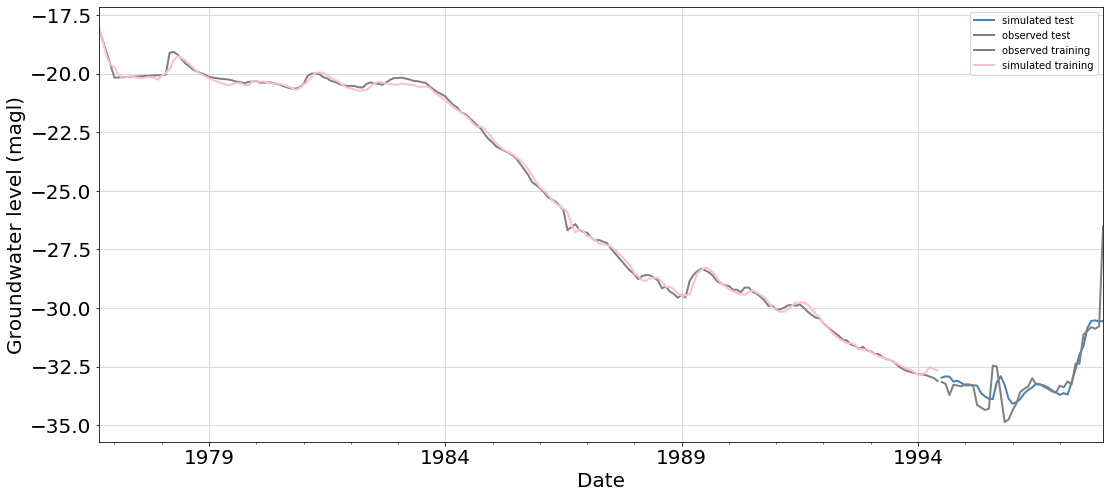

In [71]:
mse_gru = summary['mse_gru'].mean(axis=0)
rmse_gru= summary['rmse_gru'].mean(axis=0)
mae_gru = summary['mae_gru'].mean(axis=0)
r2_gru  = summary['r2_gru'].mean(axis=0)
stdv_gru= stdv.mean(axis=0)


print("The model performance for the train set")
print("-------------------------------------------")
print("Mean squared error is:",msetrain.round(3))
print("Root mean squared error is:",rmsetrain.round(3))
print("Mean absolute error is:",mae_train.round(3))
print("R^2 score is: ", r2train.round(3))
print("")

print("The model performance for the test set")
print("--------------------------------------")
print("R^2 score is: ",round(r2_gru, 3))
print("Mean squared error is:",round(mse_gru,3))
print("Root mean squared error is:",round(rmse_gru, 3))
print("Mean absolute error is:",round(mae_gru,3))


df1 = pd.DataFrame(test_inverse_trans[6].values, columns  = ['simulated test'],index  =pima.iloc[214:256].index)
df1['observed test']      = pima.iloc[214:256, 0].values

df2 = pd.DataFrame(pima.iloc[0:214, 0].values, columns = ['observed training'],index =pima.iloc[0:214].index)
df2['simulated training'] = train_inverse_trans[6].values

out_df = df2.append(df1, sort=True)

#plot
out_df['simulated test'].plot(color='steelblue', linewidth=2)
out_df['observed test'].plot(fontsize=20, color='grey', linewidth=2)
out_df['observed training'].plot(color='grey', linewidth=2)
out_df['simulated training'].plot(color='pink', linewidth=2)
plt.grid(axis='both', color='lightgrey')
plt.rcParams['axes.facecolor'] = 'w'
plt.xlabel("Date",fontsize=20)
plt.ylabel("Groundwater level (magl)",fontsize=20)
plt.legend(loc='best')
plt.gcf().set_size_inches(18,8)

In [72]:
y_gru = out_df['simulated test']

### FFNN

In [73]:
from sklearn.metrics import *
import numpy as np
import csv  

# rounding off
Round = 3      

train_pred = []
test_pred  = []

fields = ['Iteration_No', 'mse_ff', 'rmse_ff', 'r2_ff','mae_ff'] 
csvfile = open('Summary.csv', 'w') 
csvwriter = csv.writer(csvfile)  
csvwriter.writerow(fields) 

for fold in range(1,11):
    print(f'Running fold {fold}')
    print(X_train.shape)


    check = ModelCheckpoint('model.h5', verbose=1, save_best_only=True)

    early = EarlyStopping(patience=100)
    model = Sequential()
    # Add fully connected layer with a ReLU activation function
    model.add(Dense(units=32, activation='relu', input_shape=(1,6)))

    # Add fully connected layer with a ReLU activation function
    model.add(Dense(units=32, activation='relu'))

    # Add fully connected layer with no activation function
    model.add(Dense(units=1))
    #model.add(Flatten())

    # Compile neural network
    model.compile(loss='mse', optimizer='rmsprop', metrics=['mse'])

    X_t_reshaped   = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_val_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))


    history = model.fit(X_t_reshaped, 
                    y_train, 
                    validation_data=(X_val_reshaped, y_test),
                    epochs=1000, 
                    batch_size=96, 
                    verbose=1, callbacks=[check, early])
    
    X_val_reshaped = X_val_reshaped.reshape(42, 6)

    #running function
    gwl = -1.31373896
    test_forecast = X_test
    steps_ahead = 42
    y_pred = forecast(model, test_forecast, gwl, steps_ahead)
    y_pred = np.array(y_pred)
    
    #metrics for test
    y_ff = y_pred
    test_pred.append(y_ff)
    mse_ff = mean_squared_error(y_test, y_ff)
    rmse_ff = np.sqrt(mse_ff)
    r2_ff = r2_score(y_test, y_ff)
    mae_ff = mean_absolute_error(y_test, y_ff)

    #metrics train 
    train     = model.predict(X_t_reshaped)
    train_pred.append(train)
    msetrain  = mean_squared_error(y_train, train)
    rmsetrain = np.sqrt(msetrain)
    mae_train = mean_absolute_error(y_train, train)
    r2train   = r2_score(y_train, train)
    
    csvwriter.writerow([f'Iteration_{fold}',round(mse_ff,Round), round(rmse_ff,Round), round(r2_ff,Round),round(mae_ff,Round)]) 

csvfile.close()
summary= pd.read_csv('Summary.csv')  

Running fold 1
(214, 6)
Train on 214 samples, validate on 42 samples
Epoch 1/1000
 96/214 [============>.................] - ETA: 1s - loss: 1.0189 - mean_squared_error: 1.0189
Epoch 00001: val_loss improved from inf to 1.09987, saving model to model.h5
214/214 [==============================] - 5s 24ms/sample - loss: 0.9551 - mean_squared_error: 0.9723 - val_loss: 1.0999 - val_mean_squared_error: 1.0999
Epoch 2/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.8311 - mean_squared_error: 0.8311
Epoch 00002: val_loss did not improve from 1.09987
214/214 [==============================] - 0s 67us/sample - loss: 0.8508 - mean_squared_error: 0.8436 - val_loss: 1.3674 - val_mean_squared_error: 1.3674
Epoch 3/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.8337 - mean_squared_error: 0.8337
Epoch 00003: val_loss did not improve from 1.09987
214/214 [==============================] - 0s 62us/sample - loss: 0.8221 - mean_squared_error: 0.8169 - val_loss: 1.4816

Epoch 27/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.8104 - mean_squared_error: 0.8104
Epoch 00027: val_loss did not improve from 1.09987
214/214 [==============================] - 0s 64us/sample - loss: 0.7979 - mean_squared_error: 0.8006 - val_loss: 2.4022 - val_mean_squared_error: 2.4022
Epoch 28/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.7602 - mean_squared_error: 0.7602
Epoch 00028: val_loss did not improve from 1.09987
214/214 [==============================] - 0s 73us/sample - loss: 0.7959 - mean_squared_error: 0.7918 - val_loss: 2.2646 - val_mean_squared_error: 2.2646
Epoch 29/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.7751 - mean_squared_error: 0.7751
Epoch 00029: val_loss did not improve from 1.09987
214/214 [==============================] - 0s 62us/sample - loss: 0.7970 - mean_squared_error: 0.8030 - val_loss: 2.2538 - val_mean_squared_error: 2.2538
Epoch 30/1000
 96/214 [============>.................] - E

 96/214 [============>.................] - ETA: 0s - loss: 0.8219 - mean_squared_error: 0.8219
Epoch 00053: val_loss did not improve from 1.09987
214/214 [==============================] - 0s 65us/sample - loss: 0.7948 - mean_squared_error: 0.8031 - val_loss: 2.5033 - val_mean_squared_error: 2.5033
Epoch 54/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.7780 - mean_squared_error: 0.7780
Epoch 00054: val_loss did not improve from 1.09987
214/214 [==============================] - 0s 64us/sample - loss: 0.7956 - mean_squared_error: 0.8015 - val_loss: 2.4233 - val_mean_squared_error: 2.4233
Epoch 55/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.8324 - mean_squared_error: 0.8324
Epoch 00055: val_loss did not improve from 1.09987
214/214 [==============================] - 0s 68us/sample - loss: 0.7959 - mean_squared_error: 0.7999 - val_loss: 2.6115 - val_mean_squared_error: 2.6115
Epoch 56/1000
 96/214 [============>.................] - ETA: 0s - loss:

 96/214 [============>.................] - ETA: 0s - loss: 0.7442 - mean_squared_error: 0.7442
Epoch 00079: val_loss did not improve from 1.09987
214/214 [==============================] - 0s 60us/sample - loss: 0.7987 - mean_squared_error: 0.7921 - val_loss: 2.3479 - val_mean_squared_error: 2.3479
Epoch 80/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.7522 - mean_squared_error: 0.7522
Epoch 00080: val_loss did not improve from 1.09987
214/214 [==============================] - 0s 63us/sample - loss: 0.7951 - mean_squared_error: 0.8038 - val_loss: 2.6318 - val_mean_squared_error: 2.6318
Epoch 81/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.7501 - mean_squared_error: 0.7501
Epoch 00081: val_loss did not improve from 1.09987
214/214 [==============================] - 0s 63us/sample - loss: 0.7979 - mean_squared_error: 0.7980 - val_loss: 2.6391 - val_mean_squared_error: 2.6391
Epoch 82/1000
 96/214 [============>.................] - ETA: 0s - loss:

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 2 dimension(s)

In [ ]:
summary

In [ ]:
it_1 = train_pred[:][0]
it_2 = train_pred[:][1]
it_3 = train_pred[:][2]
it_4 = train_pred[:][3]
it_5 = train_pred[:][4]
it_6 = train_pred[:][5]
it_7 = train_pred[:][6]
it_8 = train_pred[:][8]
it_9 = train_pred[:][9]

train_iterations = pd.DataFrame(data = it_1, columns= ["Iteration1"])
train_iterations['Iteration2'] = it_2
train_iterations['Iteration3'] = it_3
train_iterations['Iteration4'] = it_4
train_iterations['Iteration5'] = it_5
train_iterations['Iteration6'] = it_6
train_iterations['Iteration7'] = it_7
train_iterations['Iteration8'] = it_8
train_iterations['Iteration9'] = it_9
train_iterations['Mean'] =  train_iterations.mean(axis=1)
train_iterations['Stdv'] =  train_iterations.std(axis=1)
train_iterations['Max']  =  train_iterations['Mean'] + train_iterations['Stdv']
train_iterations['Min']  =  train_iterations['Mean'] - train_iterations['Stdv']
train_iterations['actual'] = pima1.iloc[0:214, 6].values

In [ ]:
it_1t = test_pred[:][0]
it_2t = test_pred[:][1]
it_3t = test_pred[:][2]
it_4t = test_pred[:][3]
it_5t = test_pred[:][4]
it_6t = test_pred[:][5]
it_7t = test_pred[:][6]
it_8t = test_pred[:][8]
it_9t = test_pred[:][9]

test_iterations = pd.DataFrame(data = it_1t, columns= ["Iteration1"])
test_iterations['Iteration2'] = it_2t
test_iterations['Iteration3'] = it_3t
test_iterations['Iteration4'] = it_4t
test_iterations['Iteration5'] = it_5t
test_iterations['Iteration6'] = it_6t
test_iterations['Iteration7'] = it_7t
test_iterations['Iteration8'] = it_8t
test_iterations['Iteration9'] = it_9t
#test_iterations['Iteration10']= it_10t
test_iterations['Mean'] =  test_iterations.mean(axis=1)
test_iterations['Stdv'] =  test_iterations.std(axis=1)
test_iterations['Max']  =  test_iterations['Mean'] + test_iterations['Stdv']
test_iterations['Min']  =  test_iterations['Mean'] - test_iterations['Stdv']
test_iterations['actual'] = pima1.iloc[214:256, 6].values

In [ ]:
#transform train
a = pima1[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2']]
a = a.iloc[:214]
a ['simulated training'] = train_iterations['Mean'].values
train_inverse_trans = pd.DataFrame(scaler.inverse_transform(a))


#transform test
b = pima1[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2']]
b = b.iloc[214:256]
b ['simulated test'] = test_iterations['Mean'].values
test_inverse_trans = pd.DataFrame(scaler.inverse_transform(b))

# neab
test_mean = pd.DataFrame(test_iterations['Mean'])
train_mean = pd.DataFrame(train_iterations['Mean'])
mean =  train_mean.append(test_mean, sort=True)

# standared deviation
test_stdv  = pd.DataFrame(test_iterations['Stdv'])
train_stdv = pd.DataFrame(train_iterations['Stdv'])
stdv =  train_stdv.append(test_stdv, sort=True)

# Min test+train
test_min = pd.DataFrame(test_iterations['Min'])
train_min= pd.DataFrame(train_iterations['Min'])
Min =  train_min.append(test_min, sort=True)

# Max train + test
test_max = pd.DataFrame(test_iterations['Max'])
train_max = pd.DataFrame(train_iterations['Max'])
Max =  train_max.append(test_max, sort=True)

In [ ]:
mse_ff  = summary['mse_ff'].mean(axis=0)
rmse_ff = summary['rmse_ff'].mean(axis=0)
mae_ff  = summary['mae_ff'].mean(axis=0)
r2_ff   = summary['r2_ff'].mean(axis=0)
stdv_ff = stdv.mean(axis=0)


print("The model performance for the train set")
print("-------------------------------------------")
print("Mean squared error is:",msetrain.round(3))
print("Root mean squared error is:",rmsetrain.round(3))
print("Mean absolute error is:",mae_train.round(3))
print("R^2 score is: ", r2train.round(3))
print("")

print("The model performance for the test set")
print("--------------------------------------")
print("R^2 score is: ",round(r2_ff, 3))
print("Mean squared error is:",round(mse_ff,3))
print("Root mean squared error is:",round(rmse_ff, 3))
print("Mean absolute error is:",round(mae_ff,3))


df1 = pd.DataFrame(test_inverse_trans[6].values, columns  = ['simulated test'],index  =pima.iloc[214:256].index)
df1['observed test']      = pima.iloc[214:256, 0].values

df2 = pd.DataFrame(pima.iloc[0:214, 0].values, columns = ['observed training'],index =pima.iloc[0:214].index)
df2['simulated training'] = train_inverse_trans[6].values

out_df = df2.append(df1, sort=True)

#plot
out_df['simulated test'].plot(color='steelblue', linewidth=2)
out_df['observed test'].plot(fontsize=20, color='grey', linewidth=2)
out_df['observed training'].plot(color='grey', linewidth=2)
out_df['simulated training'].plot(color='pink', linewidth=2)
plt.grid(axis='both', color='lightgrey')
plt.rcParams['axes.facecolor'] = 'w'
plt.xlabel("Date",fontsize=20)
plt.ylabel("Groundwater level (magl)",fontsize=20)
plt.legend(loc='best')
plt.gcf().set_size_inches(18,8)

In [ ]:
y_ff = out_df['simulated test']

## Static Models

In [76]:
pima2  = pima[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2','D4N0126']]

In [77]:
X = pima2[['Discharge_log' ,'precip_trend_log' ,'Discharge_log','Abstraction_log' ,'t_1', 't_2']].values
y = pima2['D4N0126'].values
y = y.reshape(-1,1)

In [78]:
from sklearn.model_selection import TimeSeriesSplit
tss = TimeSeriesSplit(n_splits = 5)
for train_index, test_index in tss.split(X):
    X_train, X_test = X[train_index, :], X[test_index,:]
    y_train, y_test = y[train_index], y[test_index]
    
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(214, 6) (214, 1)
(42, 6) (42, 1)


In [79]:
def forecast(model, test_forecast, gwl, steps_ahead):
    y_pred = []
    current_output = gwl
    for step in range(steps_ahead):
        #print(test_forecast[step])
        input_test = np.concatenate([test_forecast[step][:-1], [current_output]])
        #input_test = [test_forecast[0][0][:-1], gwl]
        #print(input_test)
        pred = model.fit(input_test.reshape(1,1,6))
        y_pred.append(pred[0][0])
        #print(pred)
        current_output = pred[0][0]
    return y_pred

### Decision Tree

In [80]:
from sklearn.metrics import *
import numpy as np
import csv  

from sklearn.tree import DecisionTreeRegressor

# rounding off
Round = 3      

train_pred = []
test_pred  = []

fields = ['Iteration_No', 'mse_dc', 'rmse_dc', 'r2_dc','mae_dc'] 
csvfile = open('Summary.csv', 'w') 
csvwriter = csv.writer(csvfile)  
csvwriter.writerow(fields) 

for fold in range(1,11):
    print(f'Running fold {fold}')
    print(X_train.shape)


    regressor = DecisionTreeRegressor(max_features='auto') #random state is so i get same results whenever i run the regressor
    regressor.fit(X_train,y_train)
    y_dc = regressor.predict(X_test)

    #metrics for test
    y_dc = y_dc
    test_pred.append(y_dc)
    mse_dc = mean_squared_error(y_test, y_dc)
    rmse_dc = np.sqrt(mse_dc)
    r2_dc = r2_score(y_test, y_dc)
    mae_dc = mean_absolute_error(y_test, y_dc)

    #metrics train 
    train     = regressor.predict(X_train)
    train_pred.append(train)
    msetrain  = mean_squared_error(y_train, train)
    rmsetrain = np.sqrt(msetrain)
    mae_train = mean_absolute_error(y_train, train)
    r2train   = r2_score(y_train, train)
    
    csvwriter.writerow([f'Iteration_{fold}',round(mse_dc,Round), round(rmse_dc,Round), round(r2_dc,Round),round(mae_dc,Round)]) 

csvfile.close()
summary= pd.read_csv('Summary.csv')
    

Running fold 1
(214, 6)
Running fold 2
(214, 6)
Running fold 3
(214, 6)
Running fold 4
(214, 6)
Running fold 5
(214, 6)
Running fold 6
(214, 6)
Running fold 7
(214, 6)
Running fold 8
(214, 6)
Running fold 9
(214, 6)
Running fold 10
(214, 6)


In [81]:
summary

Iteration_No  mse_dc  rmse_dc  r2_dc  mae_dc
0   Iteration_1   1.119    1.058  0.447   0.759
1   Iteration_2   1.260    1.123  0.377   0.795
2   Iteration_3   1.031    1.015  0.490   0.754
3   Iteration_4   1.283    1.133  0.365   0.805
4   Iteration_5   1.271    1.127  0.371   0.802
5   Iteration_6   1.199    1.095  0.407   0.777
6   Iteration_7   1.296    1.138  0.359   0.817
7   Iteration_8   1.172    1.083  0.420   0.763
8   Iteration_9   1.094    1.046  0.459   0.780
9  Iteration_10   1.265    1.125  0.374   0.806

In [82]:
it_1 = train_pred[:][0]
it_2 = train_pred[:][1]
it_3 = train_pred[:][2]
it_4 = train_pred[:][3]
it_5 = train_pred[:][4]
it_6 = train_pred[:][5]
it_7 = train_pred[:][6]
it_8 = train_pred[:][8]
it_9 = train_pred[:][9]
train_iterations = pd.DataFrame(data = it_1, columns= ["Iteration1"])
train_iterations['Iteration2'] = it_2
train_iterations['Iteration3'] = it_3
train_iterations['Iteration4'] = it_4
train_iterations['Iteration5'] = it_5
train_iterations['Iteration6'] = it_6
train_iterations['Iteration7'] = it_7
train_iterations['Iteration8'] = it_8
train_iterations['Iteration9'] = it_9
train_iterations['Mean'] =  train_iterations.mean(axis=1)
train_iterations['Stdv'] =  train_iterations.std(axis=1)
train_iterations['Max']  =  train_iterations['Mean'] + train_iterations['Stdv']
train_iterations['Min']  =  train_iterations['Mean'] - train_iterations['Stdv']
train_iterations['actual'] = pima1.iloc[0:214, 6].values

In [83]:
it_1t = test_pred[:][0]
it_2t = test_pred[:][1]
it_3t = test_pred[:][2]
it_4t = test_pred[:][3]
it_5t = test_pred[:][4]
it_6t = test_pred[:][5]
it_7t = test_pred[:][6]
it_8t = test_pred[:][8]
it_9t = test_pred[:][9]
test_iterations = pd.DataFrame(data = it_1t, columns= ["Iteration1"])
test_iterations['Iteration2'] = it_2t
test_iterations['Iteration3'] = it_3t
test_iterations['Iteration4'] = it_4t
test_iterations['Iteration5'] = it_5t
test_iterations['Iteration6'] = it_6t
test_iterations['Iteration7'] = it_7t
test_iterations['Iteration8'] = it_8t
test_iterations['Iteration9'] = it_9t
#test_iterations['Iteration10']= it_10t
test_iterations['Mean'] =  test_iterations.mean(axis=1)
test_iterations['Stdv'] =  test_iterations.std(axis=1)
test_iterations['Max']  =  test_iterations['Mean'] + test_iterations['Stdv']
test_iterations['Min']  =  test_iterations['Mean'] - test_iterations['Stdv']

The model performance for the train set
-------------------------------------------
Mean squared error is: 0.0
Root mean squared error is: 0.0
Mean absolute error is: 0.0
R^2 score is:  1.0

The model performance for the test set
--------------------------------------
R^2 score is:  0.407
Mean squared error is: 1.199
Root mean squared error is: 1.094
Mean absolute error is: 0.786


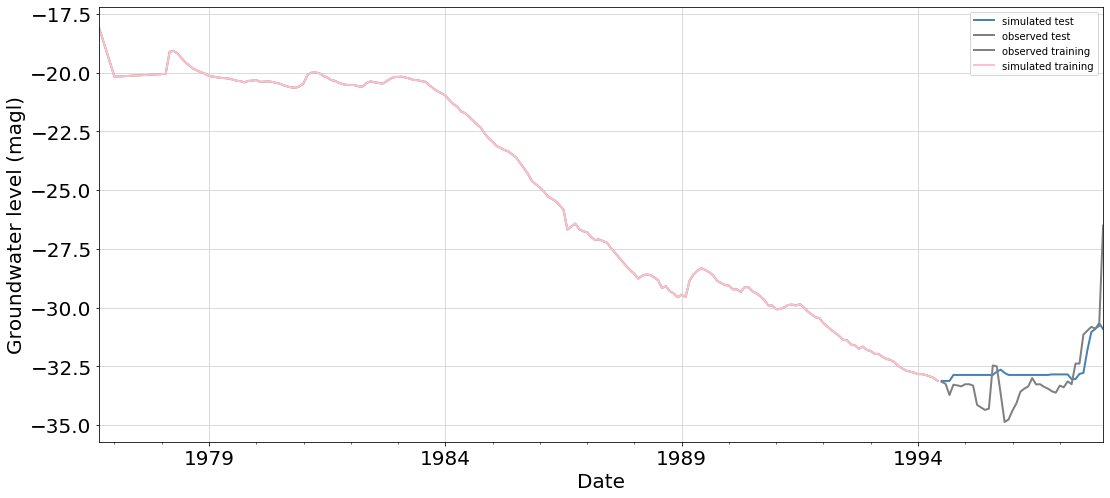

In [84]:
mse_dc = summary['mse_dc'].mean(axis=0)
rmse_dc = summary['rmse_dc'].mean(axis=0)
mae_dc = summary['mae_dc'].mean(axis=0)
r2_dc  = summary['r2_dc'].mean(axis=0)


print("The model performance for the train set")
print("-------------------------------------------")
print("Mean squared error is:",msetrain.round(3))
print("Root mean squared error is:",rmsetrain.round(3))
print("Mean absolute error is:",mae_train.round(3))
print("R^2 score is: ", r2train.round(3))
print("")

print("The model performance for the test set")
print("--------------------------------------")
print("R^2 score is: ",round(r2_dc, 3))
print("Mean squared error is:",round(mse_dc,3))
print("Root mean squared error is:",round(rmse_dc, 3))
print("Mean absolute error is:",round(mae_dc,3))




df1 = pd.DataFrame(test_iterations['Mean'].values, columns  = ['simulated test'],index  =pima.iloc[214:256].index)
df1['observed test']      = pima.iloc[214:256, 0].values

df2 = pd.DataFrame(pima.iloc[0:214, 0].values, columns = ['observed training'],index =pima.iloc[0:214].index)
df2['simulated training'] = train_iterations['Mean'].values

out_df = df2.append(df1, sort=True)

#plot
out_df['simulated test'].plot(color='steelblue', linewidth=2)
out_df['observed test'].plot(fontsize=20, color='grey', linewidth=2)
out_df['observed training'].plot(color='grey', linewidth=2)
out_df['simulated training'].plot(color='pink', linewidth=2)
plt.grid(axis='both', color='lightgrey')
plt.rcParams['axes.facecolor'] = 'w'
plt.xlabel("Date",fontsize=20)
plt.ylabel("Groundwater level (magl)",fontsize=20)
plt.legend(loc='best')
plt.gcf().set_size_inches(18,8)

### SVR

In [85]:
from sklearn.svm import SVR

# rounding off
Round = 3      

train_pred = []
test_pred  = []

fields = ['Iteration_No', 'mse_svr', 'rmse_svr', 'r2_svr','mae_svr'] 
csvfile = open('Summary.csv', 'w') 
csvwriter = csv.writer(csvfile)  
csvwriter.writerow(fields) 

for fold in range(1,11):
    print(f'Running fold {fold}')
    print(X_train.shape)
    
    regressor = SVR(kernel='rbf', epsilon=0.1, C=1, degree=4 ,gamma='auto') 
    regressor.fit(X_train,y_train)
    y_svr = regressor.predict(X_test)

    #metrics for test
    y_svr = y_svr
    test_pred.append(y_svr)
    mse_svr = mean_squared_error(y_test, y_svr)
    rmse_svr = np.sqrt(mse_svr)
    r2_svr = r2_score(y_test, y_svr)
    mae_svr = mean_absolute_error(y_test, y_svr)

    #metrics train 
    train     = regressor.predict(X_train)
    train_pred.append(train)
    msetrain  = mean_squared_error(y_train, train)
    rmsetrain = np.sqrt(msetrain)
    mae_train = mean_absolute_error(y_train, train)
    r2train   = r2_score(y_train, train)
    
    csvwriter.writerow([f'Iteration_{fold}',round(mse_svr,Round), round(rmse_svr,Round), round(r2_svr,Round),round(mae_svr,Round)]) 

csvfile.close()
summary= pd.read_csv('Summary.csv')
    

Running fold 1
(214, 6)
Running fold 2
(214, 6)
Running fold 3
(214, 6)
Running fold 4
(214, 6)
Running fold 5
(214, 6)
Running fold 6
(214, 6)
Running fold 7
(214, 6)
Running fold 8
(214, 6)
Running fold 9
(214, 6)
Running fold 10
(214, 6)


/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

In [86]:
summary

Iteration_No  mse_svr  rmse_svr  r2_svr  mae_svr
0   Iteration_1    8.078     2.842  -2.996    2.248
1   Iteration_2    8.078     2.842  -2.996    2.248
2   Iteration_3    8.078     2.842  -2.996    2.248
3   Iteration_4    8.078     2.842  -2.996    2.248
4   Iteration_5    8.078     2.842  -2.996    2.248
5   Iteration_6    8.078     2.842  -2.996    2.248
6   Iteration_7    8.078     2.842  -2.996    2.248
7   Iteration_8    8.078     2.842  -2.996    2.248
8   Iteration_9    8.078     2.842  -2.996    2.248
9  Iteration_10    8.078     2.842  -2.996    2.248

In [87]:
it_1 = train_pred[:][0]
it_2 = train_pred[:][1]
it_3 = train_pred[:][2]
it_4 = train_pred[:][3]
it_5 = train_pred[:][4]
it_6 = train_pred[:][5]
it_7 = train_pred[:][6]
it_8 = train_pred[:][8]
it_9 = train_pred[:][9]
train_iterations = pd.DataFrame(data = it_1, columns= ["Iteration1"])
train_iterations['Iteration2'] = it_2
train_iterations['Iteration3'] = it_3
train_iterations['Iteration4'] = it_4
train_iterations['Iteration5'] = it_5
train_iterations['Iteration6'] = it_6
train_iterations['Iteration7'] = it_7
train_iterations['Iteration8'] = it_8
train_iterations['Iteration9'] = it_9
train_iterations['Mean'] =  train_iterations.mean(axis=1)
train_iterations['Stdv'] =  train_iterations.std(axis=1)
train_iterations['Max']  =  train_iterations['Mean'] + train_iterations['Stdv']
train_iterations['Min']  =  train_iterations['Mean'] - train_iterations['Stdv']
train_iterations['actual'] = pima1.iloc[0:214, 6].values

In [88]:
it_1t = test_pred[:][0]
it_2t = test_pred[:][1]
it_3t = test_pred[:][2]
it_4t = test_pred[:][3]
it_5t = test_pred[:][4]
it_6t = test_pred[:][5]
it_7t = test_pred[:][6]
it_8t = test_pred[:][8]
it_9t = test_pred[:][9]
test_iterations = pd.DataFrame(data = it_1t, columns= ["Iteration1"])
test_iterations['Iteration2'] = it_2t
test_iterations['Iteration3'] = it_3t
test_iterations['Iteration4'] = it_4t
test_iterations['Iteration5'] = it_5t
test_iterations['Iteration6'] = it_6t
test_iterations['Iteration7'] = it_7t
test_iterations['Iteration8'] = it_8t
test_iterations['Iteration9'] = it_9t
#test_iterations['Iteration10']= it_10t
test_iterations['Mean'] =  test_iterations.mean(axis=1)
test_iterations['Stdv'] =  test_iterations.std(axis=1)
test_iterations['Max']  =  test_iterations['Mean'] + test_iterations['Stdv']
test_iterations['Min']  =  test_iterations['Mean'] - test_iterations['Stdv']

The model performance for the train set
-------------------------------------------
Mean squared error is: 0.54
Root mean squared error is: 0.735
Mean absolute error is: 0.199
R^2 score is:  0.975

The model performance for the test set
--------------------------------------
R^2 score is:  -2.996
Mean squared error is: 8.078
Root mean squared error is: 2.842
Mean absolute error is: 2.248


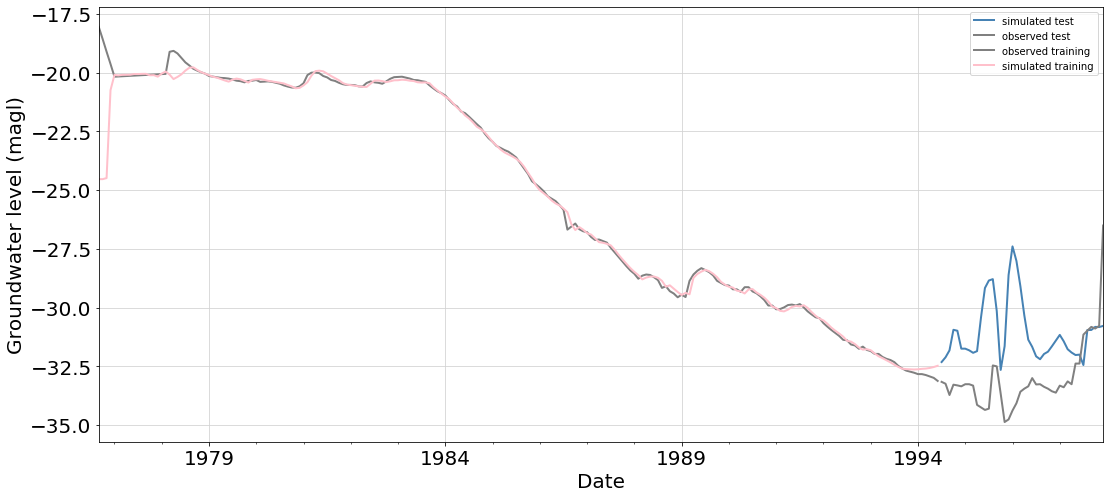

In [89]:
mse_svr  = summary['mse_svr'].mean(axis=0)
rmse_svr = summary['rmse_svr'].mean(axis=0)
mae_svr  = summary['mae_svr'].mean(axis=0)
r2_svr   = summary['r2_svr'].mean(axis=0)


print("The model performance for the train set")
print("-------------------------------------------")
print("Mean squared error is:",msetrain.round(3))
print("Root mean squared error is:",rmsetrain.round(3))
print("Mean absolute error is:",mae_train.round(3))
print("R^2 score is: ", r2train.round(3))
print("")

print("The model performance for the test set")
print("--------------------------------------")
print("R^2 score is: ",round(r2_svr, 3))
print("Mean squared error is:",round(mse_svr,3))
print("Root mean squared error is:",round(rmse_svr, 3))
print("Mean absolute error is:",round(mae_svr,3))



df1 = pd.DataFrame(test_iterations['Mean'].values, columns  = ['simulated test'],index  =pima.iloc[214:256].index)
df1['observed test']      = pima.iloc[214:256, 0].values

df2 = pd.DataFrame(pima.iloc[0:214, 0].values, columns = ['observed training'],index =pima.iloc[0:214].index)
df2['simulated training'] = train_iterations['Mean'].values

out_df = df2.append(df1, sort=True)

#plot
out_df['simulated test'].plot(color='steelblue', linewidth=2)
out_df['observed test'].plot(fontsize=20, color='grey', linewidth=2)
out_df['observed training'].plot(color='grey', linewidth=2)
out_df['simulated training'].plot(color='pink', linewidth=2)
plt.grid(axis='both', color='lightgrey')
plt.rcParams['axes.facecolor'] = 'w'
plt.xlabel("Date",fontsize=20)
plt.ylabel("Groundwater level (magl)",fontsize=20)
plt.legend(loc='best')
plt.gcf().set_size_inches(18,8)

### GradientBoostingRegressor

In [90]:
from sklearn.ensemble import GradientBoostingRegressor

# rounding off
Round = 3      

train_pred = []
test_pred  = []

fields = ['Iteration_No', 'mse_gb', 'rmse_gb', 'r2_gb','mae_gb'] 
csvfile = open('Summary.csv', 'w') 
csvwriter = csv.writer(csvfile)  
csvwriter.writerow(fields) 

for fold in range(1,11):
    print(f'Running fold {fold}')
    print(X_train.shape)


    regressor = GradientBoostingRegressor()
    regressor.fit(X_train,y_train)
    y_gb = regressor.predict(X_test)

    #metrics for test
    y_gb = y_gb
    test_pred.append(y_gb)
    mse_gb = mean_squared_error(y_test, y_gb)
    rmse_gb = np.sqrt(mse_gb)
    r2_gb = r2_score(y_test, y_gb)
    mae_gb = mean_absolute_error(y_test, y_gb)

    #metrics train 
    train     = regressor.predict(X_train)
    train_pred.append(train)
    msetrain  = mean_squared_error(y_train, train)
    rmsetrain = np.sqrt(msetrain)
    mae_train = mean_absolute_error(y_train, train)
    r2train   = r2_score(y_train, train)
    
    csvwriter.writerow([f'Iteration_{fold}',round(mse_gb,Round), round(rmse_gb,Round), round(r2_gb,Round),round(mae_gb,Round)]) 

csvfile.close()
summary= pd.read_csv('Summary.csv')
    

Running fold 1
(214, 6)
Running fold 2
(214, 6)
Running fold 3
(214, 6)
Running fold 4
(214, 6)


/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

Running fold 5
(214, 6)
Running fold 6
(214, 6)
Running fold 7
(214, 6)
Running fold 8
(214, 6)


/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

Running fold 9
(214, 6)
Running fold 10
(214, 6)


/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [91]:
summary

Iteration_No  mse_gb  rmse_gb  r2_gb  mae_gb
0   Iteration_1   1.034    1.017  0.488   0.673
1   Iteration_2   1.044    1.022  0.484   0.675
2   Iteration_3   1.035    1.018  0.488   0.681
3   Iteration_4   1.076    1.037  0.468   0.706
4   Iteration_5   1.077    1.038  0.467   0.693
5   Iteration_6   1.094    1.046  0.459   0.705
6   Iteration_7   1.082    1.040  0.465   0.688
7   Iteration_8   1.023    1.011  0.494   0.674
8   Iteration_9   1.063    1.031  0.474   0.672
9  Iteration_10   1.070    1.035  0.470   0.701

In [92]:
it_1 = train_pred[:][0]
it_2 = train_pred[:][1]
it_3 = train_pred[:][2]
it_4 = train_pred[:][3]
it_5 = train_pred[:][4]
it_6 = train_pred[:][5]
it_7 = train_pred[:][6]
it_8 = train_pred[:][8]
it_9 = train_pred[:][9]
train_iterations = pd.DataFrame(data = it_1, columns= ["Iteration1"])
train_iterations['Iteration2'] = it_2
train_iterations['Iteration3'] = it_3
train_iterations['Iteration4'] = it_4
train_iterations['Iteration5'] = it_5
train_iterations['Iteration6'] = it_6
train_iterations['Iteration7'] = it_7
train_iterations['Iteration8'] = it_8
train_iterations['Iteration9'] = it_9
train_iterations['Mean'] =  train_iterations.mean(axis=1)
train_iterations['Stdv'] =  train_iterations.std(axis=1)
train_iterations['Max']  =  train_iterations['Mean'] + train_iterations['Stdv']
train_iterations['Min']  =  train_iterations['Mean'] - train_iterations['Stdv']
train_iterations['actual'] = pima1.iloc[0:214, 6].values

In [93]:
it_1t = test_pred[:][0]
it_2t = test_pred[:][1]
it_3t = test_pred[:][2]
it_4t = test_pred[:][3]
it_5t = test_pred[:][4]
it_6t = test_pred[:][5]
it_7t = test_pred[:][6]
it_8t = test_pred[:][8]
it_9t = test_pred[:][9]
test_iterations = pd.DataFrame(data = it_1t, columns= ["Iteration1"])
test_iterations['Iteration2'] = it_2t
test_iterations['Iteration3'] = it_3t
test_iterations['Iteration4'] = it_4t
test_iterations['Iteration5'] = it_5t
test_iterations['Iteration6'] = it_6t
test_iterations['Iteration7'] = it_7t
test_iterations['Iteration8'] = it_8t
test_iterations['Iteration9'] = it_9t
#test_iterations['Iteration10']= it_10t
test_iterations['Mean'] =  test_iterations.mean(axis=1)
test_iterations['Stdv'] =  test_iterations.std(axis=1)
test_iterations['Max']  =  test_iterations['Mean'] + test_iterations['Stdv']
test_iterations['Min']  =  test_iterations['Mean'] - test_iterations['Stdv']

The model performance for the train set
-------------------------------------------
Mean squared error is: 0.002
Root mean squared error is: 0.039
Mean absolute error is: 0.027
R^2 score is:  1.0

The model performance for the test set
--------------------------------------
R^2 score is:  0.476
Mean squared error is: 1.06
Root mean squared error is: 1.03
Mean absolute error is: 0.687


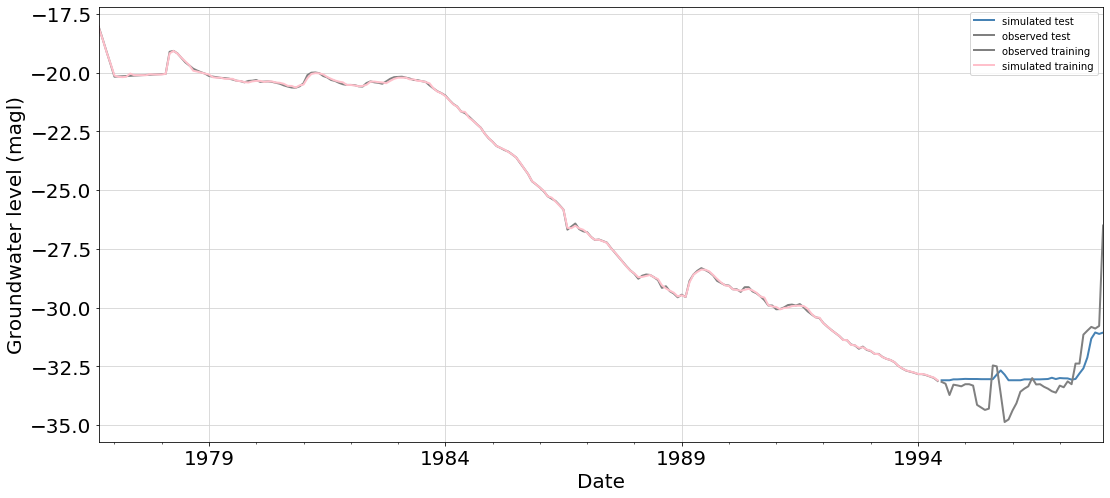

In [94]:
mse_gb  = summary['mse_gb'].mean(axis=0)
rmse_gb = summary['rmse_gb'].mean(axis=0)
mae_gb  = summary['mae_gb'].mean(axis=0)
r2_gb   = summary['r2_gb'].mean(axis=0)


print("The model performance for the train set")
print("-------------------------------------------")
print("Mean squared error is:",msetrain.round(3))
print("Root mean squared error is:",rmsetrain.round(3))
print("Mean absolute error is:",mae_train.round(3))
print("R^2 score is: ", r2train.round(3))
print("")

print("The model performance for the test set")
print("--------------------------------------")
print("R^2 score is: ",round(r2_gb, 3))
print("Mean squared error is:",round(mse_gb,3))
print("Root mean squared error is:",round(rmse_gb, 3))
print("Mean absolute error is:",round(mae_gb,3))



df1 = pd.DataFrame(test_iterations['Mean'].values, columns  = ['simulated test'],index  =pima.iloc[214:256].index)
df1['observed test']      = pima.iloc[214:256, 0].values

df2 = pd.DataFrame(pima.iloc[0:214, 0].values, columns = ['observed training'],index =pima.iloc[0:214].index)
df2['simulated training'] = train_iterations['Mean'].values

out_df = df2.append(df1, sort=True)

#plot
out_df['simulated test'].plot(color='steelblue', linewidth=2)
out_df['observed test'].plot(fontsize=20, color='grey', linewidth=2)
out_df['observed training'].plot(color='grey', linewidth=2)
out_df['simulated training'].plot(color='pink', linewidth=2)
plt.grid(axis='both', color='lightgrey')
plt.rcParams['axes.facecolor'] = 'w'
plt.xlabel("Date",fontsize=20)
plt.ylabel("Groundwater level (magl)",fontsize=20)
plt.legend(loc='best')
plt.gcf().set_size_inches(18,8)

### Randon Forest

In [95]:
from sklearn.ensemble import RandomForestRegressor

# rounding off
Round = 3      

train_pred = []
test_pred  = []

fields = ['Iteration_No', 'mse_rf', 'rmse_rf', 'r2_rf','mae_rf'] 
csvfile = open('Summary.csv', 'w') 
csvwriter = csv.writer(csvfile)  
csvwriter.writerow(fields) 

for fold in range(1,11):
    print(f'Running fold {fold}')
    print(X_train.shape)



    rf = RandomForestRegressor(n_estimators=10)
    rf.fit(X_train, y_train)
    y_rf = rf.predict(X_test)

    #metrics for test
    y_rf= y_rf
    test_pred.append(y_rf)
    mse_rf= mean_squared_error(y_test, y_rf)
    rmse_rf= np.sqrt(mse_rf)
    r2_rf= r2_score(y_test, y_rf)
    mae_rf= mean_absolute_error(y_test, y_rf)

    #metrics train 
    train     = regressor.predict(X_train)
    train_pred.append(train)
    msetrain  = mean_squared_error(y_train, train)
    rmsetrain = np.sqrt(msetrain)
    mae_train = mean_absolute_error(y_train, train)
    r2train   = r2_score(y_train, train)
    
    csvwriter.writerow([f'Iteration_{fold}',round(mse_rf,Round), round(rmse_rf,Round), round(r2_rf,Round),round(mae_rf,Round)]) 

csvfile.close()
summary= pd.read_csv('Summary.csv')
    

Running fold 1
(214, 6)
Running fold 2
(214, 6)
Running fold 3
(214, 6)
Running fold 4
(214, 6)
Running fold 5
(214, 6)
Running fold 6
(214, 6)
Running fold 7
(214, 6)
Running fold 8
(214, 6)
Running fold 9
(214, 6)
Running fold 10
(214, 6)


/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/yolanda/opt/anaconda3/lib/python3.7/site-

In [96]:
summary

Iteration_No  mse_rf  rmse_rf  r2_rf  mae_rf
0   Iteration_1   1.019    1.009  0.496   0.673
1   Iteration_2   1.075    1.037  0.468   0.703
2   Iteration_3   1.051    1.025  0.480   0.704
3   Iteration_4   1.079    1.039  0.466   0.679
4   Iteration_5   1.233    1.111  0.390   0.793
5   Iteration_6   1.295    1.138  0.360   0.822
6   Iteration_7   1.123    1.060  0.444   0.719
7   Iteration_8   1.110    1.054  0.451   0.742
8   Iteration_9   1.118    1.057  0.447   0.710
9  Iteration_10   1.131    1.063  0.441   0.724

In [97]:
it_1 = train_pred[:][0]
it_2 = train_pred[:][1]
it_3 = train_pred[:][2]
it_4 = train_pred[:][3]
it_5 = train_pred[:][4]
it_6 = train_pred[:][5]
it_7 = train_pred[:][6]
it_8 = train_pred[:][8]
it_9 = train_pred[:][9]
train_iterations = pd.DataFrame(data = it_1, columns= ["Iteration1"])
train_iterations['Iteration2'] = it_2
train_iterations['Iteration3'] = it_3
train_iterations['Iteration4'] = it_4
train_iterations['Iteration5'] = it_5
train_iterations['Iteration6'] = it_6
train_iterations['Iteration7'] = it_7
train_iterations['Iteration8'] = it_8
train_iterations['Iteration9'] = it_9
train_iterations['Mean'] =  train_iterations.mean(axis=1)
train_iterations['Stdv'] =  train_iterations.std(axis=1)
train_iterations['Max']  =  train_iterations['Mean'] + train_iterations['Stdv']
train_iterations['Min']  =  train_iterations['Mean'] - train_iterations['Stdv']
train_iterations['actual'] = pima1.iloc[0:214, 6].values

In [98]:
it_1t = test_pred[:][0]
it_2t = test_pred[:][1]
it_3t = test_pred[:][2]
it_4t = test_pred[:][3]
it_5t = test_pred[:][4]
it_6t = test_pred[:][5]
it_7t = test_pred[:][6]
it_8t = test_pred[:][8]
it_9t = test_pred[:][9]
test_iterations = pd.DataFrame(data = it_1t, columns= ["Iteration1"])
test_iterations['Iteration2'] = it_2t
test_iterations['Iteration3'] = it_3t
test_iterations['Iteration4'] = it_4t
test_iterations['Iteration5'] = it_5t
test_iterations['Iteration6'] = it_6t
test_iterations['Iteration7'] = it_7t
test_iterations['Iteration8'] = it_8t
test_iterations['Iteration9'] = it_9t
#test_iterations['Iteration10']= it_10t
test_iterations['Mean'] =  test_iterations.mean(axis=1)
test_iterations['Stdv'] =  test_iterations.std(axis=1)
test_iterations['Max']  =  test_iterations['Mean'] + test_iterations['Stdv']
test_iterations['Min']  =  test_iterations['Mean'] - test_iterations['Stdv']

The model performance for the train set
-------------------------------------------
Mean squared error is: 0.002
Root mean squared error is: 0.039
Mean absolute error is: 0.027
R^2 score is:  1.0

The model performance for the test set
--------------------------------------
R^2 score is:  0.444
Mean squared error is: 1.123
Root mean squared error is: 1.059
Mean absolute error is: 0.727


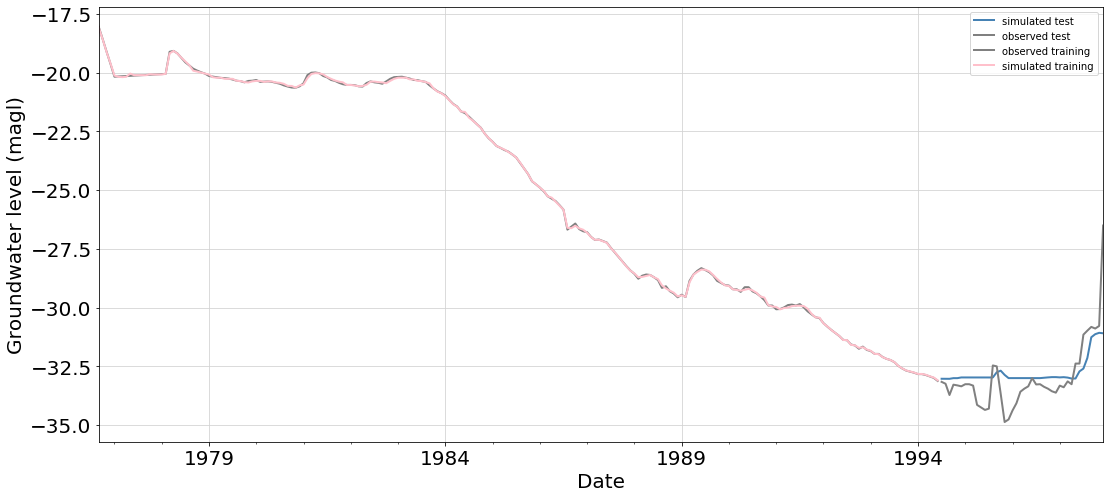

In [99]:
mse_rf  = summary['mse_rf'].mean(axis=0)
rmse_rf = summary['rmse_rf'].mean(axis=0)
mae_rf  = summary['mae_rf'].mean(axis=0)
r2_rf   = summary['r2_rf'].mean(axis=0)


print("The model performance for the train set")
print("-------------------------------------------")
print("Mean squared error is:",msetrain.round(3))
print("Root mean squared error is:",rmsetrain.round(3))
print("Mean absolute error is:",mae_train.round(3))
print("R^2 score is: ", r2train.round(3))
print("")

print("The model performance for the test set")
print("--------------------------------------")
print("R^2 score is: ",round(r2_rf, 3))
print("Mean squared error is:",round(mse_rf,3))
print("Root mean squared error is:",round(rmse_rf, 3))
print("Mean absolute error is:",round(mae_rf,3))



df1 = pd.DataFrame(test_iterations['Mean'].values, columns  = ['simulated test'],index  =pima.iloc[214:256].index)
df1['observed test']      = pima.iloc[214:256, 0].values

df2 = pd.DataFrame(pima.iloc[0:214, 0].values, columns = ['observed training'],index =pima.iloc[0:214].index)
df2['simulated training'] = train_iterations['Mean'].values

out_df = df2.append(df1, sort=True)

#plot
out_df['simulated test'].plot(color='steelblue', linewidth=2)
out_df['observed test'].plot(fontsize=20, color='grey', linewidth=2)
out_df['observed training'].plot(color='grey', linewidth=2)
out_df['simulated training'].plot(color='pink', linewidth=2)
plt.grid(axis='both', color='lightgrey')
plt.rcParams['axes.facecolor'] = 'w'
plt.xlabel("Date",fontsize=20)
plt.ylabel("Groundwater level (magl)",fontsize=20)
plt.legend(loc='best')
plt.gcf().set_size_inches(18,8)

In [100]:
vs = pd.DataFrame(pima.iloc[214:256, 0].values, columns = ['Observed'],index =pima.iloc[214:256].index)
vs['SVR'] = y_svr
vs['GB'] = y_gb
vs['RF'] = y_rf
vs['DC'] = y_dc
vs['LSTM'] = y_lstm
vs['GRU'] = y_gru

Text(0, 0.5, 'Groundwater levels (magl)')

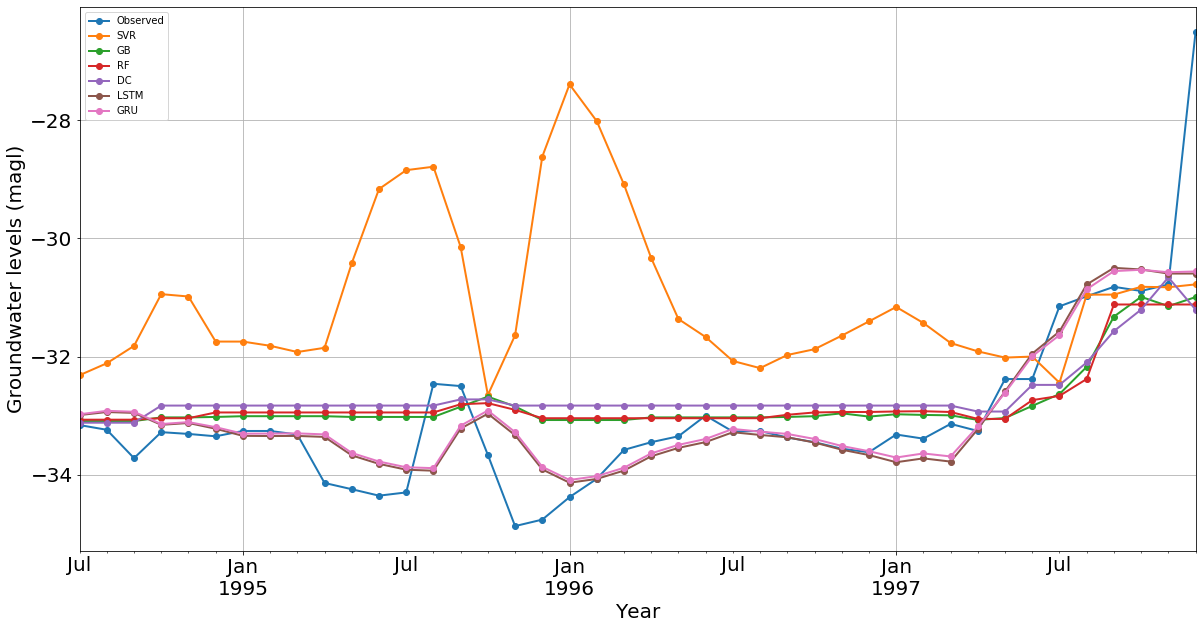

In [101]:
vs.plot(figsize=(20,10), linewidth=2, fontsize = 20, grid=True, marker='o')
plt.xlabel("Year",fontsize=20)
plt.ylabel("Groundwater levels (magl)",fontsize=20)